In [243]:
import pandas as pd

sti_df = pd.read_csv('STI (Singapore).csv')

In [244]:
sti_df

,Date,Open,High,Low,Close
0,10/08/21,3110.82,3112.81,3112.81,3112.81
1,10/07/21,3099.99,3118.52,3098.81,3101.15
2,10/06/21,3082.58,3091.35,3066.38,3083.88
3,10/05/21,3071.93,3071.93,3047.38,3068.12
4,10/04/21,3079.99,3102.47,3079.62,3089.65
...,...,...,...,...,...
942,01/08/18,3498.62,3514.76,3494.54,3512.18
943,01/05/18,3502.34,3503.68,3480.22,3489.45
944,01/04/18,3476.43,3501.16,3465.95,3501.16
945,01/03/18,3434.70,3468.19,3432.87,3464.28


In [573]:
sti_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# RSI (SIGNAL)

In [246]:
import talib
import numpy as np

sti_rsi = talib.RSI(sti_df[' Close'], timeperiod=14)

d = {'Date': sti_df['Date'], ' RSI': sti_rsi}
sti_rsi_df = pd.DataFrame(data=d)
sti_rsi_df['RSI Condition'] = sti_rsi_df[' RSI'].copy()

sti_rsi_df[' Close'] = sti_df[' Close']
sti_rsi_df.loc[sti_rsi_df['RSI Condition'] <= 30, 'RSI Condition'] = 1
sti_rsi_df.loc[(sti_rsi_df['RSI Condition'] > 30) & (sti_rsi_df['RSI Condition'] < 70), 'RSI Condition'] = 0
sti_rsi_df.loc[sti_rsi_df['RSI Condition'] >= 70, 'RSI Condition'] = -1
sti_rsi_df[' RSI'] = sti_rsi_df[' RSI']*30

In [575]:
sti_rsi_df.describe()

,RSI,RSI Condition,Close
count,933.000000,933.000000,947.00000
mean,1497.511185,-0.011790,3084.51773
std,370.906023,0.325705,293.85772
min,378.636955,-1.000000,2233.48000
25%,1232.309343,0.000000,2973.59500
50%,1507.572202,0.000000,3156.28000
75%,1761.470849,0.000000,3247.51500
max,2435.438332,1.000000,3615.28000


NameError: name 'sti_ema_df' is not defined

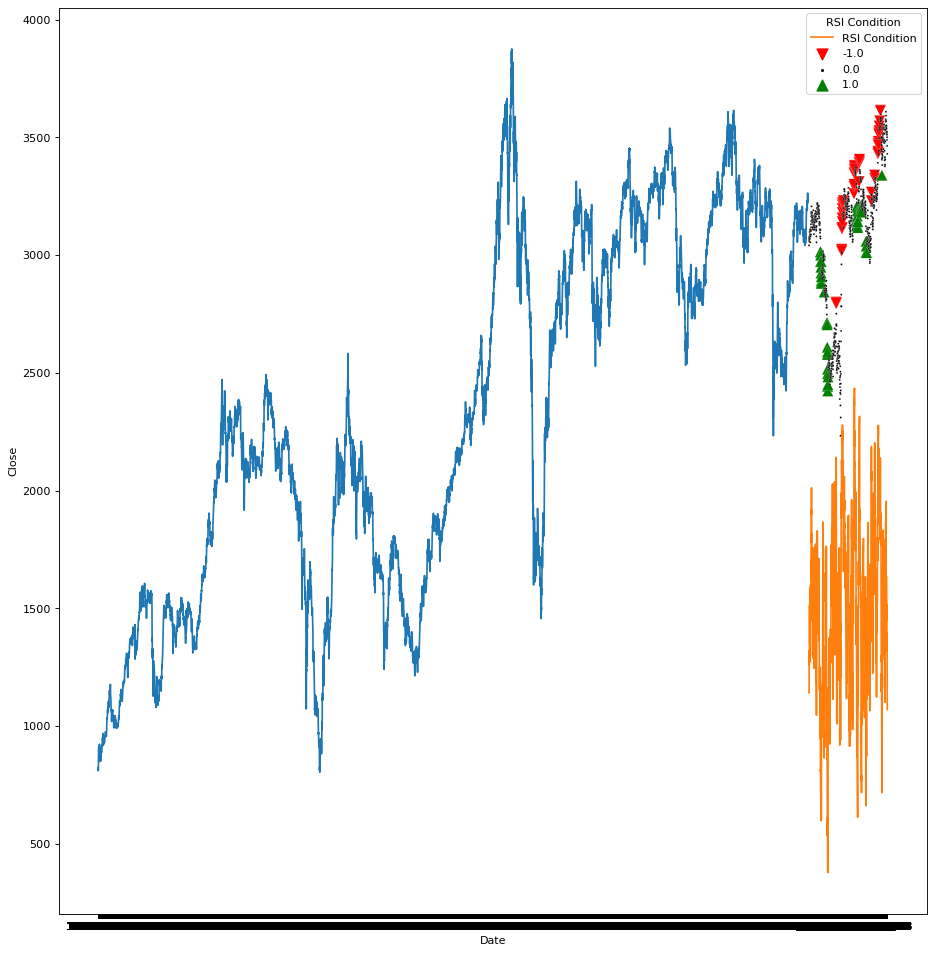

In [578]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                    1:'green',
                  -1: 'red'})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})

p0 = sns.lineplot(data=sti_df, x="Date", y="Close", ax=ax)
p1 = sns.lineplot(data=sti_rsi_df, x="Date", y=" RSI", label='RSI Condition', ax=ax)
p3 = sns.scatterplot(data=sti_rsi_df, x= "Date", y=' Close', hue ='RSI Condition', palette=color_dict, style='RSI Condition', markers=markers, size='RSI Condition', sizes=size_dict, ax=ax)
p5 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA200", ax=ax)

# MACD (SIGNAL)

In [250]:
sti_macd, sti_macdsignal, sti_macdhist = talib.MACD(sti_df[' Close'], fastperiod=12, slowperiod=26, signalperiod=9)

d = {'Date': sti_df['Date'], ' MACD': sti_macd, ' MACD_SIG': sti_macdsignal}
sti_macd_df = pd.DataFrame(data=d)
sti_macd_df['MACD Condition'] = 0

for df_entry in range(len(sti_macd_df)-1):
    #MACD crossing MACD_SIGNAL from above
    if sti_macd_df[' MACD'][df_entry] > sti_macd_df[' MACD_SIG'][df_entry] and sti_macd_df[' MACD'][df_entry+1] < sti_macd_df[' MACD_SIG'][df_entry+1]:
        sti_macd_df['MACD Condition'][df_entry] = -1
        #print(sti_macd_df[' MACD'][df_entry],sti_macd_df[' MACD_SIG'][df_entry],sti_macd_df[' MACD'][df_entry+1],sti_macd_df[' MACD_SIG'][df_entry+1])
    #MACD crossing MACD_SIGNAL from below
    if sti_macd_df[' MACD'][df_entry] < sti_macd_df[' MACD_SIG'][df_entry] and sti_macd_df[' MACD'][df_entry+1] > sti_macd_df[' MACD_SIG'][df_entry+1]:
        sti_macd_df['MACD Condition'][df_entry] = 1
        #print(sti_macd_df[' MACD'][df_entry],sti_macd_df[' MACD_SIG'][df_entry],sti_macd_df[' MACD'][df_entry+1],sti_macd_df[' MACD_SIG'][df_entry+1])
        
sti_macd_orders_df = sti_macd_df.loc[sti_macd_df['MACD Condition'] != 0]
sti_macd_orders_df[' Close'] = sti_df[' Close']
sti_macd_orders_df

C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/3322086472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sti_macd_df['MACD Condition'][df_entry] = -1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/3322086472.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sti_macd_df['MACD Condition'][df_entry] = 1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/3322086472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Date,MACD,MACD_SIG,MACD Condition,Close
48,08/02/21,22.884501,22.061499,-1,3161.22
78,06/18/21,-4.643763,-4.378131,1,3144.16
94,05/27/21,9.306626,8.015733,-1,3164.82
104,05/11/21,-9.995296,-6.626359,1,3144.27
117,04/22/21,16.693823,14.232237,-1,3187.78
129,04/06/21,7.638559,8.541848,1,3207.63
130,04/05/21,8.593651,8.552209,-1,3209.74
163,02/16/21,-58.695592,-56.955417,1,2935.34
189,01/08/21,6.562785,1.888375,-1,2993.19
203,12/17/20,-31.689540,-30.421307,1,2858.02


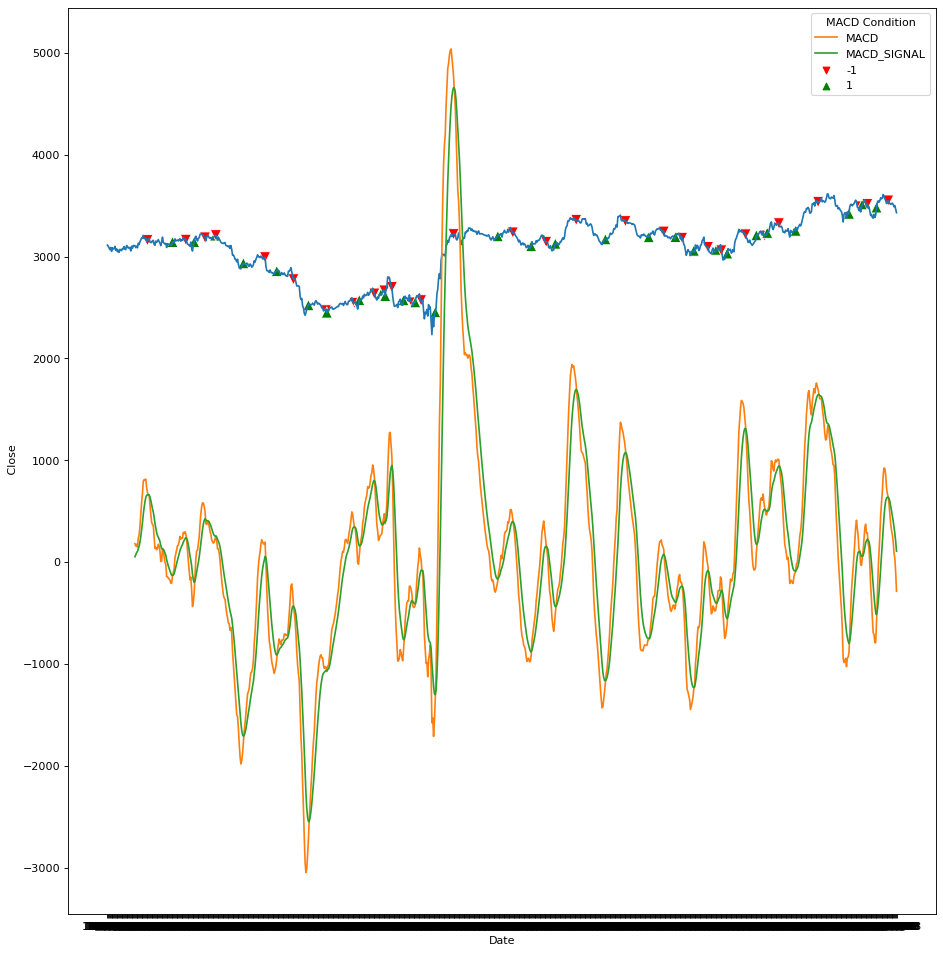

In [251]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({1:'green',
                  -1: 'red'})

markers = dict({1:'^',
                -1: 'v'})

p0 = sns.lineplot(data=sti_df, x="Date", y=" Close", ax=ax)
sti_macd_df[" MACD"] = sti_macd_df[" MACD"]*30
sti_macd_df[" MACD_SIG"] = sti_macd_df[" MACD_SIG"] *30
p1 = sns.lineplot(data=sti_macd_df, x="Date", y=" MACD", label='MACD', ax=ax)
p2 = sns.lineplot(data=sti_macd_df, x="Date", y=" MACD_SIG", label='MACD_SIGNAL', ax=ax)
p3 = sns.scatterplot(data=sti_macd_orders_df, x= "Date", y=' Close', s=100, hue ='MACD Condition', palette=color_dict, style='MACD Condition', markers=markers, ax=ax)


# EMA (SIGNAL/CONTROL)

In [ ]:
sti_ema5 = talib.EMA(sti_df['Close'], timeperiod=5)
sti_ema25 = talib.EMA(sti_df['Close'], timeperiod=25)
sti_ema50 = talib.EMA(sti_df['Close'], timeperiod=50)
sti_ema100 = talib.EMA(sti_df['Close'], timeperiod=100)
sti_ema200 = talib.EMA(sti_df['Close'], timeperiod=200)

#used with the EMA25 to prevent trend trades too far from the EMA - likely trend reversal back to the EMA
ema25std = sti_ema_df[' EMA25'].std()*0.33

d = {'Date': sti_df['Date'],' EMA5': sti_ema5, ' EMA25': sti_ema25, ' EMA50': sti_ema50,' EMA100': sti_ema100, ' EMA200': sti_ema200, }
sti_ema_df = pd.DataFrame(data=d)
sti_ema_df[' Close'] = sti_df['Close']
sti_ema_df['EMA Condition'] = 0

sti_ema_df.loc[(sti_ema_df[' Close'] > sti_ema_df[' EMA5']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA25']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA50']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA100']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA200']), 'EMA Condition'] = 1
sti_ema_df.loc[(sti_ema_df[' Close'] < sti_ema_df[' EMA5']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA25']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA50']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA100']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA200']), 'EMA Condition'] = -1

sti_ema_df['Trend'] = 0

sti_ema_df.loc[sti_ema_df[' EMA200'] < sti_ema_df['Close'], 'Trend'] = 1
sti_ema_df.loc[sti_ema_df[' EMA200'] > sti_ema_df['Close'], 'Trend'] = -1

sti_ema_df.loc[sti_ema_df['EMA Condition']!=0]



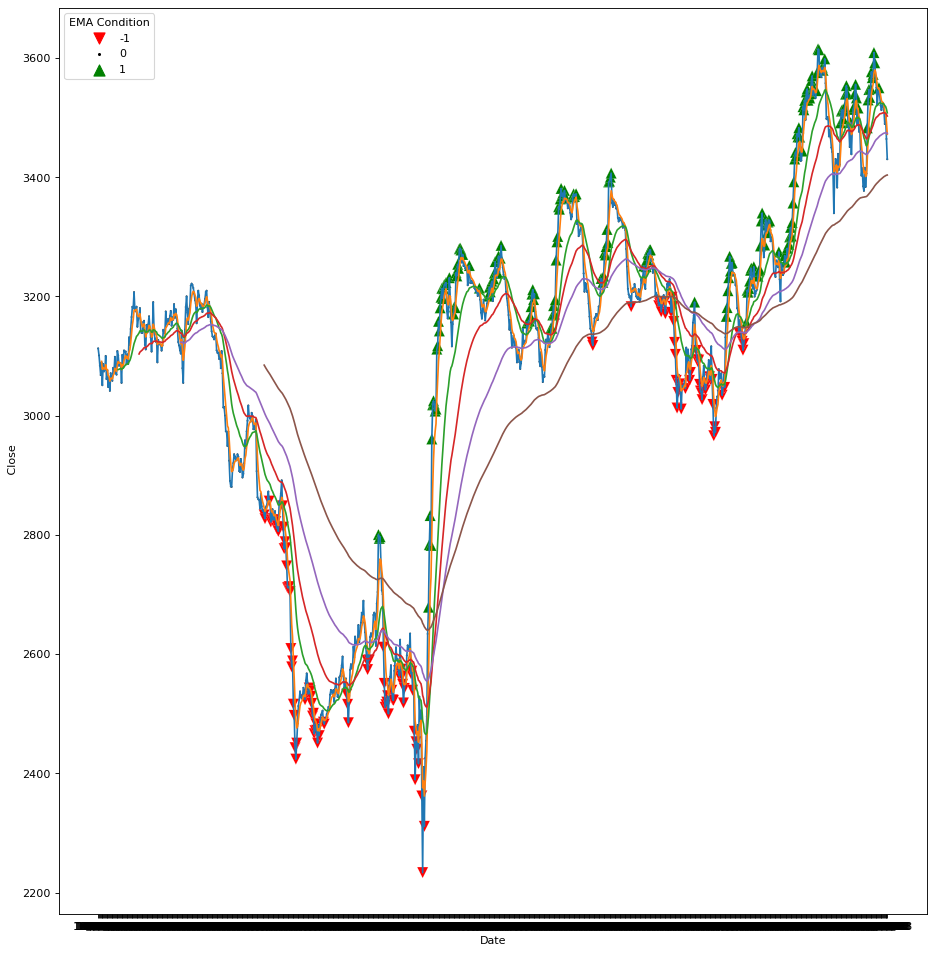

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                  1:'green',
                  -1: 'red'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

p0 = sns.lineplot(data=sti_df, x="Date", y=" Close", ax=ax)
p1 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA5", ax=ax)
p2 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA25", ax=ax)
p3 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA50", ax=ax)
p4 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA100", ax=ax)
p5 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA200", ax=ax)

p6 = sns.scatterplot(data=sti_ema_df, x= "Date", y=' Close', hue='EMA Condition', size='EMA Condition', palette=color_dict, sizes=size_dict, style='EMA Condition', markers=markers, ax=ax)

In [137]:
sti_ema5 = talib.EMA(sti_df[' Close'], timeperiod=5)
sti_ema25 = talib.EMA(sti_df[' Close'], timeperiod=25)
sti_ema50 = talib.EMA(sti_df[' Close'], timeperiod=50)
sti_ema100 = talib.EMA(sti_df[' Close'], timeperiod=100)
sti_ema200 = talib.EMA(sti_df[' Close'], timeperiod=200)

#used with the EMA25 to prevent trend trades too far from the EMA - likely trend reversal back to the EMA
ema25std = sti_ema_df[' EMA25'].std()*0.33

d = {'Date': sti_df['Date'],' EMA5': sti_ema5, ' EMA25': sti_ema25, ' EMA50': sti_ema50,' EMA100': sti_ema100, ' EMA200': sti_ema200, }
sti_ema_df = pd.DataFrame(data=d)
sti_ema_df[' Close'] = sti_df[' Close']
sti_ema_df['EMA Condition'] = 0

sti_ema_df.loc[(sti_ema_df[' Close'] > sti_ema_df[' EMA25']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA50']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA100']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA200']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA25']+ema25std), 'EMA Condition'] = 1
sti_ema_df.loc[(sti_ema_df[' Close'] < sti_ema_df[' EMA25']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA50']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA100']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA200']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA25']-ema25std), 'EMA Condition'] = -1


sti_ema_df.loc[sti_ema_df['EMA Condition']!=0]



,Date,EMA5,EMA25,EMA50,EMA100,EMA200,Close,EMA Condition
199,12/23/20,2845.550552,2907.778109,2950.038881,3006.146875,3084.858200,2833.40,-1
200,12/22/20,2839.473701,2901.589024,2945.226376,3002.605749,3082.295631,2827.32,-1
201,12/21/20,2841.822468,2897.352945,2941.355537,2999.514942,3079.949605,2846.52,-1
202,12/18/20,2844.208312,2893.631949,2937.732967,2996.534052,3077.651400,2848.98,-1
203,12/17/20,2848.812208,2890.892568,2934.606968,2993.791200,3075.466013,2858.02,-1
...,...,...,...,...,...,...,...,...
934,01/18/18,3552.298041,3520.351460,3501.564940,3464.786125,3390.491557,3521.31,1
935,01/17/18,3548.835361,3522.009809,3503.147099,3466.313331,3391.998208,3541.91,1
936,01/16/18,3549.293574,3524.179055,3504.992703,3467.974651,3393.572454,3550.21,1
937,01/15/18,3544.999049,3525.119897,3506.224754,3469.329806,3394.993724,3536.41,1


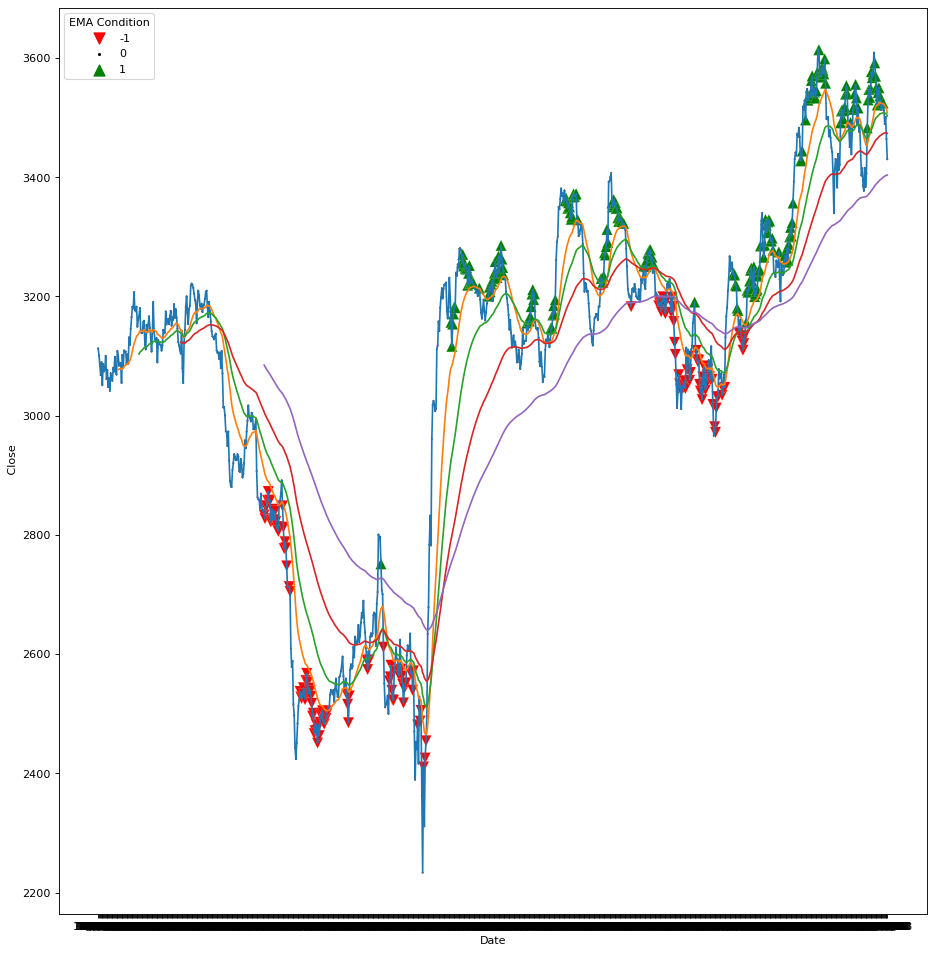

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                  1:'green',
                  -1: 'red'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

p1 = sns.lineplot(data=sti_df, x="Date", y=" Close", ax=ax)
p2 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA25", ax=ax)
p3 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA50", ax=ax)
p4 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA100", ax=ax)
p5 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA200", ax=ax)

p6 = sns.scatterplot(data=sti_ema_df, x= "Date", y=' Close', hue='EMA Condition', size='EMA Condition', palette=color_dict, sizes=size_dict, style='EMA Condition', markers=markers, ax=ax)

In [132]:
sti_ema25 = talib.EMA(sti_df[' Close'], timeperiod=25)
sti_ema50 = talib.EMA(sti_df[' Close'], timeperiod=50)
sti_ema100 = talib.EMA(sti_df[' Close'], timeperiod=100)
sti_ema200 = talib.EMA(sti_df[' Close'], timeperiod=200)

#used with the EMA25 to prevent trend trades too far from the EMA - likely trend reversal back to the EMA
ema25std = sti_ema_df[' EMA25'].std()*0.33

d = {'Date': sti_df['Date'], ' EMA25': sti_ema25, ' EMA50': sti_ema50,' EMA100': sti_ema100, ' EMA200': sti_ema200, }
sti_ema_df = pd.DataFrame(data=d)
sti_ema_df[' Close'] = sti_df[' Close']
sti_ema_df['EMA Condition'] = 0

sti_ema_df.loc[(sti_ema_df[' Close'] < sti_ema_df[' EMA100']) & (sti_ema_df[' Close'] > sti_ema_df[' EMA200']), 'EMA Condition'] = 1
sti_ema_df.loc[(sti_ema_df[' Close'] > sti_ema_df[' EMA100']) & (sti_ema_df[' Close'] < sti_ema_df[' EMA200']), 'EMA Condition'] = -1


sti_ema_df.loc[sti_ema_df['EMA Condition']!=0]

,Date,EMA25,EMA50,EMA100,EMA200,Close,EMA Condition
308,07/21/20,2561.574174,2558.888224,2615.648404,2751.762641,2629.45,-1
309,07/20/20,2565.783853,2561.139666,2615.661307,2750.414754,2616.30,-1
310,07/17/20,2569.837403,2563.388307,2615.717123,2749.101971,2618.48,-1
311,07/16/20,2573.978372,2565.752295,2615.874605,2747.853891,2623.67,-1
312,07/15/20,2579.741574,2569.012989,2616.528574,2746.869275,2648.90,-1
...,...,...,...,...,...,...,...
919,02/08/18,3462.526735,3470.235786,3439.735186,3367.164380,3415.90,1
920,02/07/18,3456.468524,3466.844971,3438.626964,3367.329610,3383.77,1
921,02/06/18,3452.615561,3464.473796,3437.988411,3367.718171,3406.38,1
945,01/03/18,3514.558519,3505.685326,3474.599973,3403.476557,3464.28,1


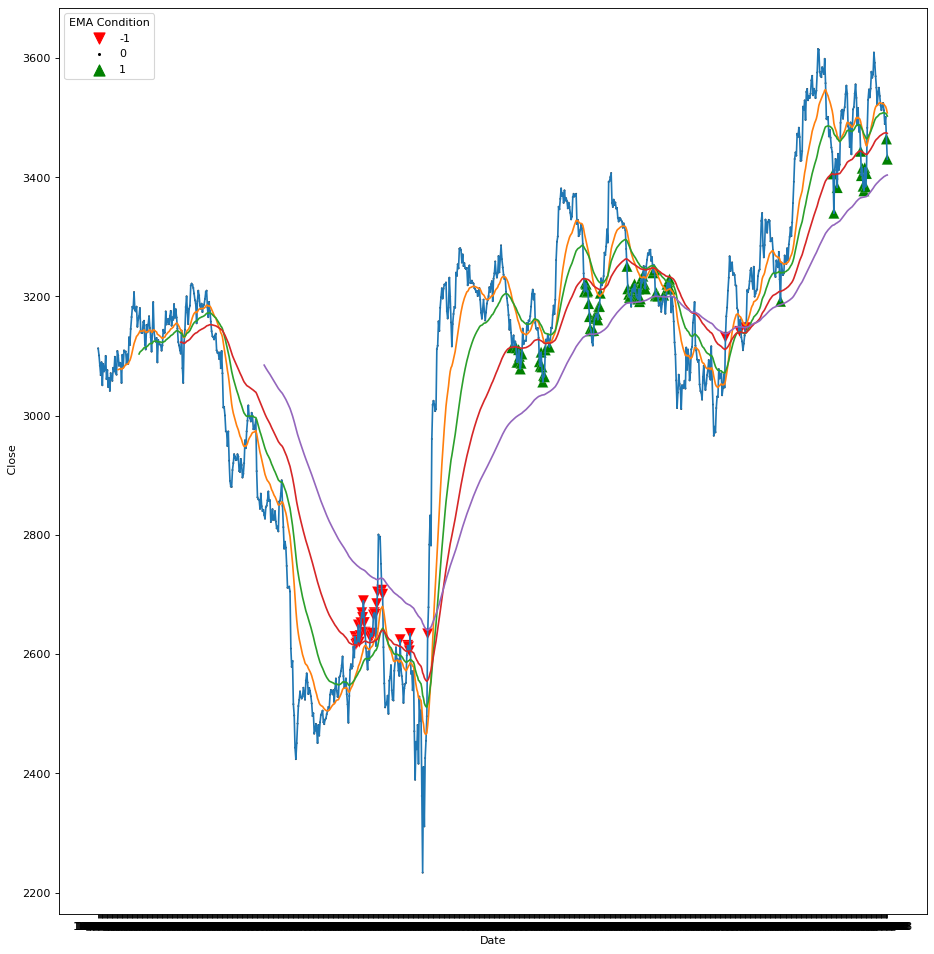

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                  1:'green',
                  -1: 'red'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

p1 = sns.lineplot(data=sti_df, x="Date", y=" Close", ax=ax)
p2 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA25", ax=ax)
p3 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA50", ax=ax)
p4 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA100", ax=ax)
p5 = sns.lineplot(data=sti_ema_df, x="Date", y=" EMA200", ax=ax)

p6 = sns.scatterplot(data=sti_ema_df, x= "Date", y=' Close', hue='EMA Condition', size='EMA Condition', palette=color_dict, sizes=size_dict, style='EMA Condition', markers=markers, ax=ax)

Next step is to label each order based on conditions as the price change. 

# ATR (CONTROL)

In [90]:
sti_atr = talib.ATR(sti_df[' High'], sti_df[' Low'], sti_df[' Close'], timeperiod=14)

d = {'Date': sti_df['Date'], ' ATR': sti_atr }
sti_atr_df = pd.DataFrame(data=d)
sti_atr_df[' Close'] = sti_df[' Close']


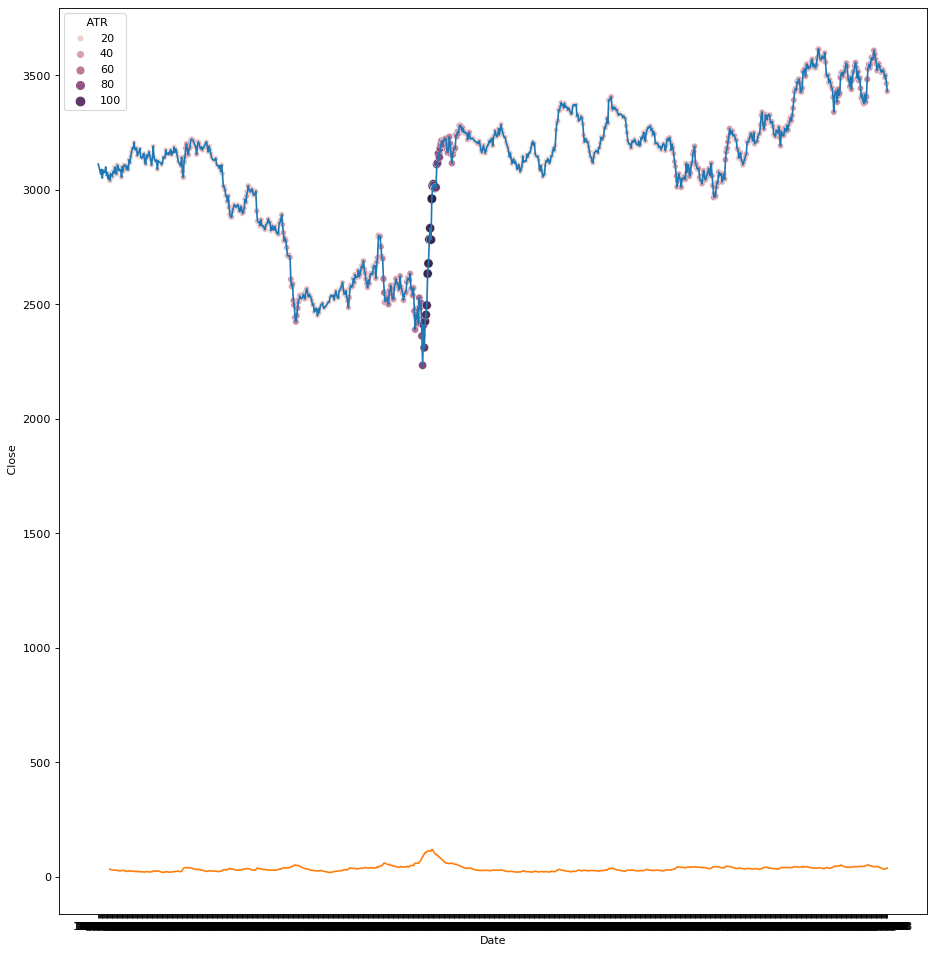

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

p1 = sns.lineplot(data=sti_df, x="Date", y=" Close", ax=ax)
p2 = sns.lineplot(data=sti_atr_df, x="Date", y=" ATR", ax=ax)

p6 = sns.scatterplot(data=sti_atr_df, x= "Date", y=' Close', hue=' ATR', size=' ATR', ax=ax)

# BBANDS (SIGNAL)

In [151]:
sti_bb_upperband, sti_bb_middleband, sti_bb_lowerband = talib.BBANDS(sti_df[' Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

d = {'Date': sti_df['Date'], ' Upper BB': sti_bb_upperband,' Middle BB': sti_bb_middleband, ' Lower BB': sti_bb_lowerband,}
sti_bb_df = pd.DataFrame(data=d)
sti_bb_df[' Close'] = sti_df[' Close']
sti_bb_df['BB Condition'] = 0

sti_bb_df.loc[(sti_bb_df[' Close'] > sti_bb_df[' Upper BB']), 'BB Condition'] = -1
sti_bb_df.loc[(sti_bb_df[' Close'] < sti_bb_df[' Lower BB']), 'BB Condition'] = 1

sti_bb_df.loc[sti_bb_df['BB Condition'] != 0]

,Date,Upper BB,Middle BB,Lower BB,Close,BB Condition
23,09/07/21,3107.548586,3073.3780,3039.207414,3108.53,-1
37,08/18/21,3126.366066,3091.7720,3057.177934,3131.44,-1
39,08/16/21,3138.603051,3097.2395,3055.875949,3145.52,-1
40,08/13/21,3151.540724,3100.5740,3049.607276,3165.49,-1
41,08/12/21,3166.624093,3106.1290,3045.633907,3182.80,-1
...,...,...,...,...,...,...
882,04/04/18,3667.130278,3519.3865,3371.642722,3339.70,1
915,02/14/18,3578.349382,3496.8240,3415.298618,3402.86,1
917,02/12/18,3574.989529,3482.1695,3389.349471,3384.98,1
945,01/03/18,3609.094193,3539.0965,3469.098807,3464.28,1


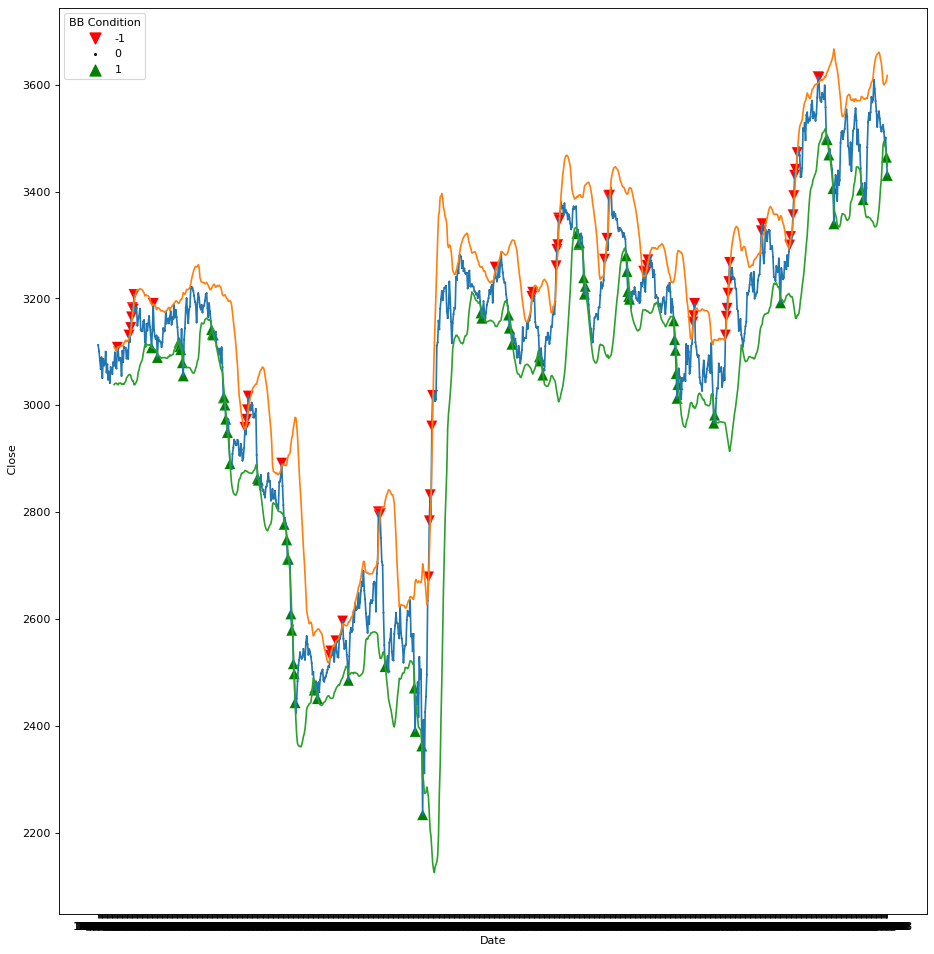

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                  1:'green',
                  -1: 'red'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

p1 = sns.lineplot(data=sti_df, x="Date", y=" Close", ax=ax)
p2 = sns.lineplot(data=sti_bb_df, x="Date", y=" Upper BB", ax=ax)
p3 = sns.lineplot(data=sti_bb_df, x="Date", y=" Lower BB", ax=ax)

p6 = sns.scatterplot(data=sti_bb_df, x= "Date", y=' Close', hue='BB Condition', size='BB Condition', palette=color_dict, sizes=size_dict, style='BB Condition', markers=markers, ax=ax)

# Generating Regression Data

In [22]:
rsi_cols_to_use = sti_rsi_df.columns.difference(sti_bb_df.columns)
ema_cols_to_use = sti_ema_df.columns.difference(sti_bb_df.columns)
atr_cols_to_use = sti_atr_df.columns.difference(sti_bb_df.columns)
macd_cols_to_use = sti_macd_df.columns.difference(sti_bb_df.columns)

result = pd.concat([sti_rsi_df[rsi_cols_to_use],sti_macd_df[macd_cols_to_use],sti_ema_df[ema_cols_to_use],sti_atr_df[atr_cols_to_use],sti_bb_df],axis=1)


NameError: name 'sti_rsi_df' is not defined

In [23]:
regression_data = result[['Date',' Close', 'RSI Condition', 'MACD Condition', 'EMA Condition','BB Condition', ' ATR', 'Trend']]

NameError: name 'result' is not defined

In [295]:
regression_data

,Date,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend
0,10/08/21,3112.81,NaN,0,0,0,NaN,0
1,10/07/21,3101.15,NaN,0,0,0,NaN,0
2,10/06/21,3083.88,NaN,0,0,0,NaN,0
3,10/05/21,3068.12,NaN,0,0,0,NaN,0
4,10/04/21,3089.65,NaN,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...
942,01/08/18,3512.18,0.0,0,0,0,34.309687,1
943,01/05/18,3489.45,0.0,0,0,0,34.141852,1
944,01/04/18,3501.16,0.0,0,0,0,34.218149,1
945,01/03/18,3464.28,0.0,0,0,1,36.651852,1


In [296]:
regression_data.describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend
count,947.00000,933.000000,947.000000,947.000000,947.000000,933.000000,947.000000
mean,3084.51773,-0.011790,-0.001056,0.070750,0.012672,36.134035,0.202746
std,293.85772,0.325705,0.245464,0.583657,0.376149,14.278629,0.865765
min,2233.48000,-1.000000,-1.000000,-1.000000,-1.000000,18.465510,-1.000000
25%,2973.59500,0.000000,0.000000,0.000000,0.000000,26.858795,-1.000000
50%,3156.28000,0.000000,0.000000,0.000000,0.000000,34.165970,0.000000
75%,3247.51500,0.000000,0.000000,0.000000,0.000000,41.424344,1.000000
max,3615.28000,1.000000,1.000000,1.000000,1.000000,119.844777,1.000000


In [298]:
import numpy as np

future_price_dict = dict()

for future in [1,3,5,10,15,30]:
    future_price_dict['future_price'+str(future)] = list(regression_data[' Close'])[future:] + [np.NaN for i in range(future)]
    
future_price_dict['future_price3']

[3068.12,
 3089.65,
 3051.11,
 3086.7,
 3074.31,
 3077.69,
 3100.3,
 3061.35,
 3076.44,
 3048.05,
 3063.2,
 3041.73,
 3071.23,
 3064.54,
 3058.61,
 3080.37,
 3074.31,
 3098.8,
 3071.7,
 3068.94,
 3108.53,
 3101.08,
 3083.85,
 3088.84,
 3087.84,
 3055.05,
 3102.11,
 3080.77,
 3109.42,
 3107.49,
 3107.62,
 3087.56,
 3102.75,
 3086.97,
 3131.44,
 3118.51,
 3145.52,
 3165.49,
 3182.8,
 3180.0,
 3207.36,
 3177.18,
 3175.1,
 3182.9,
 3149.25,
 3161.22,
 3166.94,
 3180.61,
 3141.75,
 3138.81,
 3138.97,
 3157.05,
 3159.26,
 3119.0,
 3111.2,
 3152.3,
 3139.98,
 3153.15,
 3166.81,
 3147.14,
 3131.4,
 3107.59,
 3141.6,
 3190.59,
 3141.02,
 3128.95,
 3124.19,
 3130.46,
 3089.49,
 3126.88,
 3121.6,
 3119.62,
 3118.62,
 3109.2,
 3117.87,
 3144.16,
 3138.31,
 3139.57,
 3174.87,
 3153.14,
 3157.97,
 3162.5,
 3153.47,
 3167.14,
 3175.81,
 3151.04,
 3165.0,
 3161.04,
 3187.23,
 3164.28,
 3178.55,
 3164.82,
 3146.09,
 3123.61,
 3117.89,
 3109.81,
 3104.21,
 3142.63,
 3079.69,
 3055.02,
 3123.26,
 3144.27

In [235]:
for future_price in future_price_dict:
    regression_data[future_price] = future_price_dict[future_price]

<ipython-input-235-cb624850e25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data[future_price] = future_price_dict[future_price]


In [236]:
for future_price in future_price_dict:
    regression_data[future_price + ' P/L'] = regression_data[future_price] - regression_data[' Close']

<ipython-input-236-942b67a18bc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data[future_price + ' P/L'] = regression_data[future_price] - regression_data[' Close']


In [237]:
regression_data.dropna(inplace= True)
regression_data

,Date,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
14,09/20/21,3041.73,0.0,0,0,0,32.930000,0,3071.23,3058.61,3074.31,3101.08,3102.11,3177.18,29.50,16.88,32.58,59.35,60.38,135.45
15,09/17/21,3071.23,0.0,0,0,0,32.685000,0,3064.54,3080.37,3098.80,3083.85,3080.77,3175.10,-6.69,9.14,27.57,12.62,9.54,103.87
16,09/16/21,3064.54,0.0,0,0,0,30.828214,0,3058.61,3074.31,3071.70,3088.84,3109.42,3182.90,-5.93,9.77,7.16,24.30,44.88,118.36
17,09/15/21,3058.61,0.0,0,0,0,29.943342,0,3080.37,3098.80,3068.94,3087.84,3107.49,3149.25,21.76,40.19,10.33,29.23,48.88,90.64
18,09/14/21,3080.37,0.0,0,0,0,29.358817,0,3074.31,3071.70,3108.53,3055.05,3107.62,3161.22,-6.06,-8.67,28.16,-25.32,27.25,80.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,02/20/18,3476.53,0.0,0,0,0,45.251056,1,3487.88,3402.86,3384.98,3482.93,3577.07,3512.18,11.35,-73.67,-91.55,6.40,100.54,35.65
913,02/19/18,3487.88,0.0,0,0,0,44.438838,1,3443.51,3415.07,3377.24,3529.82,3567.14,3489.45,-44.37,-72.81,-110.64,41.94,79.26,1.57
914,02/15/18,3443.51,0.0,0,0,0,46.433921,1,3402.86,3384.98,3415.90,3547.23,3572.62,3501.16,-40.65,-58.53,-27.61,103.72,129.11,57.65
915,02/14/18,3402.86,0.0,0,0,1,46.020784,1,3415.07,3377.24,3383.77,3533.99,3609.24,3464.28,12.21,-25.62,-19.09,131.13,206.38,61.42


In [238]:
regression_data.loc[regression_data['MACD Condition']==-1].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3065.048214,-0.035714,-1.0,-0.071429,0.035714,35.796943,0.035714,3039.390000,3025.827857,3024.046071,3020.603929,3008.459286,3048.964643,-25.658214,-39.220357,-41.002143,-44.444286,-56.588929,-16.083571
std,318.714475,0.188982,0.0,0.662687,0.188982,9.765215,0.922241,322.483239,333.169174,321.379377,321.460698,353.519686,308.015070,26.249121,50.755690,67.249032,68.489702,101.420167,169.004492
min,2472.280000,-1.000000,-1.0,-1.000000,0.000000,22.699652,-1.000000,2450.820000,2463.290000,2453.030000,2487.560000,2311.000000,2543.110000,-88.760000,-189.640000,-180.910000,-188.380000,-326.320000,-329.100000
25%,2757.847500,0.000000,-1.0,-0.250000,0.000000,28.342162,-1.000000,2744.912500,2737.052500,2773.602500,2652.332500,2684.075000,2810.662500,-39.997500,-65.122500,-61.732500,-83.407500,-120.900000,-110.570000
50%,3174.165000,0.000000,-1.0,0.000000,0.000000,35.723335,0.000000,3156.565000,3128.615000,3122.745000,3124.275000,3115.710000,3117.580000,-27.290000,-29.405000,-42.545000,-32.750000,-29.635000,-20.635000
75%,3238.492500,0.000000,-1.0,0.000000,0.000000,41.342051,1.000000,3222.425000,3215.820000,3199.272500,3211.895000,3224.060000,3235.110000,-2.767500,-9.432500,-12.520000,9.307500,16.650000,83.482500
max,3536.760000,0.000000,-1.0,1.000000,1.000000,64.668723,1.000000,3533.050000,3562.460000,3540.390000,3575.680000,3568.010000,3569.430000,13.590000,37.360000,127.320000,66.840000,120.270000,540.380000


In [244]:
regression_data.loc[(regression_data['MACD Condition']==-1) & (regression_data['Trend']==-1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,11.000000,11.0,11.0,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2750.652727,0.0,-1.0,-0.636364,0.090909,39.347001,-1.0,2720.104545,2696.333636,2707.718182,2704.860000,2665.083636,2785.410909,-30.548182,-54.319091,-42.934545,-45.792727,-85.569091,34.758182
std,248.297900,0.0,0.0,0.504525,0.301511,7.333805,0.0,245.600683,239.823212,228.770401,227.754133,281.697610,262.489733,28.251675,60.479219,91.934469,85.454995,135.082905,199.423848
min,2472.280000,0.0,-1.0,-1.000000,0.000000,26.288926,-1.0,2450.820000,2463.290000,2453.030000,2487.560000,2311.000000,2543.110000,-88.760000,-189.640000,-180.910000,-188.380000,-326.320000,-233.890000
25%,2560.360000,0.0,-1.0,-1.000000,0.000000,35.155502,-1.0,2549.270000,2513.225000,2524.650000,2574.290000,2480.160000,2597.960000,-41.470000,-80.010000,-91.695000,-101.410000,-149.040000,-80.270000
50%,2666.850000,0.0,-1.0,-1.000000,0.000000,40.250374,-1.0,2611.630000,2574.100000,2597.850000,2611.630000,2587.810000,2628.620000,-31.240000,-54.730000,-46.540000,-25.230000,-112.580000,-24.210000
75%,2918.925000,0.0,-1.0,0.000000,0.000000,42.037396,-1.0,2903.695000,2864.770000,2903.505000,2838.405000,2874.875000,3079.785000,-23.450000,-18.995000,4.870000,17.830000,30.185000,96.820000
max,3183.510000,0.0,-1.0,0.000000,1.000000,51.300404,-1.0,3158.070000,3102.800000,3065.070000,3069.670000,3116.390000,3180.430000,13.590000,37.360000,127.320000,66.840000,78.160000,540.380000


In [245]:
regression_data.loc[(regression_data['MACD Condition']==1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,27.000000,27.0,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2980.538148,0.0,1.0,0.111111,0.037037,37.586677,-0.111111,2999.415926,3013.316667,3026.528148,3021.459259,3039.157407,3026.689259,18.877778,32.778519,45.990000,40.921111,58.619259,46.151111
std,312.365448,0.0,0.0,0.423659,0.192450,15.961500,0.933700,308.364691,303.593496,292.246799,311.520715,336.434094,324.965521,22.686305,57.541186,80.737257,128.564614,169.484165,190.115287
min,2450.820000,0.0,1.0,-1.000000,0.000000,20.193016,-1.000000,2481.140000,2485.710000,2500.780000,2470.590000,2416.240000,2482.550000,-13.110000,-51.780000,-33.060000,-110.990000,-150.420000,-326.420000
25%,2639.770000,0.0,1.0,0.000000,0.000000,26.958589,-1.000000,2677.125000,2739.605000,2810.965000,2764.770000,2759.450000,2724.610000,3.035000,4.180000,1.635000,-37.350000,-5.860000,-42.005000
50%,3103.450000,0.0,1.0,0.000000,0.000000,38.696086,0.000000,3122.570000,3125.630000,3125.820000,3151.040000,3158.240000,3122.570000,14.080000,21.730000,34.690000,41.270000,38.310000,9.430000
75%,3196.660000,0.0,1.0,0.000000,0.000000,41.638960,1.000000,3208.470000,3217.535000,3208.880000,3223.140000,3275.845000,3246.475000,34.230000,36.585000,54.810000,78.190000,86.540000,119.275000
max,3513.850000,0.0,1.0,1.000000,1.000000,105.759356,1.000000,3517.940000,3555.850000,3512.140000,3485.570000,3483.160000,3562.460000,70.750000,224.110000,378.010000,565.030000,703.710000,702.040000


In [246]:
regression_data.loc[(regression_data['MACD Condition']==1) & (regression_data['Trend']==1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,10.00000,10.0,10.0,10.000000,10.0,10.000000,10.0,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3242.86300,0.0,1.0,0.400000,0.0,32.928918,1.0,3259.014000,3274.775000,3280.47100,3295.869000,3338.316000,3315.912000,16.151000,31.912000,37.608000,53.006000,95.453000,73.049000
std,128.62053,0.0,0.0,0.516398,0.0,8.840026,0.0,137.298721,147.666712,135.33644,111.564947,95.793959,154.486478,23.937599,25.659124,42.677631,74.978376,109.381312,115.358465
min,3103.45000,0.0,1.0,0.000000,0.0,22.969980,1.0,3122.570000,3125.630000,3125.82000,3166.840000,3204.520000,3122.570000,-5.170000,0.710000,-25.390000,-110.990000,-130.080000,-65.900000
25%,3175.93250,0.0,1.0,0.000000,0.0,26.000642,1.0,3176.385000,3192.512500,3195.52250,3211.495000,3270.907500,3202.022500,0.362500,16.412500,4.355000,34.112500,57.990000,-0.072500
50%,3205.56000,0.0,1.0,0.000000,0.0,30.962074,1.0,3211.365000,3224.280000,3249.31500,3272.925000,3321.595000,3312.740000,6.600000,26.800000,35.865000,63.785000,79.830000,23.590000
75%,3249.60750,0.0,1.0,1.000000,0.0,39.598766,1.0,3271.370000,3286.745000,3333.97500,3382.107500,3390.160000,3394.290000,23.305000,39.657500,60.762500,84.530000,191.407500,139.490000
max,3513.85000,0.0,1.0,1.000000,0.0,47.524629,1.0,3517.940000,3555.850000,3512.14000,3485.570000,3483.160000,3562.460000,69.980000,91.920000,105.880000,175.920000,228.390000,307.690000


In [241]:
regression_data.loc[(regression_data['RSI Condition']==1) & (regression_data['Trend']==1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,11.000000,11.0,11.0,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,3195.342727,1.0,0.0,0.0,0.454545,29.551907,1.0,3196.502727,3194.729091,3202.897273,3213.89000,3254.249091,3323.247273,1.160000,-0.613636,7.554545,18.547273,58.906364,127.904545
std,55.015693,0.0,0.0,0.0,0.522233,5.217553,0.0,77.623009,85.085579,85.013475,103.12348,103.083407,80.990060,27.442313,37.743414,41.153575,66.320764,71.144669,80.101817
min,3142.370000,1.0,0.0,0.0,0.000000,26.375988,1.0,3123.460000,3117.760000,3117.760000,3117.76000,3169.890000,3201.150000,-21.820000,-45.740000,-70.350000,-90.230000,-38.100000,0.870000
25%,3156.235000,1.0,0.0,0.0,0.000000,27.602351,1.0,3154.730000,3142.685000,3162.000000,3176.51500,3220.805000,3248.965000,-18.135000,-24.540000,-10.330000,-9.180000,25.175000,47.980000
50%,3198.390000,1.0,0.0,0.0,0.000000,28.202436,1.0,3182.920000,3182.920000,3188.110000,3195.59000,3229.480000,3347.580000,-5.190000,-0.250000,10.070000,-2.800000,42.150000,174.320000
75%,3205.785000,1.0,0.0,0.0,1.000000,28.750831,1.0,3201.930000,3209.920000,3212.875000,3206.21500,3234.175000,3360.065000,8.265000,13.540000,19.180000,38.925000,84.720000,186.260000
max,3339.700000,1.0,0.0,0.0,1.000000,45.061932,1.0,3412.150000,3427.970000,3439.350000,3513.31000,3553.730000,3476.530000,72.450000,88.270000,99.650000,173.610000,214.030000,211.520000


In [242]:
regression_data.loc[(regression_data['RSI Condition']==1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,44.000000,44.0,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2917.178636,1.0,0.0,-0.431818,0.477273,36.420665,-0.204545,2913.642045,2903.369318,2896.085682,2905.350227,2929.480682,2940.895455,-3.536591,-13.809318,-21.092955,-11.828409,12.302045,23.716818
std,256.653071,0.0,0.0,0.501056,0.505258,7.977353,0.823479,264.767901,274.931938,282.932416,287.958088,294.138856,337.611232,31.610656,58.736073,78.083901,96.780293,93.931161,119.961688
min,2423.840000,1.0,0.0,-1.000000,0.000000,26.375988,-1.000000,2423.840000,2423.840000,2423.840000,2423.840000,2523.620000,2450.820000,-95.640000,-145.490000,-207.780000,-287.550000,-187.670000,-246.660000
25%,2711.772500,1.0,0.0,-1.000000,0.000000,29.168108,-1.000000,2710.175000,2604.175000,2568.357500,2542.025000,2554.797500,2500.770000,-19.495000,-47.010000,-68.887500,-43.035000,-45.762500,-23.917500
50%,2973.705000,1.0,0.0,0.000000,0.000000,34.204931,0.000000,2973.270000,2942.190000,2928.680000,2929.435000,2926.655000,2997.345000,-2.340000,-2.000000,-1.255000,9.065000,29.725000,26.255000
75%,3142.527500,1.0,0.0,0.000000,1.000000,42.298924,0.250000,3142.527500,3142.527500,3161.360000,3173.202500,3219.787500,3240.997500,24.685000,30.632500,31.127500,40.747500,68.727500,78.702500
max,3339.700000,1.0,0.0,0.000000,1.000000,51.686716,1.000000,3412.150000,3427.970000,3439.350000,3513.310000,3553.730000,3476.530000,72.450000,89.030000,113.550000,173.610000,214.030000,225.180000


In [281]:
regression_data.loc[(regression_data['RSI Condition']==-1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,3301.093818,-1.0,-0.018182,0.963636,-0.381818,50.279923,1.0,3298.715091,3297.680909,3303.373455,3297.039091,3296.875273,3268.852909,-2.378727,-3.412909,2.279636,-4.054727,-4.218545,-32.240909
std,188.755738,0.0,0.134840,0.188919,0.490310,23.791498,0.0,187.744452,195.742925,209.415855,231.614786,228.134477,222.795498,23.990542,46.162591,65.428661,96.994312,98.626907,139.132968
min,2794.170000,-1.0,-1.000000,0.000000,-1.000000,25.593255,1.0,2751.500000,2700.390000,2550.860000,2499.830000,2523.550000,2518.160000,-54.660000,-115.240000,-246.110000,-297.140000,-273.420000,-282.410000
25%,3213.355000,-1.0,0.000000,1.000000,-1.000000,33.677142,1.0,3206.565000,3205.840000,3213.355000,3197.655000,3221.730000,3212.530000,-16.475000,-41.095000,-26.545000,-45.510000,-59.985000,-160.650000
50%,3346.390000,-1.0,0.000000,1.000000,0.000000,43.504595,1.0,3350.540000,3356.950000,3353.470000,3334.230000,3325.600000,3247.860000,0.060000,-7.530000,2.210000,0.450000,3.050000,-17.550000
75%,3418.855000,-1.0,0.000000,1.000000,0.000000,61.071969,1.0,3417.265000,3417.265000,3417.265000,3437.115000,3411.110000,3352.090000,14.145000,24.995000,36.855000,59.365000,52.730000,78.335000
max,3615.280000,-1.0,0.000000,1.000000,0.000000,117.485150,1.0,3613.930000,3570.020000,3584.560000,3570.170000,3598.730000,3598.730000,49.790000,92.140000,138.680000,188.680000,201.820000,260.530000


In [282]:
regression_data.loc[(regression_data['RSI Condition']==-1) & (regression_data['Trend']==-1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
regression_data.loc[(regression_data['BB Condition']==1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2986.430714,0.300000,0.000000,-0.371429,1.0,35.702044,0.000000,2987.270857,2981.850286,2977.725143,2983.465143,3011.833143,3056.373000,0.840143,-4.580429,-8.705571,-2.965571,25.402429,69.942286
std,311.120339,0.461566,0.170251,0.486675,0.0,12.624611,0.868115,311.808179,309.626580,302.923491,311.104642,298.080561,307.476354,39.272759,53.538780,73.277841,132.878205,165.010155,219.831930
min,2233.480000,0.000000,-1.000000,-1.000000,1.0,21.622012,-1.000000,2233.480000,2311.000000,2416.240000,2233.480000,2450.680000,2463.290000,-128.570000,-110.060000,-166.230000,-304.870000,-326.320000,-233.890000
25%,2797.670000,0.000000,0.000000,-1.000000,1.0,27.047908,-1.000000,2806.167500,2771.952500,2743.960000,2836.035000,2867.685000,2932.367500,-17.672500,-30.270000,-54.307500,-79.570000,-65.617500,-33.140000
50%,3086.225000,0.000000,0.000000,0.000000,1.0,32.036454,0.000000,3092.880000,3063.995000,3068.140000,3084.600000,3107.265000,3143.340000,-0.135000,-10.700000,-14.680000,-8.180000,24.815000,34.585000
75%,3187.090000,1.000000,0.000000,0.000000,1.0,40.845653,1.000000,3193.747500,3191.762500,3180.460000,3197.337500,3193.385000,3243.512500,14.032500,21.395000,16.362500,45.447500,84.727500,110.515000
max,3498.200000,1.000000,1.000000,0.000000,1.0,86.987863,1.000000,3501.300000,3479.760000,3466.380000,3533.990000,3609.240000,3517.940000,177.260000,192.140000,262.290000,548.890000,774.240000,929.670000


In [248]:
regression_data.loc[(regression_data['BB Condition']==1) & (regression_data['Trend']==1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,26.000000,26.000000,26.0,26.0,26.0,26.000000,26.0,26.000000,26.0000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.000000,26.000000
mean,3251.492692,0.192308,0.0,0.0,1.0,30.658029,1.0,3253.615385,3247.4100,3238.022692,3239.091538,3257.128077,3330.798077,2.122692,-4.082692,-13.47000,-12.401154,5.635385,79.305385
std,124.961705,0.401918,0.0,0.0,0.0,7.281805,0.0,125.233842,125.4639,119.086056,137.790410,153.277721,117.242815,28.132920,33.941365,43.16825,82.448464,108.827701,115.604817
min,3056.470000,0.000000,0.0,0.0,1.0,22.280093,1.0,3067.520000,3056.4700,3065.330000,3078.360000,3087.970000,3144.480000,-65.950000,-76.200000,-79.50000,-115.270000,-180.810000,-102.840000
25%,3169.877500,0.000000,0.0,0.0,1.0,26.697141,1.0,3167.122500,3176.3725,3161.415000,3137.712500,3162.112500,3235.645000,-8.892500,-24.380000,-40.00250,-84.280000,-67.852500,18.117500
50%,3217.755000,0.000000,0.0,0.0,1.0,28.519650,1.0,3216.770000,3208.6600,3208.620000,3207.795000,3195.190000,3310.725000,3.565000,-12.825000,-18.36000,-36.675000,-2.770000,47.855000
75%,3317.275000,0.000000,0.0,0.0,1.0,36.104778,1.0,3324.332500,3319.6775,3313.092500,3271.207500,3327.265000,3429.007500,12.152500,13.107500,-0.19500,45.230000,71.205000,149.377500
max,3498.200000,1.000000,0.0,0.0,1.0,46.020784,1.0,3501.300000,3479.7600,3466.380000,3533.990000,3609.240000,3517.940000,72.450000,88.270000,99.65000,173.610000,214.030000,304.450000


In [249]:
regression_data.loc[(regression_data['BB Condition']==-1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,61.000000,61.000000,61.0,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,3147.171639,-0.344262,0.0,0.672131,-1.0,41.129853,0.540984,3149.098689,3156.505902,3161.389344,3149.882295,3135.338525,3144.384426,1.927049,9.334262,14.217705,2.710656,-11.833115,-2.787213
std,251.206177,0.479070,0.0,0.473333,0.0,23.673062,0.720504,252.122987,258.603112,267.813808,274.422449,281.319024,282.963494,30.517524,59.343061,92.213283,131.787919,156.868024,166.199884
min,2531.790000,-1.000000,0.0,0.000000,-1.0,18.973271,-1.000000,2538.550000,2527.920000,2519.810000,2499.830000,2484.910000,2518.160000,-73.010000,-114.630000,-246.110000,-297.140000,-394.410000,-323.980000
25%,3017.150000,-1.000000,0.0,0.000000,-1.0,27.563405,0.000000,3018.270000,3018.270000,3025.030000,3082.960000,3068.150000,3078.360000,-16.530000,-31.110000,-34.390000,-66.080000,-100.360000,-101.790000
50%,3203.930000,0.000000,0.0,1.000000,-1.0,36.124680,1.000000,3207.360000,3209.790000,3236.260000,3181.030000,3176.570000,3198.650000,2.800000,6.030000,4.670000,1.560000,-44.810000,-36.640000
75%,3300.750000,0.000000,0.0,1.000000,-1.0,44.185695,1.000000,3300.750000,3346.390000,3362.430000,3348.640000,3329.460000,3254.770000,17.880000,40.830000,67.690000,64.120000,58.700000,89.260000
max,3615.280000,0.000000,0.0,1.000000,-1.0,119.844777,1.000000,3613.930000,3570.020000,3584.560000,3518.480000,3548.230000,3615.280000,105.080000,185.730000,339.630000,433.060000,520.040000,492.040000


In [250]:
regression_data.loc[(regression_data['BB Condition']==-1) & (regression_data['Trend']==-1)].describe()

,Close,RSI Condition,MACD Condition,EMA Condition,BB Condition,ATR,Trend,future_price1,future_price3,future_price5,future_price10,future_price15,future_price30,future_price1 P/L,future_price3 P/L,future_price5 P/L,future_price10 P/L,future_price15 P/L,future_price30 P/L
count,8.000000,8.0,8.0,8.0,8.0,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2821.693750,0.0,0.0,0.0,-1.0,32.003612,-1.0,2819.261250,2794.926250,2798.562500,2778.227500,2755.513750,2799.190000,-2.432500,-26.767500,-23.131250,-43.466250,-66.180000,-22.503750
std,296.580805,0.0,0.0,0.0,0.0,10.787601,0.0,312.146218,303.083263,307.656373,280.359568,284.648733,271.893036,27.369196,55.968789,76.451593,96.898914,150.985435,151.998573
min,2531.790000,0.0,0.0,0.0,-1.0,18.973271,-1.0,2538.550000,2527.920000,2519.810000,2527.920000,2484.910000,2567.650000,-42.850000,-114.630000,-113.080000,-186.630000,-394.410000,-323.980000
25%,2554.257500,0.0,0.0,0.0,-1.0,23.159769,-1.0,2539.607500,2537.850000,2539.732500,2556.817500,2546.705000,2605.750000,-23.507500,-52.432500,-66.807500,-123.152500,-113.095000,-98.430000
50%,2743.800000,0.0,0.0,0.0,-1.0,31.127838,-1.0,2705.990000,2661.255000,2670.820000,2643.985000,2612.710000,2641.050000,3.380000,-34.710000,-36.710000,-13.940000,-25.430000,27.245000
75%,3137.590000,0.0,0.0,0.0,-1.0,42.536336,-1.0,3166.897500,3111.482500,3091.420000,3029.905000,3045.792500,3043.057500,14.610000,-0.052500,2.620000,2.372500,36.382500,94.630000
max,3167.790000,0.0,0.0,0.0,-1.0,45.486099,-1.0,3190.620000,3209.790000,3267.400000,3239.100000,3176.570000,3243.920000,35.120000,78.310000,135.920000,107.620000,64.180000,112.440000


## Get Data

In [400]:
import pandas as pd

btc_df = pd.read_csv('BTC-USD.csv')
bnb_df = pd.read_csv('BNB-USD.csv')
doge_df = pd.read_csv('DOGE-USD.csv')
sol_df = pd.read_csv('SOL1-USD.csv')
ada_df = pd.read_csv('ADA-USD.csv')
xrp_df = pd.read_csv('XRP-USD.csv')
eth_df = pd.read_csv('ETH-USD.csv')

oil_df = pd.read_excel('Oil.xlsx')
gold_df = pd.read_csv('Gold.csv')
sp500_df = pd.read_csv('SP500.csv')
sti_df = pd.read_csv('STI.csv')




In [501]:
btc_hourly_df = btc_df = pd.read_csv('reddit_bitcoin_1h.csv')

In [402]:
oil_df
oil_df = oil_df[pd.to_numeric(oil_df['Close'], errors='coerce').notnull()] 
oil_df = oil_df[pd.to_numeric(oil_df['Low'], errors='coerce').notnull()] 
oil_df = oil_df[pd.to_numeric(oil_df['High'], errors='coerce').notnull()]
oil_df = oil_df[pd.to_numeric(oil_df['Volume'], errors='coerce').notnull()]

for column in oil_df.columns:
    try:
        oil_df[column] = pd.to_numeric(oil_df[column])
    except:
        pass
    
oil_df.reset_index(inplace=True)

In [403]:
for column in gold_df.columns:
    gold_df[column] = gold_df[column].str.replace(r',', '')
    
gold_df = gold_df[pd.to_numeric(gold_df['Close'], errors='coerce').notnull()] 
gold_df = gold_df[pd.to_numeric(gold_df['Low'], errors='coerce').notnull()] 
gold_df = gold_df[pd.to_numeric(gold_df['High'], errors='coerce').notnull()]
gold_df = gold_df[pd.to_numeric(gold_df['Volume'], errors='coerce').notnull()]

for column in gold_df.columns:
    try:
        gold_df[column] = pd.to_numeric(gold_df[column])
    except:
        pass
    
gold_df.reset_index(inplace=True)



In [404]:
for column in sp500_df.columns:
    sp500_df[column] = sp500_df[column].str.replace(r',', '')
    
sp500_df = sp500_df[pd.to_numeric(sp500_df['Close'], errors='coerce').notnull()] 
sp500_df = sp500_df[pd.to_numeric(sp500_df['Low'], errors='coerce').notnull()] 
sp500_df = sp500_df[pd.to_numeric(sp500_df['High'], errors='coerce').notnull()]
sp500_df = sp500_df[pd.to_numeric(sp500_df['Volume'], errors='coerce').notnull()]

for column in sp500_df.columns:
    try:
        sp500_df[column] = pd.to_numeric(sp500_df[column])
    except:
        pass
sp500_df.reset_index(inplace=True)

In [405]:
sti_df

,Date,Open,High,Low,Close,Volume
0,1987-12-28,824.40,824.40,824.40,824.40,NaN
1,1987-12-29,810.90,810.90,810.90,810.90,NaN
2,1987-12-30,823.20,823.20,823.20,823.20,NaN
3,1988-01-04,833.60,833.60,833.60,833.60,NaN
4,1988-01-05,879.30,879.30,879.30,879.30,NaN
...,...,...,...,...,...,...
8453,2021-11-03,3234.28,3236.86,3216.86,3219.69,204587761.0
8454,2021-11-05,3234.41,3248.07,3225.16,3242.34,279049200.0
8455,2021-11-08,3251.85,3270.65,3250.39,3263.90,319638000.0
8456,2021-11-09,3267.92,3273.54,3239.71,3243.42,332843200.0


In [406]:
#input df containing 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'\
#output TA regression data

import talib
import numpy as np

def generate_regression_data(df):


    rsi = talib.RSI(df['Close'], timeperiod=14)

    d = {'Date': df['Date'], ' RSI': rsi}
    rsi_df = pd.DataFrame(data=d)
    rsi_df['RSI Condition'] = rsi_df[' RSI'].copy()

    rsi_df.loc[rsi_df['RSI Condition'] <= 30, 'RSI Condition'] = 1
    rsi_df.loc[(rsi_df['RSI Condition'] > 30) & (rsi_df['RSI Condition'] < 70), 'RSI Condition'] = 0
    rsi_df.loc[rsi_df['RSI Condition'] >= 70, 'RSI Condition'] = -1 
    
    macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    d = {'Date': df['Date'], ' MACD': macd, ' MACD_SIG': macdsignal}
    macd_df = pd.DataFrame(data=d)
    macd_df['MACD Condition'] = 0

    for df_entry in range(len(macd_df)-1):
        #MACD crossing MACD_SIGNAL from above
        if macd_df[' MACD'][df_entry] > macd_df[' MACD_SIG'][df_entry] and macd_df[' MACD'][df_entry+1] < macd_df[' MACD_SIG'][df_entry+1]:
            macd_df['MACD Condition'][df_entry] = -1
            #print(macd_df[' MACD'][df_entry],macd_df[' MACD_SIG'][df_entry],macd_df[' MACD'][df_entry+1],macd_df[' MACD_SIG'][df_entry+1])
        #MACD crossing MACD_SIGNAL from below
        if macd_df[' MACD'][df_entry] < macd_df[' MACD_SIG'][df_entry] and macd_df[' MACD'][df_entry+1] > macd_df[' MACD_SIG'][df_entry+1]:
            macd_df['MACD Condition'][df_entry] = 1
            #print(macd_df[' MACD'][df_entry],macd_df[' MACD_SIG'][df_entry],macd_df[' MACD'][df_entry+1],macd_df[' MACD_SIG'][df_entry+1])

    ema5 = talib.EMA(df['Close'], timeperiod=5)
    ema25 = talib.EMA(df['Close'], timeperiod=25)
    ema50 = talib.EMA(df['Close'], timeperiod=50)
    ema100 = talib.EMA(df['Close'], timeperiod=100)
    ema200 = talib.EMA(df['Close'], timeperiod=200)

    d = {'Date': df['Date'],' EMA5': ema5, ' EMA25': ema25, ' EMA50': ema50,' EMA100': ema100, ' EMA200': ema200, }
    
    ema_df = pd.DataFrame(data=d)
    ema_df['Close'] = df['Close']
    ema_df['EMA Condition'] = 0
    
    #used with the EMA25 to prevent trend trades too far from the EMA - likely trend reversal back to the EMA
    ema25std = ema_df[' EMA25'].std()*0.33
    
    ema_df.loc[(ema_df['Close'] > ema_df[' EMA5']) & (ema_df['Close'] > ema_df[' EMA25']) & (ema_df['Close'] > ema_df[' EMA50']) & (ema_df['Close'] > ema_df[' EMA100']) & (ema_df['Close'] > ema_df[' EMA200']), 'EMA Condition'] = 1
    ema_df.loc[(ema_df['Close'] < ema_df[' EMA5']) & (ema_df['Close'] < ema_df[' EMA25']) & (ema_df['Close'] < ema_df[' EMA50']) & (ema_df['Close'] < ema_df[' EMA100']) & (ema_df['Close'] < ema_df[' EMA200']), 'EMA Condition'] = -1

    ema_df['Trend'] = 0

    ema_df.loc[ema_df[' EMA200'] < ema_df['Close'], 'Trend'] = 1
    ema_df.loc[ema_df[' EMA200'] > ema_df['Close'], 'Trend'] = -1 
    
    ema_df['Close-EMA200 Price Diff'] = ema_df['Close'] - ema_df[' EMA200']
    
    atr = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

    d = {'Date': df['Date'], ' ATR': atr }
    atr_df = pd.DataFrame(data=d)
    atr_df['Close'] = df['Close']
    
    bb_upperband, bb_middleband, bb_lowerband = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    d = {'Date': df['Date'], ' Upper BB': bb_upperband,' Middle BB': bb_middleband, ' Lower BB': bb_lowerband,}
    bb_df = pd.DataFrame(data=d)
    bb_df['Close'] = df['Close']
    bb_df['BB Condition'] = 0

    bb_df.loc[(bb_df['Close'] > bb_df[' Upper BB']), 'BB Condition'] = -1
    bb_df.loc[(bb_df['Close'] < bb_df[' Lower BB']), 'BB Condition'] = 1

    
    # Windowed regression based regressors
    forecasted = talib.TSF(df['Close'], timeperiod=14)

    d = {'Date': df['Date'], 'Close': df['Close'],'Forecasted': forecasted}
    forecasted_df = pd.DataFrame(data=d)


    slope = talib.LINEARREG_SLOPE(df['Close'], timeperiod=14)

    d = {'Date': df['Date'], 'Close': df['Close'], 'Slope': slope}
    slope_df = pd.DataFrame(data=d)

    acceleration = talib.LINEARREG_SLOPE(slope_df['Slope'], timeperiod=14)

    d = {'Date': df['Date'], 'Close': df['Close'],'Acceleration': acceleration}
    acceleration_df = pd.DataFrame(data=d)
    
    # Merge all datafraems

    rsi_cols_to_use = rsi_df.columns.difference(bb_df.columns)
    ema_cols_to_use = ema_df.columns.difference(bb_df.columns)
    atr_cols_to_use = atr_df.columns.difference(bb_df.columns)
    macd_cols_to_use = macd_df.columns.difference(bb_df.columns)
    forecasted_cols_to_use = forecasted_df.columns.difference(bb_df.columns)
    slope_cols_to_use = slope_df.columns.difference(bb_df.columns)
    acceleration_cols_to_use = acceleration_df.columns.difference(bb_df.columns)

    result = pd.concat([rsi_df[rsi_cols_to_use],macd_df[macd_cols_to_use],ema_df[ema_cols_to_use],
                        atr_df[atr_cols_to_use],forecasted_df[forecasted_cols_to_use], bb_df,
                       slope_df[slope_cols_to_use], acceleration_df[acceleration_cols_to_use]],axis=1)
    
    result['Volume'] = df['Volume']
    
    # Volume is partially related to price, and effect can be slightly corrected by making it relative to price
    result['Price Relative Volume'] = result['Volume']/result['Close']

    # Volatility should be relative to price
    result['Price Relative ATR'] = result[' ATR']/result['Close']*100
    result['Price Relative Close-EMA200 Price Diff'] = result['Close-EMA200 Price Diff']/result['Close']
    result['Forecasted % Profit'] = (result['Forecasted'] - result['Close'])/result['Close']


    # Price corrected volume can then be logged to control for decreased marginal effects
    result['Log Price Relative Volume'] = np.log(result['Price Relative Volume'])

    # Price corrected ATR can then be logged to control for decreased marginal effects
    result['Log Price Relative ATR'] = np.log(result['Price Relative ATR'])

    result['Price Diff Sign'] = 0
    result.loc[result['Price Relative Close-EMA200 Price Diff']<0,'Price Diff Sign'] = -1
    result.loc[result['Price Relative Close-EMA200 Price Diff']>0,'Price Diff Sign'] = 1

    result['Log(Price Relative Close-EMA200 Price Diff)'] = np.log(np.sqrt((result['Price Relative Close-EMA200 Price Diff'])**2+1))*result['Price Diff Sign']
    result['Log(Price Relative Volume)'] = np.log(result['Price Relative Volume'])
    result['Log(Price Relative ATR)'] = np.log(result['Price Relative ATR'])

    result['RSI x Trend'] = result[' RSI'] * result['Trend']
    result['RSI x Price Relative Close-EMA200 Price Diff'] = result[' RSI'] * result['Price Relative Close-EMA200 Price Diff']
    result['RSI Condition x Trend'] = result['RSI Condition'] * result['Trend']
    result['RSI Condition x Price Relative Close-EMA200 Price Diff'] = result['RSI Condition'] * result['Price Relative Close-EMA200 Price Diff']

    result['MACD Condition x Trend'] = result['MACD Condition'] * result['Trend']
    result['MACD Condition x Price Relative Close-EMA200 Price Diff'] = result['MACD Condition'] * result['Price Relative Close-EMA200 Price Diff']

    regression_data = result[['Date','Close', 'Volume',' RSI', 'RSI Condition', 'MACD Condition', 
                              'EMA Condition','Close-EMA200 Price Diff', 'BB Condition', ' ATR', 'Trend',
                             'Forecasted', 'Slope', 'Acceleration','Price Relative Close-EMA200 Price Diff','Price Relative ATR',
                              
                             ]]


    future_price_dict = dict()


    for future in [1,3,5,10,15,30]:
        future_price_dict['future_price'+str(future)] = list(regression_data['Close'])[future:] + [np.NaN for i in range(future)]
        
    for future_price in future_price_dict:
        regression_data[future_price] = future_price_dict[future_price]
        
    for future_price in future_price_dict:
        regression_data[future_price + ' P/L'] = regression_data[future_price] - regression_data['Close']
        regression_data[future_price + ' % P/L'] = (regression_data[future_price] - regression_data['Close'])/regression_data['Close']
    regression_data.dropna(inplace= True)
    

    return(regression_data)

In [407]:
btc_regression_data = generate_regression_data(btc_df)
oil_regression_data = generate_regression_data(oil_df)
gold_regression_data = generate_regression_data(gold_df)
sp500_regression_data = generate_regression_data(sp500_df)
sti_regression_data = generate_regression_data(sti_df)


C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = -1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = 1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = 1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = -1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [502]:
btc_hourly_df

,Date,Open,High,Low,Close,Volume
0,1/1/2015,4053,4053,4053,4053,1082572
1,2/1/2015,4053,5164,4006,4103,1082610
2,3/1/2015,4103,4935,4056,4935,1082642
3,4/1/2015,4935,5247,4226,4249,1082694
4,5/1/2015,4249,5335,4126,4137,1082745
...,...,...,...,...,...,...
2778,10/8/2022,3398,3514,2375,2613,1184552
2779,11/8/2022,2613,2990,2471,2601,1184602
2780,12/8/2022,2601,4041,2473,2697,1184634
2781,13/8/2022,2697,4377,2697,3470,1184650


In [503]:
btc_hourly_regression = generate_regression_data(btc_hourly_df)

C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = -1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = 1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [408]:
bnb_df_regression_data = generate_regression_data(bnb_df)
doge_df_regression_data = generate_regression_data(doge_df)
sol_df_regression_data = generate_regression_data(sol_df)
ada_df_regression_data = generate_regression_data(ada_df)
xrp_df_regression_data = generate_regression_data(xrp_df)
eth_df_regression_data = generate_regression_data(eth_df)

C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = 1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = -1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data[future_price] = future_price_dict[future_price]
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data[future_price + ' P/L'] = regression_data[future_price] - regression_data['Close']
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:160: SettingWithCopyWarning: 
A value is trying to be se

In [409]:
btc_regression_data.to_csv('BTC Regression Data.csv')
oil_regression_data.to_csv('Oil Regression Data.csv')
gold_regression_data.to_csv('Gold Regression Data.csv')
sp500_regression_data.to_csv('SP500 Regression Data.csv')
sti_regression_data.to_csv('STI Regression Data.csv')


In [410]:
bnb_df_regression_data.to_csv('BNB Regression Data.csv')
doge_df_regression_data.to_csv('DOGE Regression Data.csv')
sol_df_regression_data.to_csv('SOL Regression Data.csv')
ada_df_regression_data.to_csv('ADA Regression Data.csv')
xrp_df_regression_data.to_csv('XRP Regression Data.csv')
eth_df_regression_data.to_csv('ETH Regression Data.csv')

In [411]:
btc_regression_data.loc[(btc_regression_data['MACD Condition']==1) & (btc_regression_data['Trend']==1)].describe()

,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,Trend,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
count,32.000000,3.200000e+01,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.0,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,4008.877690,6.264674e+09,57.447237,-0.062500,1.0,0.750000,1198.619438,-0.062500,234.856549,1.0,...,51.972857,0.033109,40.089586,0.041386,107.969098,0.069483,119.937623,0.084667,454.422790,0.174932
std,4530.571752,9.783652e+09,10.045499,0.245935,0.0,0.439941,1907.217346,0.245935,380.113580,0.0,...,588.652397,0.070953,799.965292,0.096019,1233.418409,0.142010,1337.147609,0.160539,2892.189093,0.352368
min,293.623993,3.059200e+07,39.035522,-1.000000,1.0,0.000000,23.184583,-1.000000,4.845750,1.0,...,-2259.400391,-0.132798,-2955.549805,-0.250761,-4165.000000,-0.353376,-4530.299805,-0.259921,-9152.490234,-0.525115
25%,585.029022,5.999460e+07,51.167565,0.000000,1.0,0.750000,57.837228,0.000000,12.622950,1.0,...,1.175255,0.002166,3.317490,0.006163,3.753242,0.005551,-5.878281,-0.002678,-17.090798,-0.002641
50%,1040.425049,2.307740e+08,59.961742,0.000000,1.0,1.000000,223.330091,0.000000,54.426280,1.0,...,23.459503,0.025814,61.738998,0.022342,50.430115,0.075629,61.507004,0.066150,45.614990,0.104992
75%,7916.903442,1.055410e+10,65.083361,0.000000,1.0,1.000000,1999.167047,0.000000,293.940517,1.0,...,233.744324,0.064248,303.356506,0.103796,477.322570,0.159274,286.520935,0.205025,232.644233,0.277055
max,17429.500000,2.989318e+10,75.897147,0.000000,1.0,1.000000,9545.651620,0.000000,1702.536466,1.0,...,947.970215,0.236071,1249.420410,0.211764,2317.269531,0.354806,3265.538086,0.394313,11625.710450,1.476901


In [412]:
btc_regression_data.loc[(btc_regression_data['MACD Condition']==-1) & (btc_regression_data['Trend']==-1)].describe()

,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,Trend,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
count,18.000000,1.800000e+01,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.0,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,4955.405020,6.425943e+09,43.008671,0.166667,-1.0,-0.611111,-1041.054754,0.166667,187.523029,-1.0,...,-94.266882,-0.018582,-112.793791,-0.022014,-142.534587,-0.022471,-108.652961,-0.007967,-87.194437,0.005086
std,2653.460727,5.945564e+09,9.739398,0.383482,0.0,0.501631,788.013232,0.383482,156.756870,0.0,...,562.411220,0.078433,604.386099,0.084543,856.929989,0.129672,959.132313,0.155424,1159.337266,0.192402
min,236.802002,1.113430e+07,26.108776,0.000000,-1.0,-1.000000,-2966.615892,0.000000,4.139630,-1.0,...,-1043.700196,-0.127135,-1235.870606,-0.150543,-2005.330079,-0.314746,-2550.550049,-0.400321,-2884.319825,-0.452707
25%,3560.557496,3.593760e+09,39.145753,0.000000,-1.0,-1.000000,-1603.517074,0.000000,86.066374,-1.0,...,-334.422241,-0.056195,-299.072388,-0.074687,-225.281983,-0.069916,-113.650024,-0.052682,-213.548095,-0.030023
50%,6428.830079,5.405500e+09,42.429902,0.000000,-1.0,-1.000000,-982.901602,0.000000,157.699586,-1.0,...,-88.358520,-0.034405,-68.869751,-0.025324,-10.729981,-0.008233,-11.218002,-0.017168,13.004006,0.029656
75%,6771.950074,6.635868e+09,49.745035,0.000000,-1.0,0.000000,-651.448766,0.000000,264.541367,-1.0,...,9.329758,-0.000336,9.144192,0.006603,95.137268,0.023550,247.284057,0.036129,414.868408,0.088411
max,8209.400391,2.194288e+10,59.848159,1.000000,-1.0,0.000000,-41.819634,1.000000,647.709040,-1.0,...,1730.300781,0.230256,1741.476563,0.231744,1810.045898,0.240868,1752.889648,0.288186,1874.530273,0.337859


In [413]:
btc_regression_data.loc[(btc_regression_data['RSI Condition']==1) & (btc_regression_data['Trend']==1)].describe()

,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,Trend,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
count,5.000000,5.000000e+00,5.000000,5.0,5.0,5.0,5.000000,5.0,5.000000,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1599.085181,1.075414e+09,26.866047,1.0,0.0,0.0,213.828033,1.0,131.972490,1.0,...,228.394965,0.117370,485.564838,0.254419,354.525830,0.183088,550.326990,0.254824,1464.591437,0.668475
std,1153.304319,1.014302e+09,1.875510,0.0,0.0,0.0,203.433908,0.0,121.257148,0.0,...,189.779714,0.057709,398.160044,0.141672,294.017088,0.113423,492.930312,0.203150,1315.895308,0.551777
min,364.330994,1.533510e+08,23.805647,1.0,0.0,0.0,24.670983,1.0,16.188372,1.0,...,22.837005,0.050374,45.224975,0.082608,27.395019,0.073236,13.924011,0.038218,24.837952,0.045369
25%,547.465027,3.309330e+08,26.569021,1.0,0.0,0.0,27.744906,1.0,21.117980,1.0,...,27.578003,0.062682,55.899017,0.153429,40.093994,0.075193,25.750976,0.047037,42.899017,0.117747
50%,1929.819946,9.936080e+08,27.229018,1.0,0.0,0.0,216.063673,1.0,153.683627,1.0,...,320.019898,0.135638,737.940064,0.244067,527.890137,0.167321,758.319947,0.319536,2252.110230,0.848457
75%,1998.859985,1.182870e+09,28.343900,1.0,0.0,0.0,287.275206,1.0,158.116224,1.0,...,343.609986,0.160101,770.020020,0.382388,577.619995,0.288975,945.520142,0.379376,2326.269898,1.163798
max,3154.949951,2.716310e+09,28.382649,1.0,0.0,0.0,513.385397,1.0,310.756245,1.0,...,427.929932,0.178053,818.740113,0.409604,599.630005,0.310718,1008.119873,0.489953,2676.840088,1.167005


In [414]:
btc_regression_data.loc[(btc_regression_data['RSI Condition']==-1) & (btc_regression_data['Trend']==-1)].describe()

,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,Trend,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
count,10.000000,1.000000e+01,10.000000,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2507.265637,4.069447e+09,71.876849,-1.0,0.0,0.0,-408.318536,-0.800000,62.866431,-1.0,...,1.577239,-0.007711,-20.494342,-0.007223,-81.140655,-0.001887,-120.498265,0.024721,-120.432251,0.055084
std,2618.338700,4.420388e+09,1.866423,0.0,0.0,0.0,476.647104,0.421637,79.704864,0.0,...,141.378076,0.034063,201.835466,0.044251,106.659095,0.058016,303.048628,0.108544,432.629598,0.126253
min,249.007004,2.522350e+07,70.159186,-1.0,0.0,0.0,-1050.347793,-1.000000,4.104796,-1.0,...,-288.168945,-0.069564,-287.741455,-0.069460,-246.151855,-0.060908,-957.989746,-0.124235,-1334.399902,-0.173049
25%,251.751255,4.217360e+07,70.446502,-1.0,0.0,0.0,-925.735403,-1.000000,4.951041,-1.0,...,-6.624244,-0.025470,-131.781311,-0.033289,-141.821350,-0.032665,-77.040100,-0.019297,18.518128,0.004625
50%,2105.083237,2.588507e+09,71.021277,-1.0,0.0,0.0,-109.624556,-1.000000,44.152073,-1.0,...,-4.567498,-0.018334,-5.831001,-0.023312,-47.405876,-0.020420,-18.042442,0.007022,25.271996,0.057267
75%,4004.100097,8.476662e+09,73.074716,-1.0,0.0,0.0,-20.305267,-1.000000,86.684132,-1.0,...,45.654846,0.025297,6.057254,0.022905,1.280505,0.005137,7.626747,0.030454,29.439487,0.107288
max,7711.109863,9.933627e+09,75.720923,-1.0,0.0,0.0,-0.923997,0.000000,257.879984,-1.0,...,240.470215,0.035678,481.040528,0.062383,29.359986,0.115445,73.695008,0.289773,82.232422,0.309004


In [415]:
btc_regression_data.loc[(btc_regression_data['RSI Condition']==1)].describe()

,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,Trend,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
count,68.000000,6.800000e+01,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,5299.142319,1.321458e+10,24.044565,1.0,0.000000,-0.926471,-1703.158490,0.500000,312.973478,-0.852941,...,76.785134,0.019628,112.822486,0.033694,121.790158,0.033609,136.932781,0.038967,369.499937,0.094705
std,2317.064692,1.420609e+10,5.293810,0.0,0.299253,0.262944,1139.869550,0.503718,187.810513,0.525888,...,540.557564,0.097588,648.372233,0.135249,841.827910,0.159462,932.089062,0.180959,1191.058873,0.281503
min,210.494995,3.171900e+07,9.920239,1.0,-1.000000,-1.000000,-3606.390786,0.000000,9.027204,-1.000000,...,-1102.459961,-0.198487,-1276.430176,-0.226980,-1857.590088,-0.323715,-1729.409180,-0.307530,-2495.865235,-0.434945
25%,3695.771607,4.673220e+09,21.706389,1.0,0.000000,-1.000000,-2876.402716,0.000000,237.375686,-1.000000,...,-182.582459,-0.031006,-254.322571,-0.048948,-260.586731,-0.054793,-338.962769,-0.069086,-173.034668,-0.039104
50%,5473.322509,6.651270e+09,26.142586,1.0,0.000000,-1.000000,-1669.241149,0.500000,297.658078,-1.000000,...,17.882004,0.004975,50.561996,0.018353,33.744507,0.018874,79.900390,0.027658,206.425171,0.084911
75%,7237.922730,1.765116e+10,28.347218,1.0,0.000000,-1.000000,-644.950077,1.000000,352.389357,-1.000000,...,317.734100,0.070279,435.115357,0.105747,551.092499,0.141672,582.004211,0.152273,1159.781616,0.157637
max,8620.566406,7.415677e+10,29.855741,1.0,1.000000,0.000000,513.385397,1.000000,1278.115935,1.000000,...,2058.226074,0.274669,1934.198730,0.409604,3211.130371,0.461683,4448.430175,0.639577,3010.300293,1.167005


In [416]:
btc_regression_data.loc[(btc_regression_data['RSI Condition']==-1)].describe()

,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,Trend,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
count,274.000000,2.740000e+02,274.000000,274.0,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,4058.478697,6.424169e+09,77.691395,-1.0,-0.010949,0.952555,1588.399032,-0.452555,193.222888,0.927007,...,107.984713,0.024476,146.245628,0.035041,257.549266,0.061185,343.972050,0.086242,453.721767,0.129587
std,4371.948922,1.042943e+10,5.958542,0.0,0.159752,0.212978,2599.533721,0.498655,297.823456,0.375730,...,716.924367,0.085323,956.722235,0.111500,1368.752056,0.165980,1663.512352,0.201583,1904.240876,0.271083
min,249.007004,2.522350e+07,70.008664,-1.0,-1.000000,0.000000,-1050.347793,-1.000000,4.104796,-1.000000,...,-3311.298828,-0.219520,-5309.000976,-0.277366,-4507.699219,-0.291252,-5483.600586,-0.308928,-7925.599610,-0.513061
25%,661.387009,1.178695e+08,72.380393,-1.0,0.000000,1.000000,153.035214,-1.000000,17.290481,1.000000,...,-24.103347,-0.021174,-95.660583,-0.030469,-45.932281,-0.043047,-37.698250,-0.037118,-65.449249,-0.060397
50%,1843.829956,1.072380e+09,76.791372,-1.0,0.000000,1.000000,480.064528,0.000000,78.825818,1.000000,...,16.244262,0.017853,22.832032,0.033283,38.719513,0.024584,59.368744,0.056319,57.273010,0.103112
75%,6001.929321,8.865037e+09,81.656052,-1.0,0.000000,1.000000,2067.131153,0.000000,261.947094,1.000000,...,134.743408,0.068128,161.178528,0.089885,206.206300,0.119507,461.255493,0.193865,910.109620,0.275052
max,19497.400391,4.510573e+10,94.302215,-1.0,1.000000,1.000000,13291.593648,0.000000,1515.145714,1.000000,...,6242.499024,0.535506,6825.099610,0.616284,8081.349610,0.823086,8521.800782,0.815199,10755.319336,1.505424


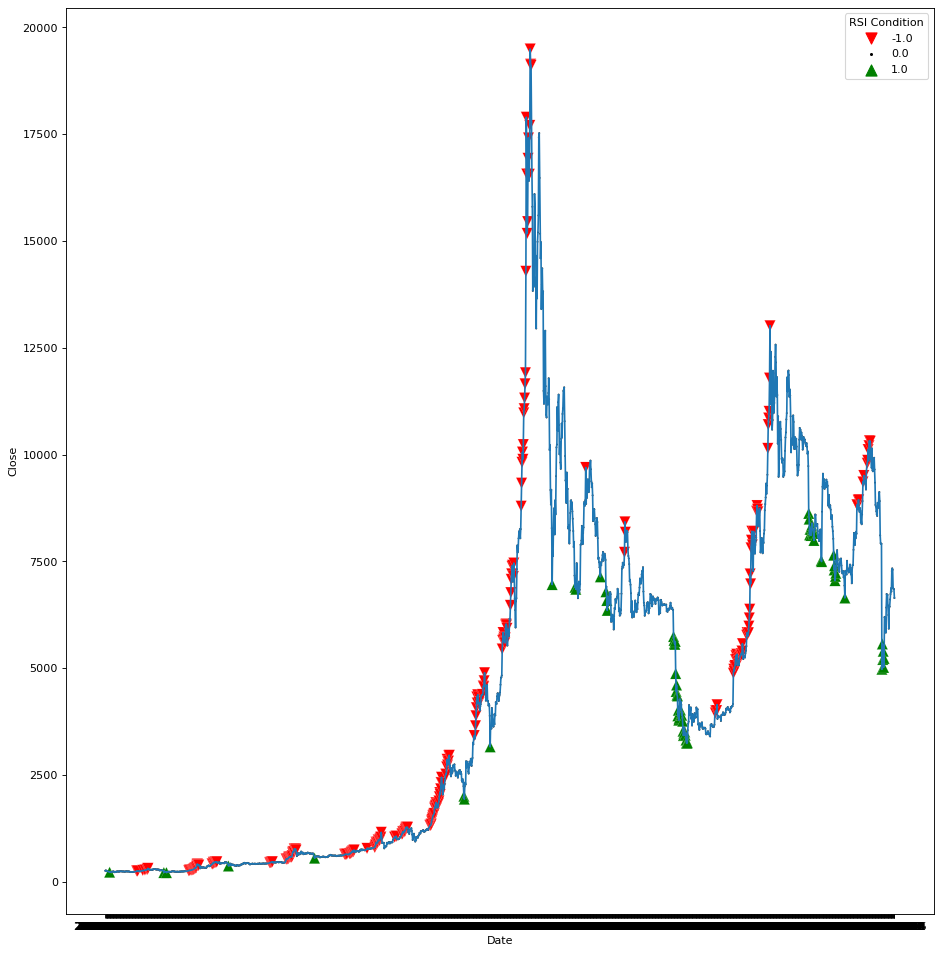

In [417]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                    1:'green',
                  -1: 'red'})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})


p0 = sns.lineplot(data=btc_regression_data, x="Date", y="Close", ax=ax)

p3 = sns.scatterplot(data=btc_regression_data, x= "Date", y='Close', hue ='RSI Condition', palette=color_dict, style='RSI Condition', markers=markers, size='RSI Condition', sizes=size_dict, ax=ax)


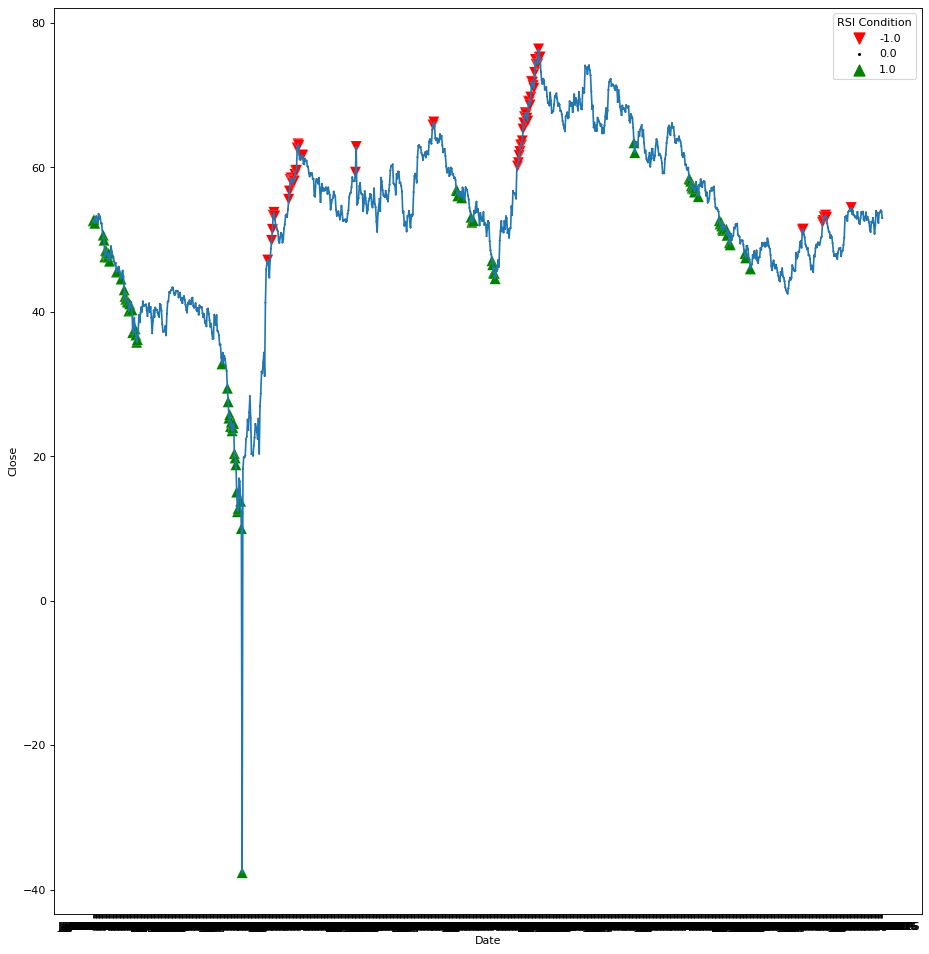

In [462]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                    1:'green',
                  -1: 'red'})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})


p0 = sns.lineplot(data=oil_regression_data, x="Date", y="Close", ax=ax)

p3 = sns.scatterplot(data=oil_regression_data, x= "Date", y='Close', hue ='RSI Condition', palette=color_dict, style='RSI Condition', markers=markers, size='RSI Condition', sizes=size_dict, ax=ax)


In [419]:
btc_regression_data = generate_regression_data(btc_df)


C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = -1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macd_df['MACD Condition'][df_entry] = 1
C:\Users\jooer\AppData\Local\Temp/ipykernel_15524/2604506480.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

## Windowed Linear Regression and Slope

In [420]:
btc_forecasted = talib.TSF(btc_regression_data['Close'], timeperiod=14)

d = {'Date': btc_regression_data['Date'], 'Close': btc_regression_data['Close'],'Forecasted': btc_forecasted}
btc_forecasted_df = pd.DataFrame(data=d)


btc_slope = talib.LINEARREG_SLOPE(btc_regression_data['Close'], timeperiod=14)

d = {'Date': btc_regression_data['Date'], 'Close': btc_regression_data['Close'], 'Slope': btc_slope}
btc_slope_df = pd.DataFrame(data=d)

btc_acceleration = talib.LINEARREG_SLOPE(btc_slope_df['Slope'], timeperiod=14)

d = {'Date': btc_regression_data['Date'], 'Close': btc_regression_data['Close'],'Acceleration': btc_acceleration}
btc_acceleration_df = pd.DataFrame(data=d)


In [421]:
btc_forecasted_df


,Date,Close,Forecasted
199,2015-04-04,253.697006,NaN
200,2015-04-05,260.597992,NaN
201,2015-04-06,255.492004,NaN
202,2015-04-07,253.179993,NaN
203,2015-04-08,245.022003,NaN
...,...,...,...
2031,2020-04-09,7302.089355,7223.577427
2032,2020-04-10,6865.493164,7267.306952
2033,2020-04-11,6859.083008,7309.345097
2035,2020-04-13,6845.037598,7299.302123


In [422]:
btc_slope_df

,Date,Close,Slope
199,2015-04-04,253.697006,NaN
200,2015-04-05,260.597992,NaN
201,2015-04-06,255.492004,NaN
202,2015-04-07,253.179993,NaN
203,2015-04-08,245.022003,NaN
...,...,...,...
2031,2020-04-09,7302.089355,69.745424
2032,2020-04-10,6865.493164,73.819549
2033,2020-04-11,6859.083008,78.066135
2035,2020-04-13,6845.037598,73.153364


In [423]:
btc_acceleration_df

,Date,Close,Acceleration
199,2015-04-04,253.697006,NaN
200,2015-04-05,260.597992,NaN
201,2015-04-06,255.492004,NaN
202,2015-04-07,253.179993,NaN
203,2015-04-08,245.022003,NaN
...,...,...,...
2031,2020-04-09,7302.089355,-5.786186
2032,2020-04-10,6865.493164,-5.917843
2033,2020-04-11,6859.083008,-3.198717
2035,2020-04-13,6845.037598,-0.787974


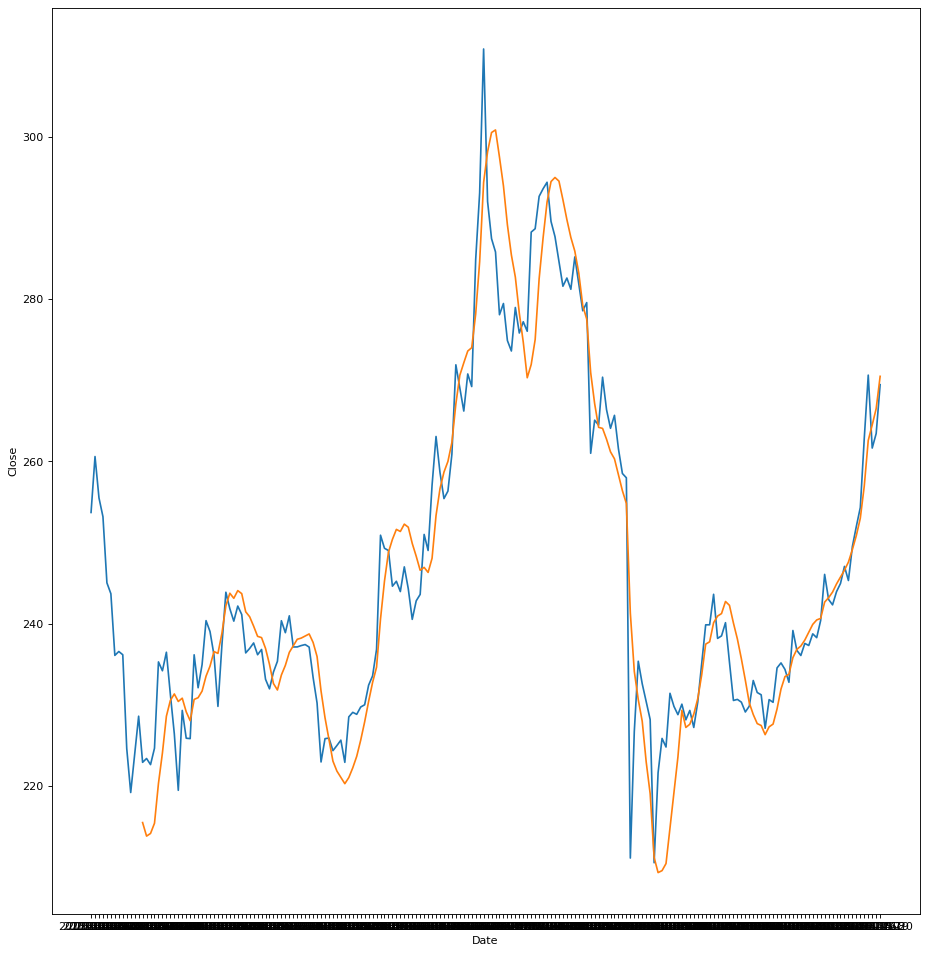

In [424]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                    1:'green',
                  -1: 'red'})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})


p0 = sns.lineplot(data=btc_regression_data[:200], x="Date", y="Close", ax=ax)
p1 = sns.lineplot(data=btc_forecasted_df[:200], x="Date", y="Forecasted", ax=ax)

# p3 = sns.scatterplot(data=btc_regression_data, x= "Date", y='Close', hue ='RSI Condition', palette=color_dict, style='RSI Condition', markers=markers, size='RSI Condition', sizes=size_dict, ax=ax)


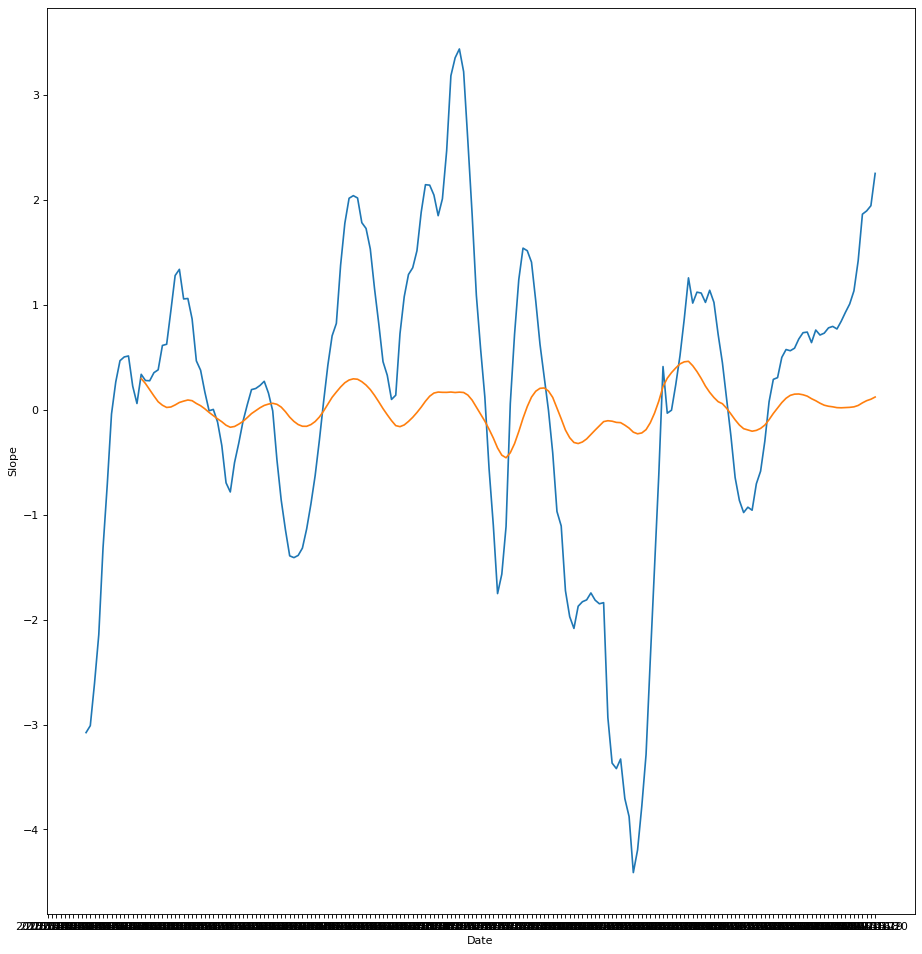

In [425]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({0:'black',
                    1:'green',
                  -1: 'red'})

markers = dict({0:'o',
                1:'^',
                -1: 'v'})

size_dict = dict({0:3,
                  1:100,
                  -1:100})

p2 = sns.lineplot(data=btc_slope_df[:200], x="Date", y="Slope", ax=ax)
p3 = sns.lineplot(data=btc_acceleration_df[:200], x="Date", y="Acceleration", ax=ax)
# p3 = sns.scatterplot(data=btc_regression_data, x= "Date", y='Close', hue ='RSI Condition', palette=color_dict, style='RSI Condition', markers=markers, size='RSI Condition', sizes=size_dict, ax=ax)


# Time Series Model
Note that TA variables are all endogenous since they are determined by its relationship with other variables.
An exogenous variable would be something like hype or fundamentals which are not a function of the closing, low or high price.

class statsmodels.tsa.ardl.ARDL(endog, lags, exog=None, order=0, trend='c', *, fixed=None, causal=False, seasonal=False, deterministic=None, hold_back=None, period=None, missing='none')[source]¶

In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
from statsmodels.tsa.api import ARDL
from statsmodels.datasets import danish_data
data = danish_data.load_pandas().data
lrm = data.lrm
exog = data[["lry", "ibo", "ide"]]


In [427]:
# this is the endogenous response variable. The dependent variable.
lrm 

period
1974-01-01    11.632550
1974-04-01    11.604152
1974-07-01    11.581521
1974-10-01    11.601847
1975-01-01    11.586305
1975-04-01    11.604499
1975-07-01    11.653307
1975-10-01    11.764246
1976-01-01    11.752934
1976-04-01    11.765480
1976-07-01    11.780583
1976-10-01    11.770178
1977-01-01    11.745892
1977-04-01    11.768651
1977-07-01    11.749825
1977-10-01    11.748697
1978-01-01    11.704916
1978-04-01    11.703444
1978-07-01    11.703001
1978-10-01    11.703673
1979-01-01    11.678903
1979-04-01    11.707782
1979-07-01    11.676155
1979-10-01    11.685921
1980-01-01    11.641606
1980-04-01    11.635180
1980-07-01    11.609261
1980-10-01    11.657613
1981-01-01    11.627818
1981-04-01    11.628852
1981-07-01    11.603778
1981-10-01    11.629065
1982-01-01    11.602023
1982-04-01    11.603775
1982-07-01    11.594622
1982-10-01    11.603820
1983-01-01    11.617126
1983-04-01    11.688096
1983-07-01    11.726515
1983-10-01    11.781250
1984-01-01    11.797620
1984-04-0

In [428]:
exog

,lry,ibo,ide
period,,,
1974-01-01,5.903658,0.154736,0.094000
1974-04-01,5.873820,0.177991,0.095500
1974-07-01,5.837818,0.170565,0.095500
1974-10-01,5.812255,0.152227,0.095500
1975-01-01,5.803945,0.134228,0.088500
1975-04-01,5.786761,0.133481,0.079000
1975-07-01,5.833412,0.128413,0.076000
1975-10-01,5.929849,0.128836,0.074000
1976-01-01,5.937654,0.141345,0.072000


In [429]:
model1 = ARDL(data.lrm, 3, data[["lry", "ibo", "ide"]], 3)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:                    lrm   No. Observations:                   55
Model:               ARDL(3, 3, 3, 3)   Log Likelihood                 140.153
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Wed, 17 Nov 2021   AIC                           -246.306
Time:                        12:01:01   BIC                           -213.135
Sample:                    10-01-1974   HQIC                          -233.589
                         - 07-01-1987                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6203      0.584      4.483      0.000       1.435       3.806
lrm.L1         0.2944      0.155      1.903      0.065      -0.019       0.608
lrm.L2         0.5407      0.138      3.919      0.000       0.261       0.820
lrm.L3        -0.2584      0.134     -1.924      0.062      -0.531       0.014
lry.L0         0.6649      0.135      4.919      0.000       0.391       0.939
lry.L1        -0.2144      0.200     -1.073      0.290      -0.620       0.191
lry.L2        -0.0673      0.194     -0.347      0.730      -0.460       0.326
lry.L3         0.0447      0.155      0.289      0.774      -0.269       0.359
ibo.L0        -1.1219      0.354     -3.165      0.003      -1.841      -0.403
ibo.L1        -0.0296      0.663     -0.045      0.965      -1.374       1.315
ibo.L2         0.2669      0.616      0.433      0.667      -0.983       1.517
ibo.L3        -1.0704      0.420     -2.546      0.015      -1.923      -0.218
ide.L0         0.1248      0.598      0.209      0.836      -1.087       1.337
ide.L1        -0.2093      0.753     -0.278      0.783      -1.736       1.317
ide.L2         0.9826      0.733      1.340      0.189      -0.505       2.470
ide.L3         0.4379      0.505      0.867      0.392      -0.586       1.462
==============================================================================
"""

In [430]:
btc_regression_data.set_index('Date')
btc_regression_data.columns

Index(['Date', 'Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration',
       'Price Relative Close-EMA200 Price Diff', 'Price Relative ATR',
       'future_price1', 'future_price3', 'future_price5', 'future_price10',
       'future_price15', 'future_price30', 'future_price1 P/L',
       'future_price1 % P/L', 'future_price3 P/L', 'future_price3 % P/L',
       'future_price5 P/L', 'future_price5 % P/L', 'future_price10 P/L',
       'future_price10 % P/L', 'future_price15 P/L', 'future_price15 % P/L',
       'future_price30 P/L', 'future_price30 % P/L'],
      dtype='object')

In [432]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 10, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 10)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   ARDL Model Results                                                   
========================================================================================================================
Dep. Variable:                                              future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)   Log Likelihood                3495.555
Method:                                                         Conditional MLE   S.D. of innovations              0.036
Date:                                                          Wed, 17 Nov 2021   AIC                          -6681.110
Time:                                                                  12:03:16   BIC                          -5827.248
Sample:                                                                      10   HQIC                         -6366.127
                                                                           1834                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0554      0.017     -3.347      0.001      -0.088      -0.023
future_price1 % P/L.L1         -0.2639      0.070     -3.752      0.000      -0.402      -0.126
future_price1 % P/L.L2         -0.0950      0.071     -1.341      0.180      -0.234       0.044
future_price1 % P/L.L3         -0.0558      0.071     -0.789      0.430      -0.194       0.083
future_price1 % P/L.L4         -0.1137      0.071     -1.605      0.109      -0.253       0.025
future_price1 % P/L.L5         -0.1691      0.071     -2.383      0.017      -0.308      -0.030
future_price1 % P/L.L6         -0.0375      0.071     -0.529      0.597      -0.176       0.102
future_price1 % P/L.L7         -0.0483      0.072     -0.672      0.502      -0.189       0.093
future_price1 % P/L.L8         -0.0541      0.072     -0.755      0.451      -0.195       0.087
future_price1 % P/L.L9         -0.0391      0.072     -0.545      0.586      -0.180       0.102
future_price1 % P/L.L10        -0.1746      0.072     -2.441      0.015      -0.315      -0.034
Close.L0                       -0.0022      0.004     -0.515      0.606      -0.011       0.006
Close.L1                        0.0038      0.008      0.509      0.611      -0.011       0.019
Close.L2                       -0.0048      0.008     -0.589      0.556      -0.021       0.011
Close.L3                        0.0034      0.008      0.420      0.674      -0.013       0.020
Close.L4                       -0.0074      0.009     -0.818      0.413      -0.025       0.010
Close.L5                        0.0258      0.010      2.563      0.010       0.006       0.045
Close.L6                       -0.0256      0.010     -2.537      0.011      -0.045      -0.006
Close.L7                        0.0118      0.010      1.159      0.247      -0.008       0.032
Close.L8                       -0.0088      0.010     -0.864      0.388      -0.029       0.011
Close.L9                       -0.0084      0.010     -0.873      0.383      -0.027       0.010
Close.L10                       0.0120      0.005      2.310      0.021       0.002       0.022
Volume.L0                   -5.313e-13   5.42e-13     -0.981      0.327   -1.59e-12    5.31e-13
Volume.L1                    1.386e-12   6.32e-13      2.195      0.028    1.47e-13    2.62e-12
Volume.L2                    -1.83e-12   6.31e-13     -2.902      0.004   -3.07e-12   -5.93e-13
Volume.L3                    9.682e-13   6.41e-13      1.510      0.131    -2.9e-13    2.23e-12
Volume.L4                   -1.682e-12   6.49e-13     -2.590      0.010   -2.96

In [433]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 8, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 8)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)   Log Likelihood                3459.594
Method:                                           Conditional MLE   S.D. of innovations              0.036
Date:                                            Wed, 17 Nov 2021   AIC                          -6665.189
Time:                                                    12:21:55   BIC                          -5965.434
Sample:                                                         8   HQIC                         -6407.069
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0516      0.015     -3.436      0.001      -0.081      -0.022
future_price1 % P/L.L1        -0.2743      0.070     -3.910      0.000      -0.412      -0.137
future_price1 % P/L.L2        -0.0528      0.071     -0.743      0.458      -0.192       0.087
future_price1 % P/L.L3        -0.0560      0.071     -0.786      0.432      -0.196       0.084
future_price1 % P/L.L4        -0.0844      0.071     -1.188      0.235      -0.224       0.055
future_price1 % P/L.L5        -0.1589      0.071     -2.241      0.025      -0.298      -0.020
future_price1 % P/L.L6        -0.0427      0.071     -0.603      0.547      -0.181       0.096
future_price1 % P/L.L7        -0.0297      0.072     -0.412      0.680      -0.171       0.112
future_price1 % P/L.L8        -0.0238      0.072     -0.331      0.741      -0.165       0.117
Close.L0                      -0.0051      0.003     -1.548      0.122      -0.012       0.001
Close.L1                       0.0076      0.007      1.126      0.260      -0.006       0.021
Close.L2                      -0.0063      0.008     -0.796      0.426      -0.022       0.009
Close.L3                       0.0019      0.008      0.246      0.806      -0.013       0.017
Close.L4                       0.0046      0.006      0.817      0.414      -0.006       0.016
Close.L5                      -0.0015      0.005     -0.290      0.772      -0.012       0.009
Close.L6                       0.0039      0.007      0.533      0.594      -0.010       0.018
Close.L7                      -0.0051      0.008     -0.607      0.544      -0.022       0.011
Close.L8                       0.0001      0.004      0.026      0.979      -0.009       0.009
Volume.L0                  -5.457e-13   5.36e-13     -1.018      0.309    -1.6e-12    5.06e-13
Volume.L1                   1.547e-12   6.21e-13      2.493      0.013     3.3e-13    2.76e-12
Volume.L2                  -1.833e-12   6.14e-13     -2.983      0.003   -3.04e-12   -6.27e-13
Volume.L3                   1.109e-12   6.33e-13      1.751      0.080   -1.33e-13    2.35e-12
Volume.L4                   -1.51e-12   6.51e-13     -2.321      0.020   -2.79e-12   -2.34e-13
Volume.L5                    5.39e-13   6.96e-13      0.775      0.439   -8.25e-13     1.9e-12
Volume.L6                  -2.871e-15   6.95e-13     -0.004      0.997   -1.37e-12    1.36e-12
Volume.L7                   2.698e-13   6.88e-13      0.392      0.695   -1.08e-12    1.62e-12
Volume.L8                   1.899e-13   5.06e-13      0.375      0.708   -8.03e-13    1.18e-12
 RSI.L0                        0.0015      0.000      3.181      0.001       0.001       0.002
 RSI.L1                       -0.0010      0

In [434]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 6, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 6)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6)   Log Likelihood                3451.582
Method:                                           Conditional MLE   S.D. of innovations              0.037
Date:                                            Wed, 17 Nov 2021   AIC                          -6705.165
Time:                                                    12:22:05   BIC                          -6159.578
Sample:                                                         6   HQIC                         -6503.924
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0473      0.013     -3.542      0.000      -0.074      -0.021
future_price1 % P/L.L1        -0.2737      0.070     -3.932      0.000      -0.410      -0.137
future_price1 % P/L.L2        -0.0650      0.070     -0.929      0.353      -0.202       0.072
future_price1 % P/L.L3        -0.0704      0.070     -1.007      0.314      -0.208       0.067
future_price1 % P/L.L4        -0.0840      0.070     -1.199      0.231      -0.221       0.053
future_price1 % P/L.L5        -0.1528      0.070     -2.183      0.029      -0.290      -0.015
future_price1 % P/L.L6        -0.0450      0.070     -0.643      0.520      -0.182       0.092
Close.L0                      -0.0027      0.003     -0.919      0.358      -0.008       0.003
Close.L1                       0.0021      0.006      0.366      0.714      -0.009       0.013
Close.L2                       0.0015      0.005      0.317      0.751      -0.008       0.011
Close.L3                      -0.0046      0.003     -1.542      0.123      -0.010       0.001
Close.L4                       0.0040      0.004      1.109      0.267      -0.003       0.011
Close.L5                       0.0033      0.005      0.704      0.482      -0.006       0.012
Close.L6                      -0.0036      0.003     -1.161      0.246      -0.010       0.002
Volume.L0                  -6.048e-13   5.14e-13     -1.178      0.239   -1.61e-12    4.02e-13
Volume.L1                   1.565e-12   6.04e-13      2.590      0.010     3.8e-13    2.75e-12
Volume.L2                  -1.901e-12   6.05e-13     -3.142      0.002   -3.09e-12   -7.14e-13
Volume.L3                   8.967e-13    6.2e-13      1.446      0.148    -3.2e-13    2.11e-12
Volume.L4                  -1.551e-12   6.31e-13     -2.457      0.014   -2.79e-12   -3.13e-13
Volume.L5                   3.872e-13   6.68e-13      0.579      0.562   -9.24e-13     1.7e-12
Volume.L6                   9.909e-13   4.93e-13      2.011      0.045    2.43e-14    1.96e-12
 RSI.L0                        0.0015      0.000      3.170      0.002       0.001       0.002
 RSI.L1                       -0.0009      0.001     -1.527      0.127      -0.002       0.000
 RSI.L2                       -0.0002      0.001     -0.395      0.693      -0.001       0.001
 RSI.L3                        0.0009      0.001      1.504      0.133      -0.000       0.002
 RSI.L4                    -7.753e-06      0.001     -0.013      0.990      -0.001       0.001
 RSI.L5                        0.0005      0.001      0.779      0.436      -0.001       0.002
 RSI.L6                       -0.0007      0.000     -1.622      0.105      -0.002       0.000
RSI Condition.L0               0.0033      0

In [435]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 4, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 4)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4)   Log Likelihood                3430.389
Method:                                           Conditional MLE   S.D. of innovations              0.037
Date:                                            Wed, 17 Nov 2021   AIC                          -6718.777
Time:                                                    12:22:17   BIC                          -6327.420
Sample:                                                         4   HQIC                         -6574.433
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0358      0.012     -3.029      0.002      -0.059      -0.013
future_price1 % P/L.L1        -0.2732      0.069     -3.972      0.000      -0.408      -0.138
future_price1 % P/L.L2        -0.0446      0.070     -0.641      0.522      -0.181       0.092
future_price1 % P/L.L3        -0.0597      0.070     -0.856      0.392      -0.197       0.077
future_price1 % P/L.L4        -0.0758      0.070     -1.087      0.277      -0.212       0.061
Close.L0                      -0.0008      0.002     -0.556      0.578      -0.004       0.002
Close.L1                       0.0007      0.002      0.298      0.766      -0.004       0.006
Close.L2                       0.0011      0.003      0.415      0.678      -0.004       0.006
Close.L3                      -0.0030      0.003     -1.096      0.273      -0.009       0.002
Close.L4                       0.0020      0.002      1.156      0.248      -0.001       0.005
Volume.L0                    -4.8e-13   5.01e-13     -0.959      0.338   -1.46e-12    5.02e-13
Volume.L1                   1.515e-12   5.83e-13      2.600      0.009    3.72e-13    2.66e-12
Volume.L2                  -1.715e-12   5.71e-13     -3.004      0.003   -2.83e-12   -5.95e-13
Volume.L3                    9.99e-13   5.87e-13      1.703      0.089   -1.52e-13    2.15e-12
Volume.L4                  -4.745e-13   4.41e-13     -1.076      0.282   -1.34e-12    3.91e-13
 RSI.L0                        0.0015      0.000      3.134      0.002       0.001       0.002
 RSI.L1                       -0.0011      0.001     -1.726      0.085      -0.002       0.000
 RSI.L2                       -0.0002      0.001     -0.269      0.788      -0.001       0.001
 RSI.L3                        0.0009      0.001      1.512      0.131      -0.000       0.002
 RSI.L4                       -0.0004      0.000     -0.931      0.352      -0.001       0.000
RSI Condition.L0               0.0024      0.004      0.591      0.555      -0.006       0.010
RSI Condition.L1              -0.0029      0.004     -0.665      0.506      -0.011       0.006
RSI Condition.L2              -0.0049      0.004     -1.122      0.262      -0.014       0.004
RSI Condition.L3               0.0126      0.004      2.880      0.004       0.004       0.021
RSI Condition.L4               0.0006      0.004      0.151      0.880      -0.007       0.009
MACD Condition.L0              0.0274      0.004      7.163      0.000       0.020       0.035
MACD Condition.L1              0.0039      0.004      0.995      0.320      -0.004       0.012
MACD Condition.L2              0.0089      0.004      2.220      0.027       0.001       0.017
MACD Condition.L3              0.0006      0

In [436]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 2, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 2)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)   Log Likelihood                3400.721
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Wed, 17 Nov 2021   AIC                          -6715.441
Time:                                                    12:22:39   BIC                          -6478.375
Sample:                                                         2   HQIC                         -6628.009
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0201      0.010     -1.962      0.050      -0.040   -6.43e-06
future_price1 % P/L.L1        -0.3004      0.069     -4.365      0.000      -0.435      -0.165
future_price1 % P/L.L2        -0.0452      0.070     -0.649      0.516      -0.182       0.091
Close.L0                      -0.0006      0.001     -0.405      0.685      -0.004       0.002
Close.L1                       0.0014      0.002      0.593      0.553      -0.003       0.006
Close.L2                      -0.0008      0.002     -0.538      0.591      -0.004       0.002
Volume.L0                  -4.797e-13   4.46e-13     -1.076      0.282   -1.35e-12    3.95e-13
Volume.L1                   8.115e-13   5.51e-13      1.473      0.141   -2.69e-13    1.89e-12
Volume.L2                  -3.887e-13   4.12e-13     -0.943      0.346    -1.2e-12    4.19e-13
 RSI.L0                        0.0017      0.000      3.567      0.000       0.001       0.003
 RSI.L1                       -0.0010      0.001     -1.714      0.087      -0.002       0.000
 RSI.L2                       -0.0002      0.000     -0.428      0.668      -0.001       0.001
RSI Condition.L0               0.0041      0.004      0.993      0.321      -0.004       0.012
RSI Condition.L1              -0.0014      0.004     -0.331      0.741      -0.010       0.007
RSI Condition.L2              -0.0012      0.004     -0.292      0.770      -0.009       0.007
MACD Condition.L0              0.0265      0.004      6.979      0.000       0.019       0.034
MACD Condition.L1              0.0026      0.004      0.659      0.510      -0.005       0.010
MACD Condition.L2              0.0083      0.004      2.154      0.031       0.001       0.016
EMA Condition.L0              -0.0011      0.003     -0.347      0.729      -0.007       0.005
EMA Condition.L1              -0.0005      0.003     -0.151      0.880      -0.007       0.006
EMA Condition.L2              -0.0016      0.003     -0.546      0.585      -0.007       0.004
Close-EMA200 Price Diff.L0     0.0006      0.001      0.406      0.685      -0.002       0.004
Close-EMA200 Price Diff.L1    -0.0014      0.002     -0.602      0.547      -0.006       0.003
Close-EMA200 Price Diff.L2     0.0008      0.002      0.535      0.593      -0.002       0.004
BB Condition.L0               -0.0032      0.004     -0.866      0.387      -0.010       0.004
BB Condition.L1                0.0073      0.004      1.901      0.058      -0.000       0.015
BB Condition.L2               -0.0045      0.004     -1.287      0.198      -0.011       0.002
 ATR.L0                        0.0001   6.73e-05      1.929      0.054   -2.19e-06       0.000
 ATR.L1                       -0.0002      0

In [437]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3397.861
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Wed, 17 Nov 2021   AIC                          -6737.721
Time:                                                    12:23:07   BIC                          -6577.824
Sample:                                                         1   HQIC                         -6678.751
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0191      0.009     -2.056      0.040      -0.037      -0.001
future_price1 % P/L.L1        -0.3048      0.068     -4.473      0.000      -0.438      -0.171
Close.L0                      -0.0009      0.001     -0.691      0.489      -0.004       0.002
Close.L1                       0.0009      0.001      0.681      0.496      -0.002       0.003
Volume.L0                  -4.047e-13    4.1e-13     -0.988      0.324   -1.21e-12    3.99e-13
Volume.L1                   3.133e-13   3.99e-13      0.786      0.432   -4.68e-13     1.1e-12
 RSI.L0                        0.0017      0.000      3.666      0.000       0.001       0.003
 RSI.L1                       -0.0013      0.000     -2.931      0.003      -0.002      -0.000
RSI Condition.L0               0.0038      0.004      0.947      0.344      -0.004       0.012
RSI Condition.L1              -0.0026      0.004     -0.659      0.510      -0.010       0.005
MACD Condition.L0              0.0259      0.004      6.922      0.000       0.019       0.033
MACD Condition.L1              0.0012      0.004      0.307      0.759      -0.006       0.009
EMA Condition.L0              -0.0008      0.003     -0.260      0.795      -0.007       0.005
EMA Condition.L1           -6.605e-05      0.003     -0.024      0.981      -0.006       0.005
Close-EMA200 Price Diff.L0     0.0009      0.001      0.692      0.489      -0.002       0.004
Close-EMA200 Price Diff.L1    -0.0009      0.001     -0.693      0.488      -0.003       0.002
BB Condition.L0               -0.0033      0.004     -0.911      0.362      -0.010       0.004
BB Condition.L1                0.0060      0.003      1.712      0.087      -0.001       0.013
 ATR.L0                        0.0001   5.97e-05      1.830      0.067   -7.86e-06       0.000
 ATR.L1                    -9.795e-05   5.97e-05     -1.640      0.101      -0.000    1.92e-05
Trend.L0                      -0.0029      0.004     -0.757      0.449      -0.011       0.005
Trend.L1                       0.0044      0.004      1.139      0.255      -0.003       0.012
Forecasted.L0                  0.0002      0.000      0.698      0.485      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.667      0.505      -0.000       0.000
Slope.L0                      -0.0007      0.001     -0.563      0.574      -0.003       0.002
Slope.L1                       0.0005      0.001      0.559      0.576      -0.001       0.002
Acceleration.L0               -0.0004      0.001     -0.713      0.476      -0.001       0.001
Acceleration.L1                0.0002      0.001      0.359      0.720      -0.001       0.001
============================================

In [438]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 0, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 0)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   Log Likelihood                3386.485
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Wed, 17 Nov 2021   AIC                          -6742.970
Time:                                                    16:58:08   BIC                          -6660.256
Sample:                                                         0   HQIC                         -6712.466
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0119      0.008     -1.463      0.144      -0.028       0.004
Close.L0                   -5.458e-06   3.04e-06     -1.797      0.073   -1.14e-05       5e-07
Volume.L0                  -2.902e-14   1.23e-13     -0.236      0.813    -2.7e-13    2.12e-13
 RSI.L0                        0.0003      0.000      1.926      0.054   -5.42e-06       0.001
RSI Condition.L0               0.0030      0.004      0.864      0.388      -0.004       0.010
MACD Condition.L0              0.0261      0.004      7.141      0.000       0.019       0.033
EMA Condition.L0              -0.0003      0.003     -0.109      0.914      -0.005       0.005
Close-EMA200 Price Diff.L0 -1.766e-06   1.09e-06     -1.622      0.105    -3.9e-06     3.7e-07
BB Condition.L0                0.0009      0.003      0.277      0.782      -0.005       0.007
 ATR.L0                     1.239e-05   6.98e-06      1.774      0.076   -1.31e-06    2.61e-05
Trend.L0                       0.0009      0.002      0.593      0.553      -0.002       0.004
Forecasted.L0                 4.6e-06   3.07e-06      1.499      0.134   -1.42e-06    1.06e-05
Slope.L0                    3.393e-05   2.45e-05      1.385      0.166   -1.41e-05     8.2e-05
Acceleration.L0               -0.0002      0.000     -1.693      0.091      -0.000     3.6e-05
==============================================================================================
"""

In [106]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict(dynamic=True)-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0015459651576634926

In [107]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.0014454304066524632

In [93]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 5, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 5, causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5)   Log Likelihood                3401.908
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sat, 13 Nov 2021   AIC                          -6659.817
Time:                                                    10:24:18   BIC                          -6262.987
Sample:                                                         5   HQIC                         -6513.449
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0259      0.012     -2.151      0.032      -0.049      -0.002
future_price1 % P/L.L1        -0.0263      0.024     -1.085      0.278      -0.074       0.021
future_price1 % P/L.L2        -0.0312      0.070     -0.444      0.657      -0.169       0.107
future_price1 % P/L.L3        -0.0429      0.071     -0.607      0.544      -0.182       0.096
future_price1 % P/L.L4        -0.0677      0.071     -0.956      0.339      -0.207       0.071
future_price1 % P/L.L5        -0.1531      0.071     -2.163      0.031      -0.292      -0.014
Close.L1                      -0.0001      0.002     -0.076      0.939      -0.003       0.003
Close.L2                       0.0010      0.003      0.396      0.692      -0.004       0.006
Close.L3                      -0.0047      0.003     -1.593      0.111      -0.010       0.001
Close.L4                       0.0041      0.003      1.444      0.149      -0.001       0.010
Close.L5                      -0.0004      0.002     -0.219      0.827      -0.004       0.003
Volume.L1                   1.247e-12   5.09e-13      2.449      0.014    2.48e-13    2.25e-12
Volume.L2                  -1.859e-12   5.94e-13     -3.130      0.002   -3.02e-12   -6.94e-13
Volume.L3                   1.239e-12   5.91e-13      2.098      0.036     8.1e-14     2.4e-12
Volume.L4                  -1.662e-12   6.05e-13     -2.746      0.006   -2.85e-12   -4.75e-13
Volume.L5                   8.466e-13   4.48e-13      1.889      0.059   -3.25e-14    1.73e-12
 RSI.L1                        0.0003      0.000      0.517      0.605      -0.001       0.001
 RSI.L2                       -0.0002      0.001     -0.380      0.704      -0.001       0.001
 RSI.L3                        0.0011      0.001      1.752      0.080      -0.000       0.002
 RSI.L4                       -0.0002      0.001     -0.312      0.755      -0.001       0.001
 RSI.L5                       -0.0003      0.000     -0.715      0.475      -0.001       0.001
RSI Condition.L1              -0.0028      0.004     -0.665      0.506      -0.011       0.005
RSI Condition.L2              -0.0046      0.004     -1.030      0.303      -0.013       0.004
RSI Condition.L3               0.0142      0.004      3.177      0.002       0.005       0.023
RSI Condition.L4               0.0016      0.004      0.360      0.719      -0.007       0.010
RSI Condition.L5              -0.0022      0.004     -0.536      0.592      -0.010       0.006
MACD Condition.L1              0.0009      0.004      0.235      0.814      -0.007       0.009
MACD Condition.L2              0.0058      0.004      1.434      0.152      -0.002       0.014
MACD Condition.L3             -0.0018      0

In [99]:
len(results.predict())
len(btc_regression_data['future_price1 % P/L'])

1834

In [102]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict(dynamic=True)-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.001461337237831895

In [104]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.001408179001769347

In [91]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3358.975
Method:                                           Conditional MLE   S.D. of innovations              0.039
Date:                                            Sat, 13 Nov 2021   AIC                          -6685.951
Time:                                                    10:22:35   BIC                          -6597.732
Sample:                                                         1   HQIC                         -6653.416
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0044      0.008     -0.529      0.597      -0.021       0.012
future_price1 % P/L.L1        -0.0305      0.024     -1.280      0.201      -0.077       0.016
Close.L1                   -5.289e-07   3.08e-06     -0.171      0.864   -6.58e-06    5.52e-06
Volume.L1                   -3.38e-15   1.25e-13     -0.027      0.978   -2.48e-13    2.41e-13
 RSI.L1                        0.0002      0.000      0.975      0.330      -0.000       0.000
RSI Condition.L1              -0.0006      0.004     -0.181      0.857      -0.008       0.006
MACD Condition.L1             -0.0007      0.004     -0.176      0.860      -0.008       0.007
EMA Condition.L1               0.0018      0.003      0.666      0.506      -0.003       0.007
Close-EMA200 Price Diff.L1 -1.655e-06   1.11e-06     -1.498      0.134   -3.82e-06    5.13e-07
BB Condition.L1                0.0039      0.003      1.227      0.220      -0.002       0.010
 ATR.L1                     1.153e-05   7.09e-06      1.625      0.104   -2.38e-06    2.54e-05
Trend.L1                       0.0007      0.002      0.442      0.658      -0.002       0.004
Forecasted.L1              -3.745e-07   3.12e-06     -0.120      0.904   -6.48e-06    5.74e-06
Slope.L1                     3.41e-05   2.49e-05      1.371      0.170   -1.47e-05    8.29e-05
Acceleration.L1               -0.0002      0.000     -1.353      0.176      -0.000    8.28e-05
==============================================================================================
"""

In [92]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.0013463983932337931

In [80]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='n')
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3395.717
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Fri, 12 Nov 2021   AIC                          -6735.434
Time:                                                    23:52:01   BIC                          -6581.050
Sample:                                                         1   HQIC                         -6678.497
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
future_price1 % P/L.L1        -0.2855      0.068     -4.226      0.000      -0.418      -0.153
Close.L0                      -0.0009      0.001     -0.710      0.478      -0.004       0.002
Close.L1                       0.0009      0.001      0.700      0.484      -0.002       0.004
Volume.L0                  -3.766e-13    4.1e-13     -0.919      0.358   -1.18e-12    4.27e-13
Volume.L1                   3.116e-13   3.99e-13      0.781      0.435   -4.71e-13    1.09e-12
 RSI.L0                        0.0014      0.000      3.149      0.002       0.001       0.002
 RSI.L1                       -0.0013      0.000     -3.001      0.003      -0.002      -0.000
RSI Condition.L0               0.0012      0.004      0.327      0.743      -0.006       0.009
RSI Condition.L1              -0.0050      0.004     -1.315      0.189      -0.013       0.002
MACD Condition.L0              0.0252      0.004      6.757      0.000       0.018       0.032
MACD Condition.L1              0.0005      0.004      0.123      0.902      -0.007       0.008
EMA Condition.L0               0.0012      0.003      0.422      0.673      -0.004       0.007
EMA Condition.L1               0.0019      0.003      0.708      0.479      -0.003       0.007
Close-EMA200 Price Diff.L0     0.0009      0.001      0.711      0.477      -0.002       0.004
Close-EMA200 Price Diff.L1    -0.0009      0.001     -0.713      0.476      -0.004       0.002
BB Condition.L0               -0.0045      0.004     -1.251      0.211      -0.011       0.003
BB Condition.L1                0.0049      0.003      1.419      0.156      -0.002       0.012
 ATR.L0                        0.0001   5.97e-05      1.741      0.082   -1.31e-05       0.000
 ATR.L1                    -9.329e-05   5.97e-05     -1.562      0.119      -0.000    2.39e-05
Trend.L0                      -0.0031      0.004     -0.790      0.430      -0.011       0.005
Trend.L1                       0.0038      0.004      0.981      0.327      -0.004       0.011
Forecasted.L0                  0.0001      0.000      0.664      0.507      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.633      0.527      -0.000       0.000
Slope.L0                      -0.0006      0.001     -0.531      0.595      -0.003       0.002
Slope.L1                       0.0005      0.001      0.541      0.589      -0.001       0.002
Acceleration.L0               -0.0004      0.001     -0.821      0.411      -0.001       0.001
Acceleration.L1                0.0002      0.001      0.376      0.707      -0.001       0.001
==============================================================================================
"""

In [81]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.0013864011633899058

In [82]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='t')
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3399.590
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Fri, 12 Nov 2021   AIC                          -6741.180
Time:                                                    23:53:03   BIC                          -6581.282
Sample:                                                         1   HQIC                         -6682.209
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
trend                       1.276e-05   4.62e-06      2.765      0.006    3.71e-06    2.18e-05
future_price1 % P/L.L1        -0.2826      0.067     -4.190      0.000      -0.415      -0.150
Close.L0                      -0.0009      0.001     -0.652      0.514      -0.003       0.002
Close.L1                       0.0008      0.001      0.641      0.522      -0.002       0.003
Volume.L0                   -4.51e-13    4.1e-13     -1.100      0.272   -1.26e-12    3.53e-13
Volume.L1                   2.031e-13      4e-13      0.508      0.612   -5.82e-13    9.88e-13
 RSI.L0                        0.0013      0.000      2.987      0.003       0.000       0.002
 RSI.L1                       -0.0013      0.000     -3.037      0.002      -0.002      -0.000
RSI Condition.L0               0.0007      0.004      0.172      0.863      -0.007       0.008
RSI Condition.L1              -0.0056      0.004     -1.457      0.145      -0.013       0.002
MACD Condition.L0              0.0248      0.004      6.666      0.000       0.018       0.032
MACD Condition.L1              0.0002      0.004      0.064      0.949      -0.007       0.008
EMA Condition.L0               0.0014      0.003      0.504      0.614      -0.004       0.007
EMA Condition.L1               0.0021      0.003      0.811      0.417      -0.003       0.007
Close-EMA200 Price Diff.L0     0.0009      0.001      0.653      0.514      -0.002       0.003
Close-EMA200 Price Diff.L1    -0.0009      0.001     -0.653      0.514      -0.003       0.002
BB Condition.L0               -0.0047      0.004     -1.305      0.192      -0.012       0.002
BB Condition.L1                0.0047      0.003      1.364      0.173      -0.002       0.011
 ATR.L0                        0.0001   5.96e-05      1.798      0.072   -9.72e-06       0.000
 ATR.L1                    -8.953e-05   5.96e-05     -1.501      0.134      -0.000    2.75e-05
Trend.L0                      -0.0035      0.004     -0.896      0.370      -0.011       0.004
Trend.L1                       0.0033      0.004      0.857      0.391      -0.004       0.011
Forecasted.L0                  0.0001      0.000      0.627      0.531      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.596      0.551      -0.000       0.000
Slope.L0                      -0.0006      0.001     -0.491      0.624      -0.003       0.002
Slope.L1                       0.0005      0.001      0.504      0.614      -0.001       0.002
Acceleration.L0               -0.0004      0.001     -0.881      0.379      -0.001       0.001
Acceleration.L1                0.0002      0.001      0.435      0.664      -0.001       0.001
============================================

In [83]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.0013972638723326021

In [76]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='ct')
results = model1.fit()
results.summary()


D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3402.257
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Fri, 12 Nov 2021   AIC                          -6744.514
Time:                                                    23:50:19   BIC                          -6579.103
Sample:                                                         1   HQIC                         -6683.510
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0214      0.009     -2.293      0.022      -0.040      -0.003
trend                       1.362e-05   4.63e-06      2.945      0.003    4.55e-06    2.27e-05
future_price1 % P/L.L1        -0.3039      0.068     -4.470      0.000      -0.437      -0.171
Close.L0                      -0.0008      0.001     -0.627      0.531      -0.003       0.002
Close.L1                       0.0008      0.001      0.615      0.538      -0.002       0.003
Volume.L0                  -4.874e-13    4.1e-13     -1.189      0.235   -1.29e-12    3.17e-13
Volume.L1                   1.976e-13      4e-13      0.494      0.621   -5.86e-13    9.81e-13
 RSI.L0                        0.0017      0.000      3.592      0.000       0.001       0.003
 RSI.L1                       -0.0013      0.000     -2.961      0.003      -0.002      -0.000
RSI Condition.L0               0.0035      0.004      0.865      0.387      -0.004       0.011
RSI Condition.L1              -0.0029      0.004     -0.734      0.463      -0.011       0.005
MACD Condition.L0              0.0256      0.004      6.850      0.000       0.018       0.033
MACD Condition.L1              0.0010      0.004      0.266      0.790      -0.006       0.008
EMA Condition.L0              -0.0008      0.003     -0.255      0.799      -0.007       0.005
EMA Condition.L1           -4.077e-06      0.003     -0.001      0.999      -0.005       0.005
Close-EMA200 Price Diff.L0     0.0008      0.001      0.628      0.530      -0.002       0.003
Close-EMA200 Price Diff.L1    -0.0008      0.001     -0.628      0.530      -0.003       0.002
BB Condition.L0               -0.0034      0.004     -0.929      0.353      -0.010       0.004
BB Condition.L1                0.0059      0.003      1.690      0.091      -0.001       0.013
 ATR.L0                        0.0001   5.96e-05      1.901      0.057   -3.58e-06       0.000
 ATR.L1                    -9.448e-05   5.96e-05     -1.585      0.113      -0.000    2.24e-05
Trend.L0                      -0.0034      0.004     -0.867      0.386      -0.011       0.004
Trend.L1                       0.0040      0.004      1.027      0.305      -0.004       0.012
Forecasted.L0                  0.0001      0.000      0.662      0.508      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.633      0.527      -0.000       0.000
Slope.L0                      -0.0006      0.001     -0.524      0.601      -0.003       0.002
Slope.L1                       0.0005      0.001      0.522      0.601      -0.001       0.002
Acceleration.L0               -0.0004      0.001     -0.763      0.445      -0.001       0.001
Acceleration.L1                0.0002      0

In [77]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.001399154178203941

In [84]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3358.975
Method:                                           Conditional MLE   S.D. of innovations              0.039
Date:                                            Fri, 12 Nov 2021   AIC                          -6685.951
Time:                                                    23:59:24   BIC                          -6597.732
Sample:                                                         1   HQIC                         -6653.416
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0044      0.008     -0.529      0.597      -0.021       0.012
future_price1 % P/L.L1        -0.0305      0.024     -1.280      0.201      -0.077       0.016
Close.L1                   -5.289e-07   3.08e-06     -0.171      0.864   -6.58e-06    5.52e-06
Volume.L1                   -3.38e-15   1.25e-13     -0.027      0.978   -2.48e-13    2.41e-13
 RSI.L1                        0.0002      0.000      0.975      0.330      -0.000       0.000
RSI Condition.L1              -0.0006      0.004     -0.181      0.857      -0.008       0.006
MACD Condition.L1             -0.0007      0.004     -0.176      0.860      -0.008       0.007
EMA Condition.L1               0.0018      0.003      0.666      0.506      -0.003       0.007
Close-EMA200 Price Diff.L1 -1.655e-06   1.11e-06     -1.498      0.134   -3.82e-06    5.13e-07
BB Condition.L1                0.0039      0.003      1.227      0.220      -0.002       0.010
 ATR.L1                     1.153e-05   7.09e-06      1.625      0.104   -2.38e-06    2.54e-05
Trend.L1                       0.0007      0.002      0.442      0.658      -0.002       0.004
Forecasted.L1              -3.745e-07   3.12e-06     -0.120      0.904   -6.48e-06    5.74e-06
Slope.L1                     3.41e-05   2.49e-05      1.371      0.170   -1.47e-05    8.29e-05
Acceleration.L1               -0.0002      0.000     -1.353      0.176      -0.000    8.28e-05
==============================================================================================
"""

In [85]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.0013463983932337931

In [86]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3397.861
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sat, 13 Nov 2021   AIC                          -6737.721
Time:                                                    00:00:59   BIC                          -6577.824
Sample:                                                         1   HQIC                         -6678.751
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0191      0.009     -2.056      0.040      -0.037      -0.001
future_price1 % P/L.L1        -0.3048      0.068     -4.473      0.000      -0.438      -0.171
Close.L0                      -0.0009      0.001     -0.691      0.489      -0.004       0.002
Close.L1                       0.0009      0.001      0.681      0.496      -0.002       0.003
Volume.L0                  -4.047e-13    4.1e-13     -0.988      0.324   -1.21e-12    3.99e-13
Volume.L1                   3.133e-13   3.99e-13      0.786      0.432   -4.68e-13     1.1e-12
 RSI.L0                        0.0017      0.000      3.666      0.000       0.001       0.003
 RSI.L1                       -0.0013      0.000     -2.931      0.003      -0.002      -0.000
RSI Condition.L0               0.0038      0.004      0.947      0.344      -0.004       0.012
RSI Condition.L1              -0.0026      0.004     -0.659      0.510      -0.010       0.005
MACD Condition.L0              0.0259      0.004      6.922      0.000       0.019       0.033
MACD Condition.L1              0.0012      0.004      0.307      0.759      -0.006       0.009
EMA Condition.L0              -0.0008      0.003     -0.260      0.795      -0.007       0.005
EMA Condition.L1           -6.605e-05      0.003     -0.024      0.981      -0.006       0.005
Close-EMA200 Price Diff.L0     0.0009      0.001      0.692      0.489      -0.002       0.004
Close-EMA200 Price Diff.L1    -0.0009      0.001     -0.693      0.488      -0.003       0.002
BB Condition.L0               -0.0033      0.004     -0.911      0.362      -0.010       0.004
BB Condition.L1                0.0060      0.003      1.712      0.087      -0.001       0.013
 ATR.L0                        0.0001   5.97e-05      1.830      0.067   -7.86e-06       0.000
 ATR.L1                    -9.795e-05   5.97e-05     -1.640      0.101      -0.000    1.92e-05
Trend.L0                      -0.0029      0.004     -0.757      0.449      -0.011       0.005
Trend.L1                       0.0044      0.004      1.139      0.255      -0.003       0.012
Forecasted.L0                  0.0002      0.000      0.698      0.485      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.667      0.505      -0.000       0.000
Slope.L0                      -0.0007      0.001     -0.563      0.574      -0.003       0.002
Slope.L1                       0.0005      0.001      0.559      0.576      -0.001       0.002
Acceleration.L0               -0.0004      0.001     -0.713      0.476      -0.001       0.001
Acceleration.L1                0.0002      0.001      0.359      0.720      -0.001       0.001
============================================

In [ ]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


In [44]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 3, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 3)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3)   Log Likelihood                3416.870
Method:                                           Conditional MLE   S.D. of innovations              0.037
Date:                                            Fri, 12 Nov 2021   AIC                          -6719.741
Time:                                                    19:48:14   BIC                          -6405.521
Sample:                                                         3   HQIC                         -6603.850
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0338      0.011     -3.063      0.002      -0.055      -0.012
future_price1 % P/L.L1        -0.2840      0.069     -4.138      0.000      -0.419      -0.149
future_price1 % P/L.L2        -0.0420      0.070     -0.604      0.546      -0.179       0.095
future_price1 % P/L.L3        -0.0653      0.070     -0.937      0.349      -0.202       0.071
Close.L0                      -0.0006      0.001     -0.386      0.700      -0.004       0.002
Close.L1                       0.0003      0.002      0.138      0.890      -0.004       0.005
Close.L2                       0.0009      0.003      0.365      0.715      -0.004       0.006
Close.L3                      -0.0008      0.002     -0.442      0.658      -0.004       0.003
Volume.L0                  -5.984e-13    4.9e-13     -1.221      0.222   -1.56e-12    3.63e-13
Volume.L1                   1.053e-12   5.58e-13      1.886      0.059    -4.2e-14    2.15e-12
Volume.L2                  -1.371e-12   5.59e-13     -2.451      0.014   -2.47e-12   -2.74e-13
Volume.L3                   8.314e-13    4.3e-13      1.932      0.054   -1.27e-14    1.68e-12
 RSI.L0                        0.0015      0.000      3.249      0.001       0.001       0.002
 RSI.L1                       -0.0011      0.001     -1.791      0.073      -0.002       0.000
 RSI.L2                       -0.0001      0.001     -0.235      0.814      -0.001       0.001
 RSI.L3                        0.0004      0.000      0.943      0.346      -0.000       0.001
RSI Condition.L0               0.0024      0.004      0.580      0.562      -0.006       0.010
RSI Condition.L1              -0.0028      0.004     -0.635      0.526      -0.011       0.006
RSI Condition.L2              -0.0051      0.004     -1.182      0.237      -0.014       0.003
RSI Condition.L3               0.0121      0.004      2.938      0.003       0.004       0.020
MACD Condition.L0              0.0267      0.004      7.033      0.000       0.019       0.034
MACD Condition.L1              0.0033      0.004      0.834      0.404      -0.004       0.011
MACD Condition.L2              0.0086      0.004      2.197      0.028       0.001       0.016
MACD Condition.L3             -0.0015      0.004     -0.390      0.697      -0.009       0.006
EMA Condition.L0              -0.0012      0.003     -0.406      0.685      -0.007       0.005
EMA Condition.L1               0.0006      0.003      0.208      0.836      -0.005       0.007
EMA Condition.L2               0.0007      0.003      0.222      0.824      -0.005       0.007
EMA Condition.L3              -0.0068      0.003     -2.373      0.018      -0.012      -0.001
Close-EMA200 Price Diff.L0     0.0006      0

In [45]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 5, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 5)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5)   Log Likelihood                3441.042
Method:                                           Conditional MLE   S.D. of innovations              0.037
Date:                                            Fri, 12 Nov 2021   AIC                          -6712.084
Time:                                                    19:48:36   BIC                          -6243.604
Sample:                                                         5   HQIC                         -6539.289
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0402      0.013     -3.197      0.001      -0.065      -0.016
future_price1 % P/L.L1        -0.2629      0.069     -3.808      0.000      -0.398      -0.128
future_price1 % P/L.L2        -0.0505      0.070     -0.724      0.469      -0.187       0.086
future_price1 % P/L.L3        -0.0631      0.070     -0.904      0.366      -0.200       0.074
future_price1 % P/L.L4        -0.0773      0.070     -1.105      0.269      -0.214       0.060
future_price1 % P/L.L5        -0.1448      0.070     -2.072      0.038      -0.282      -0.008
Close.L0                      -0.0003      0.003     -0.110      0.912      -0.005       0.005
Close.L1                       0.0001      0.004      0.030      0.976      -0.007       0.008
Close.L2                       0.0006      0.003      0.217      0.828      -0.005       0.006
Close.L3                      -0.0040      0.003     -1.373      0.170      -0.010       0.002
Close.L4                       0.0043      0.004      1.215      0.225      -0.003       0.011
Close.L5                      -0.0008      0.003     -0.295      0.768      -0.006       0.004
Volume.L0                  -4.669e-13    5.1e-13     -0.915      0.360   -1.47e-12    5.34e-13
Volume.L1                   1.381e-12   5.98e-13      2.308      0.021    2.08e-13    2.55e-12
Volume.L2                  -1.611e-12   5.94e-13     -2.713      0.007   -2.77e-12   -4.46e-13
Volume.L3                   1.076e-12   6.02e-13      1.786      0.074   -1.06e-13    2.26e-12
Volume.L4                  -1.402e-12   6.18e-13     -2.269      0.023   -2.61e-12    -1.9e-13
Volume.L5                   8.048e-13   4.87e-13      1.651      0.099   -1.51e-13    1.76e-12
 RSI.L0                        0.0014      0.000      3.022      0.003       0.001       0.002
 RSI.L1                       -0.0010      0.001     -1.649      0.099      -0.002       0.000
 RSI.L2                       -0.0002      0.001     -0.332      0.740      -0.001       0.001
 RSI.L3                        0.0009      0.001      1.442      0.149      -0.000       0.002
 RSI.L4                     -7.06e-06      0.001     -0.011      0.991      -0.001       0.001
 RSI.L5                       -0.0003      0.000     -0.558      0.577      -0.001       0.001
RSI Condition.L0               0.0027      0.004      0.648      0.517      -0.005       0.011
RSI Condition.L1              -0.0038      0.004     -0.868      0.385      -0.012       0.005
RSI Condition.L2              -0.0047      0.004     -1.061      0.289      -0.013       0.004
RSI Condition.L3               0.0139      0.004      3.139      0.002       0.005       0.023
RSI Condition.L4               0.0016      0

In [46]:
model2 = ARDL(btc_regression_data[['future_price3 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1)
results2 = model2.fit()
results2.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price3 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3234.497
Method:                                           Conditional MLE   S.D. of innovations              0.041
Date:                                            Fri, 12 Nov 2021   AIC                          -6410.994
Time:                                                    19:50:31   BIC                          -6251.096
Sample:                                                         1   HQIC                         -6352.023
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0019      0.010     -0.188      0.851      -0.022       0.018
future_price3 % P/L.L1         0.9448      0.018     53.182      0.000       0.910       0.980
Close.L0                       0.0011      0.001      0.737      0.461      -0.002       0.004
Close.L1                      -0.0011      0.001     -0.789      0.430      -0.004       0.002
Volume.L0                  -2.603e-13   4.48e-13     -0.581      0.561   -1.14e-12    6.18e-13
Volume.L1                   2.715e-13   4.36e-13      0.623      0.533   -5.83e-13    1.13e-12
 RSI.L0                       -0.0049      0.000    -13.082      0.000      -0.006      -0.004
 RSI.L1                        0.0050      0.000     14.228      0.000       0.004       0.006
RSI Condition.L0              -0.0020      0.004     -0.446      0.656      -0.011       0.007
RSI Condition.L1               0.0130      0.004      2.971      0.003       0.004       0.022
MACD Condition.L0              0.0103      0.004      2.508      0.012       0.002       0.018
MACD Condition.L1             -0.0001      0.004     -0.025      0.980      -0.008       0.008
EMA Condition.L0               0.0042      0.003      1.283      0.200      -0.002       0.010
EMA Condition.L1              -0.0065      0.003     -2.129      0.033      -0.013      -0.001
Close-EMA200 Price Diff.L0    -0.0012      0.001     -0.829      0.407      -0.004       0.002
Close-EMA200 Price Diff.L1     0.0012      0.001      0.829      0.407      -0.002       0.004
BB Condition.L0                0.0016      0.004      0.396      0.693      -0.006       0.009
BB Condition.L1               -0.0018      0.004     -0.460      0.645      -0.009       0.006
 ATR.L0                     6.115e-05   6.51e-05      0.940      0.347   -6.65e-05       0.000
 ATR.L1                    -5.285e-05   6.51e-05     -0.812      0.417      -0.000    7.48e-05
Trend.L0                       0.0060      0.004      1.412      0.158      -0.002       0.014
Trend.L1                      -0.0048      0.004     -1.120      0.263      -0.013       0.004
Forecasted.L0                  0.0004      0.000      1.716      0.086   -5.77e-05       0.001
Forecasted.L1                 -0.0003      0.000     -1.685      0.092      -0.001    5.63e-05
Slope.L0                      -0.0019      0.001     -1.468      0.142      -0.004       0.001
Slope.L1                       0.0015      0.001      1.412      0.158      -0.001       0.003
Acceleration.L0               -0.0012      0.001     -2.173      0.030      -0.002      -0.000
Acceleration.L1                0.0012      0.001      2.118      0.034    8.65e-05       0.002
============================================

In [47]:
model2 = ARDL(btc_regression_data[['future_price3 % P/L']], 3, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 3)
results2 = model2.fit()
results2.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price3 % P/L   No. Observations:                 1834
Model:             ARDL(3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3)   Log Likelihood                3304.974
Method:                                           Conditional MLE   S.D. of innovations              0.040
Date:                                            Fri, 12 Nov 2021   AIC                          -6495.947
Time:                                                    19:50:32   BIC                          -6181.728
Sample:                                                         3   HQIC                         -6380.057
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0307      0.012     -2.607      0.009      -0.054      -0.008
future_price3 % P/L.L1         0.9348      0.023     39.791      0.000       0.889       0.981
future_price3 % P/L.L2         0.0299      0.033      0.917      0.359      -0.034       0.094
future_price3 % P/L.L3        -0.4267      0.046     -9.255      0.000      -0.517      -0.336
Close.L0                       0.0019      0.002      1.174      0.241      -0.001       0.005
Close.L1                      -0.0065      0.003     -2.487      0.013      -0.012      -0.001
Close.L2                       0.0039      0.003      1.461      0.144      -0.001       0.009
Close.L3                       0.0007      0.002      0.363      0.716      -0.003       0.004
Volume.L0                  -8.115e-13    5.2e-13     -1.559      0.119   -1.83e-12    2.09e-13
Volume.L1                   1.183e-13   5.93e-13      0.199      0.842   -1.05e-12    1.28e-12
Volume.L2                  -1.375e-12   5.96e-13     -2.307      0.021   -2.54e-12   -2.06e-13
Volume.L3                   1.896e-12   4.57e-13      4.149      0.000       1e-12    2.79e-12
 RSI.L0                       -0.0030      0.000     -7.116      0.000      -0.004      -0.002
 RSI.L1                        0.0053      0.000     11.584      0.000       0.004       0.006
 RSI.L2                     2.589e-05      0.000      0.055      0.956      -0.001       0.001
 RSI.L3                       -0.0016      0.000     -3.945      0.000      -0.002      -0.001
RSI Condition.L0              -0.0027      0.004     -0.624      0.533      -0.011       0.006
RSI Condition.L1               0.0129      0.005      2.796      0.005       0.004       0.022
RSI Condition.L2               0.0005      0.005      0.108      0.914      -0.009       0.010
RSI Condition.L3              -0.0003      0.004     -0.074      0.941      -0.009       0.008
MACD Condition.L0              0.0101      0.004      2.469      0.014       0.002       0.018
MACD Condition.L1              0.0006      0.004      0.146      0.884      -0.008       0.009
MACD Condition.L2              0.0089      0.004      2.128      0.033       0.001       0.017
MACD Condition.L3              0.0007      0.004      0.168      0.867      -0.007       0.009
EMA Condition.L0               0.0025      0.003      0.791      0.429      -0.004       0.009
EMA Condition.L1              -0.0085      0.003     -2.555      0.011      -0.015      -0.002
EMA Condition.L2              -0.0009      0.003     -0.260      0.795      -0.007       0.006
EMA Condition.L3              -0.0011      0.003     -0.353      0.724      -0.007       0.005
Close-EMA200 Price Diff.L0    -0.0020      0

In [52]:
model2 = ARDL(btc_regression_data[['future_price3 % P/L']], 5, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 5)
results2 = model2.fit()
results2.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price3 % P/L   No. Observations:                 1834
Model:             ARDL(5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5)   Log Likelihood                3358.101
Method:                                           Conditional MLE   S.D. of innovations              0.039
Date:                                            Fri, 12 Nov 2021   AIC                          -6546.202
Time:                                                    20:51:49   BIC                          -6077.722
Sample:                                                         5   HQIC                         -6373.407
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0356      0.013     -2.698      0.007      -0.062      -0.010
future_price3 % P/L.L1         0.9706      0.024     40.732      0.000       0.924       1.017
future_price3 % P/L.L2        -0.0025      0.033     -0.076      0.939      -0.068       0.062
future_price3 % P/L.L3        -0.6690      0.057    -11.688      0.000      -0.781      -0.557
future_price3 % P/L.L4         0.5157      0.070      7.414      0.000       0.379       0.652
future_price3 % P/L.L5        -0.2005      0.057     -3.504      0.000      -0.313      -0.088
Close.L0                       0.0022      0.003      0.812      0.417      -0.003       0.008
Close.L1                      -0.0088      0.004     -2.204      0.028      -0.017      -0.001
Close.L2                       0.0055      0.003      1.906      0.057      -0.000       0.011
Close.L3                       0.0052      0.003      1.701      0.089      -0.001       0.011
Close.L4                      -0.0069      0.004     -1.872      0.061      -0.014       0.000
Close.L5                       0.0028      0.003      0.986      0.324      -0.003       0.008
Volume.L0                  -1.019e-12   5.34e-13     -1.909      0.056   -2.07e-12    2.77e-14
Volume.L1                   4.774e-13   6.27e-13      0.762      0.446   -7.52e-13    1.71e-12
Volume.L2                  -9.607e-13   6.22e-13     -1.545      0.122   -2.18e-12    2.59e-13
Volume.L3                   1.264e-12   6.33e-13      1.999      0.046    2.37e-14     2.5e-12
Volume.L4                  -3.683e-13   6.49e-13     -0.568      0.570   -1.64e-12    9.04e-13
Volume.L5                   4.034e-13    5.1e-13      0.791      0.429   -5.97e-13     1.4e-12
 RSI.L0                       -0.0017      0.000     -3.681      0.000      -0.003      -0.001
 RSI.L1                        0.0029      0.001      5.403      0.000       0.002       0.004
 RSI.L2                        0.0007      0.001      1.428      0.153      -0.000       0.002
 RSI.L3                       -0.0023      0.001     -4.431      0.000      -0.003      -0.001
 RSI.L4                        0.0017      0.001      3.137      0.002       0.001       0.003
 RSI.L5                       -0.0007      0.000     -1.562      0.118      -0.002       0.000
RSI Condition.L0              -0.0024      0.004     -0.564      0.573      -0.011       0.006
RSI Condition.L1               0.0114      0.005      2.502      0.012       0.002       0.020
RSI Condition.L2               0.0025      0.005      0.528      0.598      -0.007       0.012
RSI Condition.L3               0.0017      0.005      0.369      0.712      -0.007       0.011
RSI Condition.L4              -0.0064      0

In [48]:
model2 = ARDL(btc_regression_data[['future_price5 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1)
results2 = model2.fit()
results2.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price5 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3212.191
Method:                                           Conditional MLE   S.D. of innovations              0.042
Date:                                            Fri, 12 Nov 2021   AIC                          -6366.383
Time:                                                    19:51:05   BIC                          -6206.485
Sample:                                                         1   HQIC                         -6307.412
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0036      0.010      0.348      0.728      -0.017       0.024
future_price5 % P/L.L1         0.9695      0.013     76.052      0.000       0.944       0.994
Close.L0                      -0.0004      0.001     -0.280      0.780      -0.003       0.002
Close.L1                       0.0004      0.001      0.308      0.758      -0.002       0.003
Volume.L0                  -1.253e-12   4.53e-13     -2.765      0.006   -2.14e-12   -3.64e-13
Volume.L1                   1.165e-12   4.41e-13      2.643      0.008    3.01e-13    2.03e-12
 RSI.L0                       -0.0049      0.000    -13.137      0.000      -0.006      -0.004
 RSI.L1                        0.0049      0.000     14.045      0.000       0.004       0.006
RSI Condition.L0               0.0085      0.004      1.924      0.054      -0.000       0.017
RSI Condition.L1               0.0002      0.004      0.044      0.965      -0.008       0.009
MACD Condition.L0              0.0118      0.004      2.834      0.005       0.004       0.020
MACD Condition.L1              0.0036      0.004      0.870      0.384      -0.005       0.012
EMA Condition.L0               0.0021      0.003      0.650      0.516      -0.004       0.009
EMA Condition.L1              -0.0022      0.003     -0.706      0.481      -0.008       0.004
Close-EMA200 Price Diff.L0     0.0004      0.001      0.274      0.784      -0.002       0.003
Close-EMA200 Price Diff.L1    -0.0004      0.001     -0.274      0.784      -0.003       0.002
BB Condition.L0               -0.0018      0.004     -0.462      0.644      -0.010       0.006
BB Condition.L1                0.0018      0.004      0.469      0.639      -0.006       0.009
 ATR.L0                        0.0001   6.59e-05      1.596      0.111   -2.41e-05       0.000
 ATR.L1                       -0.0001   6.59e-05     -1.611      0.107      -0.000    2.31e-05
Trend.L0                      -0.0003      0.004     -0.077      0.939      -0.009       0.008
Trend.L1                      -0.0006      0.004     -0.138      0.891      -0.009       0.008
Forecasted.L0                 -0.0003      0.000     -1.397      0.163      -0.001       0.000
Forecasted.L1                  0.0003      0.000      1.438      0.151      -0.000       0.001
Slope.L0                       0.0020      0.001      1.567      0.117      -0.001       0.005
Slope.L1                      -0.0017      0.001     -1.640      0.101      -0.004       0.000
Acceleration.L0               -0.0010      0.001     -1.798      0.072      -0.002    9.23e-05
Acceleration.L1                0.0012      0.001      2.103      0.036    7.95e-05       0.002
============================================

In [49]:
model2 = ARDL(btc_regression_data[['future_price5 % P/L']], 3, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 3)
results2 = model2.fit()
results2.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price5 % P/L   No. Observations:                 1834
Model:             ARDL(3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3)   Log Likelihood                3234.145
Method:                                           Conditional MLE   S.D. of innovations              0.041
Date:                                            Fri, 12 Nov 2021   AIC                          -6354.290
Time:                                                    19:51:20   BIC                          -6040.071
Sample:                                                         3   HQIC                         -6238.400
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0105      0.012     -0.871      0.384      -0.034       0.013
future_price5 % P/L.L1         0.9807      0.024     41.189      0.000       0.934       1.027
future_price5 % P/L.L2         0.0204      0.033      0.611      0.541      -0.045       0.086
future_price5 % P/L.L3        -0.0602      0.028     -2.134      0.033      -0.116      -0.005
Close.L0                      -0.0024      0.002     -1.446      0.148      -0.006       0.001
Close.L1                       0.0057      0.003      2.104      0.036       0.000       0.011
Close.L2                      -0.0022      0.003     -0.788      0.431      -0.008       0.003
Close.L3                      -0.0010      0.002     -0.544      0.586      -0.005       0.003
Volume.L0                    -1.2e-12   5.39e-13     -2.225      0.026   -2.26e-12   -1.42e-13
Volume.L1                   5.525e-13   6.17e-13      0.895      0.371   -6.58e-13    1.76e-12
Volume.L2                  -1.679e-14    6.2e-13     -0.027      0.978   -1.23e-12     1.2e-12
Volume.L3                   5.793e-13   4.77e-13      1.215      0.224   -3.56e-13    1.51e-12
 RSI.L0                       -0.0048      0.000    -12.517      0.000      -0.006      -0.004
 RSI.L1                        0.0054      0.000     11.384      0.000       0.004       0.006
 RSI.L2                       -0.0003      0.000     -0.647      0.518      -0.001       0.001
 RSI.L3                     2.568e-05      0.000      0.067      0.946      -0.001       0.001
RSI Condition.L0               0.0084      0.005      1.844      0.065      -0.001       0.017
RSI Condition.L1              -0.0007      0.005     -0.155      0.877      -0.010       0.009
RSI Condition.L2              -0.0025      0.005     -0.512      0.609      -0.012       0.007
RSI Condition.L3               0.0058      0.005      1.279      0.201      -0.003       0.015
MACD Condition.L0              0.0132      0.004      3.125      0.002       0.005       0.021
MACD Condition.L1              0.0047      0.004      1.067      0.286      -0.004       0.013
MACD Condition.L2              0.0047      0.004      1.089      0.276      -0.004       0.013
MACD Condition.L3              0.0020      0.004      0.477      0.633      -0.006       0.010
EMA Condition.L0               0.0017      0.003      0.495      0.621      -0.005       0.008
EMA Condition.L1              -0.0036      0.003     -1.038      0.300      -0.010       0.003
EMA Condition.L2               0.0010      0.003      0.296      0.767      -0.006       0.008
EMA Condition.L3              -0.0034      0.003     -1.084      0.279      -0.010       0.003
Close-EMA200 Price Diff.L0     0.0024      0

In [50]:
model2 = ARDL(btc_regression_data[['future_price5 % P/L']], 5, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 5)
results2 = model2.fit()
results2.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price5 % P/L   No. Observations:                 1834
Model:             ARDL(5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5)   Log Likelihood                3270.721
Method:                                           Conditional MLE   S.D. of innovations              0.040
Date:                                            Fri, 12 Nov 2021   AIC                          -6371.442
Time:                                                    19:51:33   BIC                          -5902.962
Sample:                                                         5   HQIC                         -6198.647
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0275      0.014     -1.969      0.049      -0.055      -0.000
future_price5 % P/L.L1         0.9581      0.024     39.919      0.000       0.911       1.005
future_price5 % P/L.L2         0.0125      0.033      0.374      0.708      -0.053       0.078
future_price5 % P/L.L3        -0.0160      0.033     -0.479      0.632      -0.082       0.050
future_price5 % P/L.L4         0.0192      0.034      0.569      0.569      -0.047       0.085
future_price5 % P/L.L5        -0.2761      0.040     -6.919      0.000      -0.354      -0.198
Close.L0                      -0.0043      0.003     -1.497      0.135      -0.010       0.001
Close.L1                       0.0075      0.004      1.796      0.073      -0.001       0.016
Close.L2                      -0.0029      0.003     -0.972      0.331      -0.009       0.003
Close.L3                      -0.0029      0.003     -0.914      0.361      -0.009       0.003
Close.L4                       0.0068      0.004      1.769      0.077      -0.001       0.014
Close.L5                      -0.0041      0.003     -1.411      0.159      -0.010       0.002
Volume.L0                   -1.55e-12    5.6e-13     -2.768      0.006   -2.65e-12   -4.52e-13
Volume.L1                   2.269e-13   6.59e-13      0.344      0.731   -1.07e-12    1.52e-12
Volume.L2                   -8.49e-14   6.52e-13     -0.130      0.896   -1.36e-12    1.19e-12
Volume.L3                   7.992e-13   6.61e-13      1.208      0.227   -4.98e-13     2.1e-12
Volume.L4                  -3.735e-13   6.79e-13     -0.550      0.583   -1.71e-12    9.59e-13
Volume.L5                    8.63e-13   5.35e-13      1.613      0.107   -1.86e-13    1.91e-12
 RSI.L0                       -0.0037      0.000     -8.976      0.000      -0.004      -0.003
 RSI.L1                        0.0054      0.000     11.465      0.000       0.004       0.006
 RSI.L2                       -0.0003      0.000     -0.689      0.491      -0.001       0.001
 RSI.L3                        0.0002      0.000      0.363      0.716      -0.001       0.001
 RSI.L4                       -0.0003      0.000     -0.664      0.507      -0.001       0.001
 RSI.L5                       -0.0006      0.000     -1.434      0.152      -0.001       0.000
RSI Condition.L0               0.0076      0.005      1.685      0.092      -0.001       0.016
RSI Condition.L1              -0.0011      0.005     -0.237      0.813      -0.011       0.008
RSI Condition.L2              -0.0020      0.005     -0.408      0.683      -0.012       0.008
RSI Condition.L3               0.0051      0.005      1.051      0.294      -0.004       0.015
RSI Condition.L4           -6.872e-05      0

In [108]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3364.006
Method:                                           Conditional MLE   S.D. of innovations              0.039
Date:                                            Sat, 13 Nov 2021   AIC                          -6694.012
Time:                                                    12:47:11   BIC                          -6600.279
Sample:                                                         1   HQIC                         -6659.443
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0072      0.008     -0.867      0.386      -0.023       0.009
trend                        1.48e-05   4.68e-06      3.162      0.002    5.62e-06     2.4e-05
future_price1 % P/L.L1        -0.0358      0.024     -1.502      0.133      -0.082       0.011
Close.L1                   -2.391e-06   3.13e-06     -0.763      0.445   -8.53e-06    3.75e-06
Volume.L1                  -2.157e-13   1.41e-13     -1.525      0.127   -4.93e-13    6.16e-14
 RSI.L1                        0.0001      0.000      0.692      0.489      -0.000       0.000
RSI Condition.L1              -0.0012      0.004     -0.327      0.744      -0.008       0.006
MACD Condition.L1             -0.0008      0.004     -0.212      0.832      -0.008       0.007
EMA Condition.L1               0.0018      0.003      0.678      0.498      -0.003       0.007
Close-EMA200 Price Diff.L1  1.349e-07   1.24e-06      0.109      0.913    -2.3e-06    2.57e-06
BB Condition.L1                0.0037      0.003      1.183      0.237      -0.002       0.010
 ATR.L1                     1.976e-05   7.54e-06      2.621      0.009    4.97e-06    3.45e-05
Trend.L1                      -0.0002      0.002     -0.120      0.904      -0.003       0.003
Forecasted.L1              -6.666e-07   3.11e-06     -0.214      0.830   -6.76e-06    5.43e-06
Slope.L1                    3.728e-05   2.48e-05      1.502      0.133   -1.14e-05     8.6e-05
Acceleration.L1               -0.0002      0.000     -1.316      0.188      -0.000    8.76e-05
==============================================================================================
"""

In [109]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE


0.0013603198470945046

In [157]:
btc_regression_data.columns

Index(['Date', 'Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration', 'future_price1',
       'future_price3', 'future_price5', 'future_price10', 'future_price15',
       'future_price30', 'future_price1 P/L', 'future_price1 % P/L',
       'future_price3 P/L', 'future_price3 % P/L', 'future_price5 P/L',
       'future_price5 % P/L', 'future_price10 P/L', 'future_price10 % P/L',
       'future_price15 P/L', 'future_price15 % P/L', 'future_price30 P/L',
       'future_price30 % P/L', 'Log Volume', 'Price Relative Volume',
       'Price Relative ATR', 'Price Relative Close-EMA200 Price Diff',
       'Directed RSI', 'Log Price Relative Volume', 'Log Price Relative ATR',
       'RSI x Trend', 'RSI Condition x Trend', 'RSI x Close-EMA200 Price Diff',
       'RSI Condition x Close-EMA200 Price Diff'],
      dtype='object')

In [178]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3395.717
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sun, 14 Nov 2021   AIC                          -6735.434
Time:                                                    00:43:07   BIC                          -6581.050
Sample:                                                         1   HQIC                         -6678.497
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
future_price1 % P/L.L1        -0.2855      0.068     -4.226      0.000      -0.418      -0.153
Close.L0                      -0.0009      0.001     -0.710      0.478      -0.004       0.002
Close.L1                       0.0009      0.001      0.700      0.484      -0.002       0.004
Volume.L0                  -3.766e-13    4.1e-13     -0.919      0.358   -1.18e-12    4.27e-13
Volume.L1                   3.116e-13   3.99e-13      0.781      0.435   -4.71e-13    1.09e-12
 RSI.L0                        0.0014      0.000      3.149      0.002       0.001       0.002
 RSI.L1                       -0.0013      0.000     -3.001      0.003      -0.002      -0.000
RSI Condition.L0               0.0012      0.004      0.327      0.743      -0.006       0.009
RSI Condition.L1              -0.0050      0.004     -1.315      0.189      -0.013       0.002
MACD Condition.L0              0.0252      0.004      6.757      0.000       0.018       0.032
MACD Condition.L1              0.0005      0.004      0.123      0.902      -0.007       0.008
EMA Condition.L0               0.0012      0.003      0.422      0.673      -0.004       0.007
EMA Condition.L1               0.0019      0.003      0.708      0.479      -0.003       0.007
Close-EMA200 Price Diff.L0     0.0009      0.001      0.711      0.477      -0.002       0.004
Close-EMA200 Price Diff.L1    -0.0009      0.001     -0.713      0.476      -0.004       0.002
BB Condition.L0               -0.0045      0.004     -1.251      0.211      -0.011       0.003
BB Condition.L1                0.0049      0.003      1.419      0.156      -0.002       0.012
 ATR.L0                        0.0001   5.97e-05      1.741      0.082   -1.31e-05       0.000
 ATR.L1                    -9.329e-05   5.97e-05     -1.562      0.119      -0.000    2.39e-05
Trend.L0                      -0.0031      0.004     -0.790      0.430      -0.011       0.005
Trend.L1                       0.0038      0.004      0.981      0.327      -0.004       0.011
Forecasted.L0                  0.0001      0.000      0.664      0.507      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.633      0.527      -0.000       0.000
Slope.L0                      -0.0006      0.001     -0.531      0.595      -0.003       0.002
Slope.L1                       0.0005      0.001      0.541      0.589      -0.001       0.002
Acceleration.L0               -0.0004      0.001     -0.821      0.411      -0.001       0.001
Acceleration.L1                0.0002      0.001      0.376      0.707      -0.001       0.001
==============================================================================================
"""

In [168]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.001399154178203941

In [159]:
# Volume is partially related to price, and effect can be slightly corrected by making it relative to price
btc_regression_data['Price Relative Volume'] = btc_regression_data['Volume']/btc_regression_data['Close']

# Volatility should be relative to price
btc_regression_data['Price Relative ATR'] = btc_regression_data[' ATR']/btc_regression_data['Close']*100
btc_regression_data['Price Relative Close-EMA200 Price Diff'] = btc_regression_data['Close-EMA200 Price Diff']/btc_regression_data['Close']
btc_regression_data['Forecasted % Profit'] = (btc_regression_data['Forecasted'] - btc_regression_data['Close'])/btc_regression_data['Close']


# Price corrected volume can then be logged to control for decreased marginal effects
btc_regression_data['Log Price Relative Volume'] = np.log(btc_regression_data['Price Relative Volume'])

# Price corrected ATR can then be logged to control for decreased marginal effects
btc_regression_data['Log Price Relative ATR'] = np.log(btc_regression_data['Price Relative ATR'])




In [160]:
btc_regression_data['Forecasted % Profit'] 

199    -0.027673
200    -0.031912
201     0.003774
202     0.013601
203     0.037929
          ...   
2031    0.019147
2032    0.082167
2033    0.073383
2035    0.045646
2037    0.039501
Name: Forecasted % Profit, Length: 1834, dtype: float64

In [122]:
btc_regression_data['Price Relative ATR']

199     3.920327
200     3.783270
201     3.785180
202     3.648472
203     3.781457
          ...   
2031    5.414259
2032    5.868836
2033    5.596508
2035    5.450755
2037    5.325498
Name: Price Relative ATR, Length: 1834, dtype: float64

In [124]:
btc_regression_data['Log Price Relative ATR']

199     1.366175
200     1.330589
201     1.331093
202     1.294308
203     1.330109
          ...   
2031    1.689036
2032    1.769656
2033    1.722143
2035    1.695754
2037    1.672506
Name: Log Price Relative ATR, Length: 1834, dtype: float64

In [ ]:
# Volume, ATR, Close-EMA200 Price Diff, scale change over time but % change expected is the same, they need to be refactored

In [179]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3395.480
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sun, 14 Nov 2021   AIC                          -6734.959
Time:                                                    01:09:00   BIC                          -6580.575
Sample:                                                         1   HQIC                         -6678.022
                                                             1834                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
future_price1 % P/L.L1        -0.2826      0.068     -4.173      0.000      -0.415      -0.150
Close.L0                      -0.0006      0.001     -0.479      0.632      -0.003       0.002
Close.L1                       0.0006      0.001      0.466      0.641      -0.002       0.003
Price Relative Volume.L0    1.384e-09   2.83e-09      0.488      0.625   -4.17e-09    6.94e-09
Price Relative Volume.L1   -8.496e-10   2.76e-09     -0.308      0.758   -6.26e-09    4.56e-09
 RSI.L0                        0.0014      0.000      3.074      0.002       0.000       0.002
 RSI.L1                       -0.0013      0.000     -2.918      0.004      -0.002      -0.000
RSI Condition.L0               0.0013      0.004      0.337      0.736      -0.006       0.009
RSI Condition.L1              -0.0049      0.004     -1.289      0.197      -0.012       0.003
MACD Condition.L0              0.0252      0.004      6.765      0.000       0.018       0.033
MACD Condition.L1              0.0005      0.004      0.143      0.886      -0.007       0.008
EMA Condition.L0               0.0011      0.003      0.397      0.691      -0.004       0.007
EMA Condition.L1               0.0016      0.003      0.621      0.535      -0.004       0.007
Close-EMA200 Price Diff.L0     0.0006      0.001      0.477      0.633      -0.002       0.003
Close-EMA200 Price Diff.L1    -0.0006      0.001     -0.478      0.633      -0.003       0.002
BB Condition.L0               -0.0046      0.004     -1.275      0.202      -0.012       0.002
BB Condition.L1                0.0048      0.003      1.405      0.160      -0.002       0.012
 ATR.L0                     6.487e-05   5.99e-05      1.084      0.279   -5.25e-05       0.000
 ATR.L1                    -5.255e-05   5.98e-05     -0.879      0.379      -0.000    6.46e-05
Trend.L0                      -0.0034      0.004     -0.881      0.378      -0.011       0.004
Trend.L1                       0.0041      0.004      1.051      0.294      -0.004       0.012
Forecasted.L0                  0.0001      0.000      0.665      0.506      -0.000       0.001
Forecasted.L1                 -0.0001      0.000     -0.636      0.525      -0.000       0.000
Slope.L0                      -0.0006      0.001     -0.532      0.595      -0.003       0.002
Slope.L1                       0.0005      0.001      0.547      0.585      -0.001       0.002
Acceleration.L0               -0.0005      0.001     -0.910      0.363      -0.001       0.001
Acceleration.L1                0.0002      0.001      0.439      0.661      -0.001       0.001
==============================================================================================
"""

In [180]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.001391963862190577

## Non-Linear Terms

In [188]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3404.549
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sun, 14 Nov 2021   AIC                          -6753.098
Time:                                                    12:06:53   BIC                          -6598.715
Sample:                                                         1   HQIC                         -6696.162
                                                             1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
future_price1 % P/L.L1                       -0.0884      0.102     -0.864      0.388      -0.289       0.112
Close.L0                                   6.243e-06   6.24e-06      1.001      0.317   -5.99e-06    1.85e-05
Close.L1                                  -7.205e-06   6.25e-06     -1.153      0.249   -1.95e-05    5.05e-06
Price Relative Volume.L0                  -1.592e-10    2.8e-09     -0.057      0.955   -5.64e-09    5.32e-09
Price Relative Volume.L1                   8.221e-10   2.75e-09      0.299      0.765   -4.58e-09    6.22e-09
 RSI.L0                                       0.0012      0.000      2.786      0.005       0.000       0.002
 RSI.L1                                      -0.0012      0.000     -2.775      0.006      -0.002      -0.000
RSI Condition.L0                             -0.0002      0.004     -0.060      0.952      -0.008       0.007
RSI Condition.L1                             -0.0039      0.004     -1.008      0.314      -0.011       0.004
MACD Condition.L0                             0.0250      0.004      6.703      0.000       0.018       0.032
MACD Condition.L1                             0.0003      0.004      0.086      0.931      -0.007       0.008
EMA Condition.L0                              0.0021      0.003      0.751      0.453      -0.003       0.008
EMA Condition.L1                              0.0027      0.003      0.989      0.323      -0.003       0.008
Price Relative Close-EMA200 Price Diff.L0    -0.2212      0.064     -3.438      0.001      -0.347      -0.095
Price Relative Close-EMA200 Price Diff.L1     0.2141      0.064      3.351      0.001       0.089       0.339
BB Condition.L0                              -0.0047      0.004     -1.304      0.192      -0.012       0.002
BB Condition.L1                               0.0036      0.004      1.023      0.306      -0.003       0.010
Price Relative ATR.L0                         0.0051      0.004      1.355      0.176      -0.002       0.012
Price Relative ATR.L1                        -0.0039      0.004     -1.047      0.295      -0.011       0.003
Trend.L0                                     -0.0029      0.004     -0.730      0.466      -0.011       0.005
Trend.L1                                      0.0023      0.004      0.592      0.554      -0.005       0.010
Forecasted % Profit.L0                       -0.0575      0.104     -0.554      0.579      -0.261       0.146
Forecasted % Profit.L1                        0.0845      0.091      0.928      0.354      -0.094       0.263
Slope.L0                                      0.0002      0.000      1.452      0.147   -5.49e-05       0.000
Slope.L1           

In [208]:
btc_regression_data['Price Diff Sign'] = 0
btc_regression_data.loc[btc_regression_data['Price Relative Close-EMA200 Price Diff']<0,'Price Diff Sign'] = -1
btc_regression_data.loc[btc_regression_data['Price Relative Close-EMA200 Price Diff']>0,'Price Diff Sign'] = 1

btc_regression_data['Log(Price Relative Close-EMA200 Price Diff)'] = np.log(np.sqrt((btc_regression_data['Price Relative Close-EMA200 Price Diff'])**2+1))*btc_regression_data['Price Diff Sign']
btc_regression_data['Log(Price Relative Volume)'] = np.log(btc_regression_data['Price Relative Volume'])
btc_regression_data['Log(Price Relative ATR)'] = np.log(btc_regression_data['Price Relative ATR'])



In [228]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Log(Price Relative Close-EMA200 Price Diff)', 'BB Condition', 'Log(Price Relative ATR)',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3399.599
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sun, 14 Nov 2021   AIC                          -6743.199
Time:                                                    13:50:31   BIC                          -6588.815
Sample:                                                         1   HQIC                         -6686.262
                                                             1834                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
future_price1 % P/L.L1                            -0.1951      0.100     -1.958      0.050      -0.391       0.000
Close.L0                                        8.176e-06   6.08e-06      1.344      0.179   -3.76e-06    2.01e-05
Close.L1                                       -8.659e-06   6.09e-06     -1.423      0.155   -2.06e-05    3.28e-06
Log(Price Relative Volume).L0                      0.0025      0.003      0.704      0.482      -0.004       0.009
Log(Price Relative Volume).L1                     -0.0032      0.003     -0.926      0.355      -0.010       0.004
 RSI.L0                                            0.0013      0.000      2.719      0.007       0.000       0.002
 RSI.L1                                           -0.0011      0.000     -2.467      0.014      -0.002      -0.000
RSI Condition.L0                                   0.0009      0.004      0.237      0.812      -0.007       0.009
RSI Condition.L1                                  -0.0036      0.004     -0.908      0.364      -0.011       0.004
MACD Condition.L0                                  0.0258      0.004      6.871      0.000       0.018       0.033
MACD Condition.L1                                  0.0007      0.004      0.179      0.858      -0.007       0.008
EMA Condition.L0                                   0.0015      0.003      0.506      0.613      -0.004       0.007
EMA Condition.L1                                   0.0016      0.003      0.564      0.573      -0.004       0.007
Log(Price Relative Close-EMA200 Price Diff).L0    -0.3833      0.147     -2.599      0.009      -0.673      -0.094
Log(Price Relative Close-EMA200 Price Diff).L1     0.3539      0.146      2.425      0.015       0.068       0.640
BB Condition.L0                                   -0.0036      0.004     -0.985      0.325      -0.011       0.004
BB Condition.L1                                    0.0040      0.004      1.126      0.260      -0.003       0.011
Log(Price Relative ATR).L0                         0.0174      0.018      0.958      0.338      -0.018       0.053
Log(Price Relative ATR).L1                        -0.0132      0.018     -0.728      0.467      -0.049       0.022
Trend.L0                                          -0.0061      0.004     -1.528      0.127      -0.014       0.002
Trend.L1                                           0.0055      0.004      1.390      0.165      -0.002       0.013
Forecasted % Profit.L0                            -0.0348      0.103     -0.339      0.735      -0.237       0.167
Forecasted % Profit.L1                             0.0668      0.090      0.741      0.459      -0.110       0.244

In [217]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3405.157
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sun, 14 Nov 2021   AIC                          -6754.315
Time:                                                    12:59:46   BIC                          -6599.931
Sample:                                                         1   HQIC                         -6697.378
                                                             1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
future_price1 % P/L.L1                       -0.1104      0.102     -1.077      0.281      -0.311       0.091
Close.L0                                   6.157e-06   6.26e-06      0.984      0.325   -6.11e-06    1.84e-05
Close.L1                                  -6.751e-06   6.26e-06     -1.078      0.281    -1.9e-05    5.53e-06
Log(Price Relative Volume).L0                 0.0020      0.003      0.602      0.547      -0.005       0.009
Log(Price Relative Volume).L1                -0.0029      0.003     -0.857      0.392      -0.009       0.004
 RSI.L0                                       0.0014      0.000      2.976      0.003       0.000       0.002
 RSI.L1                                      -0.0012      0.000     -2.628      0.009      -0.002      -0.000
RSI Condition.L0                              0.0008      0.004      0.193      0.847      -0.007       0.008
RSI Condition.L1                             -0.0030      0.004     -0.770      0.442      -0.011       0.005
MACD Condition.L0                             0.0254      0.004      6.795      0.000       0.018       0.033
MACD Condition.L1                             0.0006      0.004      0.155      0.877      -0.007       0.008
EMA Condition.L0                              0.0015      0.003      0.512      0.609      -0.004       0.007
EMA Condition.L1                              0.0018      0.003      0.632      0.527      -0.004       0.007
Price Relative Close-EMA200 Price Diff.L0    -0.2273      0.065     -3.523      0.000      -0.354      -0.101
Price Relative Close-EMA200 Price Diff.L1     0.2157      0.064      3.379      0.001       0.091       0.341
BB Condition.L0                              -0.0041      0.004     -1.131      0.258      -0.011       0.003
BB Condition.L1                               0.0041      0.004      1.154      0.249      -0.003       0.011
Price Relative ATR.L0                         0.0045      0.004      1.190      0.234      -0.003       0.012
Price Relative ATR.L1                        -0.0032      0.004     -0.852      0.394      -0.011       0.004
Trend.L0                                     -0.0027      0.004     -0.692      0.489      -0.010       0.005
Trend.L1                                      0.0029      0.004      0.731      0.465      -0.005       0.011
Forecasted % Profit.L0                       -0.0813      0.105     -0.777      0.437      -0.286       0.124
Forecasted % Profit.L1                        0.1034      0.091      1.134      0.257      -0.075       0.282
Slope.L0                                      0.0002      0.000      1.493      0.136   -5.06e-05       0.000
Slope.L1           

In [218]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0014010187392875112

## Interaction Terms

In [219]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume','Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              ARDL Model Results                                             
=============================================================================================================
Dep. Variable:                                   future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3406.119
Method:                                              Conditional MLE   S.D. of innovations              0.038
Date:                                               Sun, 14 Nov 2021   AIC                          -6752.237
Time:                                                       13:38:31   BIC                          -6586.826
Sample:                                                            1   HQIC                         -6691.233
                                                                1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
future_price1 % P/L.L1                       -0.1099      0.103     -1.067      0.286      -0.312       0.092
Close.L0                                   6.055e-06   6.26e-06      0.968      0.333   -6.22e-06    1.83e-05
Close.L1                                   -6.79e-06   6.26e-06     -1.085      0.278   -1.91e-05    5.49e-06
Price Relative Volume.L0                  -7.028e-10   2.99e-09     -0.235      0.814   -6.56e-09    5.15e-09
Price Relative Volume.L1                    1.92e-09   2.95e-09      0.651      0.515   -3.87e-09    7.71e-09
Log(Price Relative Volume).L0                 0.0027      0.004      0.741      0.459      -0.004       0.010
Log(Price Relative Volume).L1                -0.0039      0.004     -1.081      0.280      -0.011       0.003
 RSI.L0                                       0.0015      0.000      3.147      0.002       0.001       0.002
 RSI.L1                                      -0.0012      0.000     -2.668      0.008      -0.002      -0.000
RSI Condition.L0                              0.0012      0.004      0.312      0.755      -0.007       0.009
RSI Condition.L1                             -0.0025      0.004     -0.634      0.526      -0.010       0.005
MACD Condition.L0                             0.0255      0.004      6.805      0.000       0.018       0.033
MACD Condition.L1                             0.0006      0.004      0.165      0.869      -0.007       0.008
EMA Condition.L0                              0.0009      0.003      0.319      0.750      -0.005       0.007
EMA Condition.L1                              0.0012      0.003      0.410      0.682      -0.004       0.007
Price Relative Close-EMA200 Price Diff.L0    -0.2345      0.065     -3.621      0.000      -0.362      -0.107
Price Relative Close-EMA200 Price Diff.L1     0.2246      0.064      3.500      0.000       0.099       0.350
BB Condition.L0                              -0.0039      0.004     -1.060      0.289      -0.011       0.003
BB Condition.L1                               0.0043      0.004      1.212      0.226      -0.003       0.011
Price Relative ATR.L0                         0.0041      0.004      1.063      0.288      -0.003       0.012
Price Relative ATR.L1                        -0.0028      0.004     -0.711      0.477      -0.010       0.005
Trend.L0                                     -0.0027      0.004     -0.683      0.494      -0.010       0.005
Trend.L1                                      0.0029      0.004      0.732      0.464      -0.005       0.011
Forecasted % Profit.L0                       -0.0804      0.105     -0.767      0.443      -0.286     

In [226]:
# Interaction Terms for RSI and MACD
btc_regression_data['RSI x Trend'] = btc_regression_data[' RSI'] * btc_regression_data['Trend']
btc_regression_data['RSI x Price Relative Close-EMA200 Price Diff'] = btc_regression_data[' RSI'] * btc_regression_data['Price Relative Close-EMA200 Price Diff']
btc_regression_data['RSI Condition x Trend'] = btc_regression_data['RSI Condition'] * btc_regression_data['Trend']
btc_regression_data['RSI Condition x Price Relative Close-EMA200 Price Diff'] = btc_regression_data['RSI Condition'] * btc_regression_data['Price Relative Close-EMA200 Price Diff']

btc_regression_data['MACD Condition x Trend'] = btc_regression_data['MACD Condition'] * btc_regression_data['Trend']
btc_regression_data['MACD Condition x Price Relative Close-EMA200 Price Diff'] = btc_regression_data['MACD Condition'] * btc_regression_data['Price Relative Close-EMA200 Price Diff']


In [227]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume','Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration','RSI x Trend','RSI x Price Relative Close-EMA200 Price Diff', 'RSI Condition x Trend',
                                                                                    'RSI Condition x Price Relative Close-EMA200 Price Diff',
                                                                                    'MACD Condition x Trend',
                                                                                    'MACD Condition x Price Relative Close-EMA200 Price Diff'
                                                                                   
                                                                                   ]], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       ARDL Model Results                                                      
===============================================================================================================================
Dep. Variable:                                                     future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3409.735
Method:                                                                Conditional MLE   S.D. of innovations              0.038
Date:                                                                 Sun, 14 Nov 2021   AIC                          -6735.469
Time:                                                                         13:46:34   BIC                          -6503.893
Sample:                                                                              1   HQIC                         -6650.064
                                                                                  1834                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
future_price1 % P/L.L1                                        -0.1890      0.135     -1.399      0.162      -0.454       0.076
Close.L0                                                    5.813e-06   6.42e-06      0.906      0.365   -6.77e-06    1.84e-05
Close.L1                                                   -6.549e-06   6.42e-06     -1.020      0.308   -1.91e-05    6.05e-06
Price Relative Volume.L0                                   -6.659e-10   2.99e-09     -0.223      0.824   -6.54e-09     5.2e-09
Price Relative Volume.L1                                    1.715e-09   2.96e-09      0.579      0.563   -4.09e-09    7.52e-09
Log(Price Relative Volume).L0                                  0.0023      0.004      0.635      0.526      -0.005       0.009
Log(Price Relative Volume).L1                                 -0.0035      0.004     -0.970      0.332      -0.011       0.004
 RSI.L0                                                        0.0012      0.001      2.434      0.015       0.000       0.002
 RSI.L1                                                       -0.0009      0.000     -1.961      0.050      -0.002   -3.84e-09
RSI Condition.L0                                               0.0024      0.004      0.543      0.587      -0.006       0.011
RSI Condition.L1                                              -0.0004      0.004     -0.102      0.919      -0.009       0.008
MACD Condition.L0                                              0.0254      0.004      6.548      0.000       0.018       0.033
MACD Condition.L1                                              0.0006      0.004      0.141      0.888      -0.007       0.008
EMA Condition.L0                                               0.0008      0.003      0.271      0.786      -0.005       0.007
EMA Condition.L1                                               0.0010      0.003      0.334      0.738      -0.005       0.007
Price Relative Close-EMA200 Price Diff.L0                     -0.1575      0.101     -1.559      0.119      -0.356       0.041
Price Relative Close-EMA200 Price Diff.L1                      0.1625      0.104      1.562      0.118      -0.042       0.367
BB Condition.L0                                               -0.0038      0.004     -1.032      0.302      -0.011       0.003
BB Condition.L1                                                0.0041      0.004      1.148      0.251      -0.003       0.011
Price 

In [229]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0014004894923544471

In [211]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Log(Price Relative Close-EMA200 Price Diff)', 'BB Condition', 'Log(Price Relative ATR)',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3399.599
Method:                                           Conditional MLE   S.D. of innovations              0.038
Date:                                            Sun, 14 Nov 2021   AIC                          -6743.199
Time:                                                    12:31:29   BIC                          -6588.815
Sample:                                                         1   HQIC                         -6686.262
                                                             1834                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
future_price1 % P/L.L1                            -0.1951      0.100     -1.958      0.050      -0.391       0.000
Close.L0                                        8.176e-06   6.08e-06      1.344      0.179   -3.76e-06    2.01e-05
Close.L1                                       -8.659e-06   6.09e-06     -1.423      0.155   -2.06e-05    3.28e-06
Log(Price Relative Volume).L0                      0.0025      0.003      0.704      0.482      -0.004       0.009
Log(Price Relative Volume).L1                     -0.0032      0.003     -0.926      0.355      -0.010       0.004
 RSI.L0                                            0.0013      0.000      2.719      0.007       0.000       0.002
 RSI.L1                                           -0.0011      0.000     -2.467      0.014      -0.002      -0.000
RSI Condition.L0                                   0.0009      0.004      0.237      0.812      -0.007       0.009
RSI Condition.L1                                  -0.0036      0.004     -0.908      0.364      -0.011       0.004
MACD Condition.L0                                  0.0258      0.004      6.871      0.000       0.018       0.033
MACD Condition.L1                                  0.0007      0.004      0.179      0.858      -0.007       0.008
EMA Condition.L0                                   0.0015      0.003      0.506      0.613      -0.004       0.007
EMA Condition.L1                                   0.0016      0.003      0.564      0.573      -0.004       0.007
Log(Price Relative Close-EMA200 Price Diff).L0    -0.3833      0.147     -2.599      0.009      -0.673      -0.094
Log(Price Relative Close-EMA200 Price Diff).L1     0.3539      0.146      2.425      0.015       0.068       0.640
BB Condition.L0                                   -0.0036      0.004     -0.985      0.325      -0.011       0.004
BB Condition.L1                                    0.0040      0.004      1.126      0.260      -0.003       0.011
Log(Price Relative ATR).L0                         0.0174      0.018      0.958      0.338      -0.018       0.053
Log(Price Relative ATR).L1                        -0.0132      0.018     -0.728      0.467      -0.049       0.022
Trend.L0                                          -0.0061      0.004     -1.528      0.127      -0.014       0.002
Trend.L1                                           0.0055      0.004      1.390      0.165      -0.002       0.013
Forecasted % Profit.L0                            -0.0348      0.103     -0.339      0.735      -0.237       0.167
Forecasted % Profit.L1                             0.0668      0.090      0.741      0.459      -0.110       0.244

In [ ]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration']], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

In [177]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0014015956857274317

In [129]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3364.688
Method:                                           Conditional MLE   S.D. of innovations              0.039
Date:                                            Sat, 13 Nov 2021   AIC                          -6695.376
Time:                                                    23:03:42   BIC                          -6601.643
Sample:                                                         1   HQIC                         -6660.807
                                                             1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0148      0.009     -1.636      0.102      -0.032       0.003
trend                                      1.088e-05   4.05e-06      2.686      0.007    2.93e-06    1.88e-05
future_price1 % P/L.L1                       -0.0376      0.024     -1.576      0.115      -0.084       0.009
Close.L1                                  -2.254e-06   3.08e-06     -0.733      0.464   -8.29e-06    3.78e-06
Price Relative Volume.L1                  -1.304e-09   1.13e-09     -1.156      0.248   -3.52e-09    9.08e-10
 RSI.L1                                       0.0002      0.000      1.093      0.274      -0.000       0.000
RSI Condition.L1                             -0.0009      0.004     -0.245      0.807      -0.008       0.006
MACD Condition.L1                            -0.0006      0.004     -0.158      0.875      -0.008       0.007
EMA Condition.L1                              0.0021      0.003      0.785      0.433      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0032      0.007     -0.439      0.661      -0.018       0.011
BB Condition.L1                               0.0035      0.003      1.105      0.269      -0.003       0.010
Price Relative ATR.L1                         0.0016      0.000      3.281      0.001       0.001       0.003
Trend.L1                                     -0.0002      0.002     -0.086      0.931      -0.004       0.004
Forecasted.L1                               3.64e-07   3.06e-06      0.119      0.905   -5.63e-06    6.36e-06
Slope.L1                                   3.394e-05   1.98e-05      1.712      0.087   -4.93e-06    7.28e-05
Acceleration.L1                              -0.0002      0.000     -1.628      0.104      -0.000    4.11e-05
=============================================================================================================
"""

In [130]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.001361241404925019

In [131]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            ARDL Model Results                                            
==========================================================================================================
Dep. Variable:                                future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3364.688
Method:                                           Conditional MLE   S.D. of innovations              0.039
Date:                                            Sat, 13 Nov 2021   AIC                          -6695.376
Time:                                                    23:05:13   BIC                          -6601.643
Sample:                                                         1   HQIC                         -6660.807
                                                             1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0059      0.003     -1.978      0.048      -0.012   -5.08e-05
trend                                      1.088e-05   4.05e-06      2.686      0.007    2.93e-06    1.88e-05
future_price1 % P/L.L1                       -0.0376      0.024     -1.576      0.115      -0.084       0.009
Close.L1                                  -2.254e-06   3.08e-06     -0.733      0.464   -8.29e-06    3.78e-06
Price Relative Volume.L1                  -1.304e-09   1.13e-09     -1.156      0.248   -3.52e-09    9.08e-10
Directed RSI.L1                               0.0002      0.000      1.093      0.274      -0.000       0.000
RSI Condition.L1                             -0.0009      0.004     -0.245      0.807      -0.008       0.006
MACD Condition.L1                            -0.0006      0.004     -0.158      0.875      -0.008       0.007
EMA Condition.L1                              0.0021      0.003      0.785      0.433      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0032      0.007     -0.439      0.661      -0.018       0.011
BB Condition.L1                               0.0035      0.003      1.105      0.269      -0.003       0.010
Price Relative ATR.L1                         0.0016      0.000      3.281      0.001       0.001       0.003
Trend.L1                                     -0.0002      0.002     -0.086      0.931      -0.004       0.004
Forecasted.L1                               3.64e-07   3.06e-06      0.119      0.905   -5.63e-06    6.36e-06
Slope.L1                                   3.394e-05   1.98e-05      1.712      0.087   -4.93e-06    7.28e-05
Acceleration.L1                              -0.0002      0.000     -1.628      0.104      -0.000    4.11e-05
=============================================================================================================
"""

In [132]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0013612414049252724

In [133]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration','Log Price Relative Volume']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              ARDL Model Results                                             
=============================================================================================================
Dep. Variable:                                   future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3364.700
Method:                                              Conditional MLE   S.D. of innovations              0.039
Date:                                               Sat, 13 Nov 2021   AIC                          -6693.401
Time:                                                       23:07:18   BIC                          -6594.154
Sample:                                                            1   HQIC                         -6656.799
                                                                1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0012      0.029     -0.042      0.966      -0.059       0.056
trend                                      1.156e-05   5.92e-06      1.954      0.051   -4.58e-08    2.32e-05
future_price1 % P/L.L1                       -0.0375      0.024     -1.575      0.116      -0.084       0.009
Close.L1                                  -2.262e-06   3.08e-06     -0.735      0.462    -8.3e-06    3.77e-06
Price Relative Volume.L1                  -1.187e-09   1.35e-09     -0.879      0.379   -3.84e-09    1.46e-09
Directed RSI.L1                               0.0002      0.000      1.104      0.270      -0.000       0.001
RSI Condition.L1                             -0.0009      0.004     -0.255      0.799      -0.008       0.006
MACD Condition.L1                            -0.0006      0.004     -0.161      0.872      -0.008       0.007
EMA Condition.L1                              0.0020      0.003      0.764      0.445      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0033      0.007     -0.450      0.653      -0.018       0.011
BB Condition.L1                               0.0035      0.003      1.102      0.271      -0.003       0.010
Price Relative ATR.L1                         0.0017      0.001      3.059      0.002       0.001       0.003
Trend.L1                                     -0.0002      0.002     -0.086      0.932      -0.004       0.004
Forecasted.L1                              3.726e-07   3.06e-06      0.122      0.903   -5.63e-06    6.37e-06
Slope.L1                                    3.43e-05      2e-05      1.719      0.086   -4.84e-06    7.34e-05
Acceleration.L1                              -0.0002      0.000     -1.636      0.102      -0.000    4.04e-05
Log Price Relative Volume.L1                 -0.0004      0.003     -0.158      0.874      -0.006       0.005
=============================================================================================================
"""

In [134]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0013615332411234078

In [135]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration','Log Price Relative Volume','Log Price Relative ATR']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               ARDL Model Results                                               
================================================================================================================
Dep. Variable:                                      future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3366.035
Method:                                                 Conditional MLE   S.D. of innovations              0.039
Date:                                                  Sat, 13 Nov 2021   AIC                          -6694.070
Time:                                                          23:08:13   BIC                          -6589.309
Sample:                                                               1   HQIC                         -6655.434
                                                                   1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0095      0.030     -0.320      0.749      -0.068       0.049
trend                                      1.203e-05   5.92e-06      2.032      0.042    4.17e-07    2.36e-05
future_price1 % P/L.L1                       -0.0393      0.024     -1.648      0.100      -0.086       0.007
Close.L1                                  -1.771e-06   3.09e-06     -0.573      0.567   -7.83e-06    4.29e-06
Price Relative Volume.L1                  -1.576e-09   1.37e-09     -1.150      0.250   -4.26e-09    1.11e-09
Directed RSI.L1                               0.0001      0.000      0.838      0.402      -0.000       0.000
RSI Condition.L1                             -0.0011      0.004     -0.309      0.758      -0.008       0.006
MACD Condition.L1                            -0.0006      0.004     -0.163      0.870      -0.008       0.007
EMA Condition.L1                              0.0019      0.003      0.710      0.478      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0011      0.008     -0.146      0.884      -0.016       0.014
BB Condition.L1                               0.0036      0.003      1.147      0.252      -0.003       0.010
Price Relative ATR.L1                         0.0034      0.001      2.834      0.005       0.001       0.006
Trend.L1                                     -0.0005      0.002     -0.280      0.780      -0.004       0.003
Forecasted.L1                             -3.612e-07   3.09e-06     -0.117      0.907   -6.42e-06     5.7e-06
Slope.L1                                   4.635e-05   2.13e-05      2.178      0.030    4.62e-06    8.81e-05
Acceleration.L1                              -0.0002      0.000     -1.840      0.066      -0.000    1.52e-05
Log Price Relative Volume.L1                  0.0006      0.003      0.204      0.838      -0.005       0.006
Log Price Relative ATR.L1                    -0.0084      0.005     -1.626      0.104      -0.019       0.002
=============================================================================================================
"""

In [136]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0013613587426583177

In [138]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration','RSI x Trend']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              ARDL Model Results                                             
=============================================================================================================
Dep. Variable:                                   future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3364.696
Method:                                              Conditional MLE   S.D. of innovations              0.039
Date:                                               Sat, 13 Nov 2021   AIC                          -6693.392
Time:                                                       23:14:22   BIC                          -6594.146
Sample:                                                            1   HQIC                         -6656.790
                                                                1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0058      0.003     -1.960      0.050      -0.012    4.28e-06
trend                                       1.09e-05   4.05e-06      2.688      0.007    2.95e-06    1.88e-05
future_price1 % P/L.L1                       -0.0375      0.024     -1.575      0.116      -0.084       0.009
Close.L1                                  -2.252e-06   3.08e-06     -0.732      0.464   -8.29e-06    3.78e-06
Price Relative Volume.L1                  -1.302e-09   1.13e-09     -1.154      0.249   -3.52e-09    9.11e-10
Directed RSI.L1                               0.0002      0.000      1.098      0.273      -0.000       0.001
RSI Condition.L1                             -0.0009      0.004     -0.261      0.794      -0.008       0.006
MACD Condition.L1                            -0.0006      0.004     -0.157      0.876      -0.008       0.007
EMA Condition.L1                              0.0020      0.003      0.780      0.435      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0033      0.007     -0.447      0.655      -0.018       0.011
BB Condition.L1                               0.0035      0.003      1.109      0.268      -0.003       0.010
Price Relative ATR.L1                         0.0016      0.000      3.283      0.001       0.001       0.003
Trend.L1                                      0.0004      0.005      0.081      0.935      -0.009       0.009
Forecasted.L1                              3.622e-07   3.06e-06      0.118      0.906   -5.63e-06    6.36e-06
Slope.L1                                    3.38e-05   1.99e-05      1.702      0.089   -5.15e-06    7.27e-05
Acceleration.L1                              -0.0002      0.000     -1.621      0.105      -0.000    4.21e-05
RSI x Trend.L1                            -1.053e-05    8.2e-05     -0.128      0.898      -0.000       0.000
=============================================================================================================
"""

In [139]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration','RSI Condition x Trend']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              ARDL Model Results                                             
=============================================================================================================
Dep. Variable:                                   future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3365.130
Method:                                              Conditional MLE   S.D. of innovations              0.039
Date:                                               Sat, 13 Nov 2021   AIC                          -6694.259
Time:                                                       23:15:26   BIC                          -6595.012
Sample:                                                            1   HQIC                         -6657.657
                                                                1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0059      0.003     -1.980      0.048      -0.012    -5.4e-05
trend                                      1.076e-05   4.05e-06      2.656      0.008    2.82e-06    1.87e-05
future_price1 % P/L.L1                       -0.0386      0.024     -1.618      0.106      -0.085       0.008
Close.L1                                  -2.143e-06   3.08e-06     -0.696      0.486   -8.18e-06    3.89e-06
Price Relative Volume.L1                  -1.371e-09   1.13e-09     -1.213      0.225   -3.59e-09    8.46e-10
Directed RSI.L1                               0.0002      0.000      1.017      0.309      -0.000       0.000
RSI Condition.L1                              0.0004      0.004      0.117      0.907      -0.007       0.008
MACD Condition.L1                            -0.0005      0.004     -0.143      0.886      -0.008       0.007
EMA Condition.L1                              0.0021      0.003      0.792      0.428      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0027      0.007     -0.367      0.714      -0.017       0.012
BB Condition.L1                               0.0034      0.003      1.061      0.289      -0.003       0.010
Price Relative ATR.L1                         0.0016      0.001      3.208      0.001       0.001       0.003
Trend.L1                                     -0.0002      0.002     -0.126      0.900      -0.004       0.003
Forecasted.L1                              2.643e-07   3.06e-06      0.086      0.931   -5.73e-06    6.26e-06
Slope.L1                                    3.52e-05   1.99e-05      1.772      0.077   -3.76e-06    7.42e-05
Acceleration.L1                              -0.0002      0.000     -1.659      0.097      -0.000    3.73e-05
RSI Condition x Trend.L1                     -0.0026      0.003     -0.936      0.350      -0.008       0.003
=============================================================================================================
"""

In [140]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration','RSI x Close-EMA200 Price Diff']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              ARDL Model Results                                             
=============================================================================================================
Dep. Variable:                                   future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3365.119
Method:                                              Conditional MLE   S.D. of innovations              0.039
Date:                                               Sat, 13 Nov 2021   AIC                          -6694.239
Time:                                                       23:15:56   BIC                          -6594.992
Sample:                                                            1   HQIC                         -6657.636
                                                                1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0060      0.003     -2.022      0.043      -0.012      -0.000
trend                                      1.292e-05   4.61e-06      2.801      0.005    3.87e-06     2.2e-05
future_price1 % P/L.L1                       -0.0385      0.024     -1.615      0.106      -0.085       0.008
Close.L1                                  -3.236e-06   3.25e-06     -0.994      0.320   -9.62e-06    3.15e-06
Price Relative Volume.L1                  -1.547e-09   1.16e-09     -1.336      0.182   -3.82e-09    7.24e-10
Directed RSI.L1                               0.0002      0.000      1.173      0.241      -0.000       0.001
RSI Condition.L1                             -0.0007      0.004     -0.208      0.835      -0.008       0.006
MACD Condition.L1                            -0.0007      0.004     -0.176      0.860      -0.008       0.007
EMA Condition.L1                              0.0021      0.003      0.800      0.424      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1    -0.0061      0.008     -0.765      0.444      -0.022       0.010
BB Condition.L1                               0.0035      0.003      1.106      0.269      -0.003       0.010
Price Relative ATR.L1                         0.0016      0.001      3.088      0.002       0.001       0.003
Trend.L1                                     -0.0002      0.002     -0.113      0.910      -0.004       0.004
Forecasted.L1                               9.96e-07   3.13e-06      0.318      0.751   -5.15e-06    7.14e-06
Slope.L1                                   2.033e-05   2.47e-05      0.823      0.410   -2.81e-05    6.87e-05
Acceleration.L1                              -0.0002      0.000     -1.164      0.245      -0.000       0.000
RSI x Close-EMA200 Price Diff.L1           1.757e-08    1.9e-08      0.925      0.355   -1.97e-08    5.48e-08
=============================================================================================================
"""

In [141]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume', 'Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration','RSI Condition x Close-EMA200 Price Diff']], 1, trend='ct', causal=True)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              ARDL Model Results                                             
=============================================================================================================
Dep. Variable:                                   future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3365.700
Method:                                              Conditional MLE   S.D. of innovations              0.039
Date:                                               Sat, 13 Nov 2021   AIC                          -6695.401
Time:                                                       23:16:20   BIC                          -6596.154
Sample:                                                            1   HQIC                         -6658.798
                                                                1834                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0058      0.003     -1.946      0.052      -0.012    4.65e-05
trend                                       1.156e-05   4.08e-06      2.835      0.005    3.56e-06    1.95e-05
future_price1 % P/L.L1                        -0.0402      0.024     -1.684      0.092      -0.087       0.007
Close.L1                                   -3.125e-06   3.14e-06     -0.997      0.319   -9.27e-06    3.02e-06
Price Relative Volume.L1                   -1.468e-09   1.13e-09     -1.294      0.196   -3.69e-09    7.56e-10
Directed RSI.L1                                0.0002      0.000      1.245      0.213      -0.000       0.001
RSI Condition.L1                               0.0002      0.004      0.057      0.954      -0.007       0.007
MACD Condition.L1                             -0.0005      0.004     -0.140      0.889      -0.008       0.007
EMA Condition.L1                               0.0021      0.003      0.796      0.426      -0.003       0.007
Price Relative Close-EMA200 Price Diff.L1     -0.0029      0.007     -0.387      0.699      -0.017       0.012
BB Condition.L1                                0.0034      0.003      1.076      0.282      -0.003       0.010
Price Relative ATR.L1                          0.0015      0.001      2.978      0.003       0.001       0.003
Trend.L1                                      -0.0001      0.002     -0.066      0.947      -0.004       0.004
Forecasted.L1                               1.146e-06   3.11e-06      0.369      0.712   -4.94e-06    7.24e-06
Slope.L1                                    2.053e-05    2.2e-05      0.935      0.350   -2.25e-05    6.36e-05
Acceleration.L1                               -0.0002      0.000     -1.368      0.171      -0.000    7.42e-05
RSI Condition x Close-EMA200 Price Diff.L1 -1.366e-06   9.64e-07     -1.417      0.157   -3.26e-06    5.25e-07
==============================================================================================================
"""

In [164]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Directed RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff','Price Relative ATR',
       'Trend','Forecasted % Profit']], 1, trend='ct', causal=False)
results = model1.fit()
results.summary()

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARDL Model Results                                    
===========================================================================================
Dep. Variable:                 future_price1 % P/L   No. Observations:                 1834
Model:             ARDL(1, 1, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                3399.542
Method:                            Conditional MLE   S.D. of innovations              0.038
Date:                             Sat, 13 Nov 2021   AIC                          -6759.084
Time:                                     23:38:57   BIC                          -6648.810
Sample:                                          1   HQIC                         -6718.415
                                              1834                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0012      0.002     -0.524      0.601      -0.006       0.003
trend                                     -1.388e-06    1.8e-06     -0.773      0.440   -4.91e-06    2.13e-06
future_price1 % P/L.L1                        0.0003      0.079      0.004      0.997      -0.154       0.155
Directed RSI.L0                               0.0015      0.000      3.385      0.001       0.001       0.002
Directed RSI.L1                              -0.0010      0.000     -2.373      0.018      -0.002      -0.000
RSI Condition.L0                              0.0029      0.004      0.718      0.473      -0.005       0.011
RSI Condition.L1                           4.999e-05      0.004      0.013      0.990      -0.008       0.008
MACD Condition.L0                             0.0258      0.004      6.923      0.000       0.019       0.033
MACD Condition.L1                             0.0010      0.004      0.266      0.791      -0.006       0.008
EMA Condition.L0                             -0.0005      0.003     -0.182      0.855      -0.006       0.005
EMA Condition.L1                              0.0004      0.003      0.152      0.879      -0.005       0.006
Price Relative Close-EMA200 Price Diff.L0    -0.2430      0.062     -3.908      0.000      -0.365      -0.121
Price Relative Close-EMA200 Price Diff.L1     0.2302      0.062      3.741      0.000       0.110       0.351
Price Relative ATR.L0                         0.0028      0.003      0.849      0.396      -0.004       0.009
Price Relative ATR.L1                        -0.0020      0.003     -0.590      0.555      -0.008       0.005
Trend.L0                                     -0.0008      0.004     -0.197      0.844      -0.008       0.007
Trend.L1                                      0.0024      0.004      0.605      0.545      -0.005       0.010
Forecasted % Profit.L0                       -0.0462      0.073     -0.632      0.527      -0.189       0.097
Forecasted % Profit.L1                        0.0500      0.060      0.839      0.402      -0.067       0.167
=============================================================================================================
"""

In [155]:
T = len(results.predict())
p = 1

RMSE = ((T+p+1)/(T-p-1))*((np.nansum((results.predict()-btc_regression_data['future_price1 % P/L'])**2))/T)
RMSE

0.0014162329635100466

# Current Best Model

In [399]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 1, btc_regression_data[['Close', 'Price Relative Volume','Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration','RSI x Trend','RSI x Price Relative Close-EMA200 Price Diff', 'RSI Condition x Trend',
                                                                                    'RSI Condition x Price Relative Close-EMA200 Price Diff',
                                                                                    'MACD Condition x Trend',
                                                                                    'MACD Condition x Price Relative Close-EMA200 Price Diff'
                                                                                   
                                                                                   ]], 1, trend='n', causal=False)
results = model1.fit()
results.summary()

KeyError: "['Price Relative Volume', 'Forecasted % Profit', 'RSI Condition x Price Relative Close-EMA200 Price Diff', 'MACD Condition x Price Relative Close-EMA200 Price Diff', 'RSI x Price Relative Close-EMA200 Price Diff', 'RSI Condition x Trend', 'RSI x Trend', 'MACD Condition x Trend', 'Log(Price Relative Volume)'] not in index"

In [398]:
model1 = ARDL(btc_regression_data[['future_price1 % P/L']], 3, btc_regression_data[['Close', 'Price Relative Volume','Log(Price Relative Volume)', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Price Relative Close-EMA200 Price Diff', 'BB Condition', 'Price Relative ATR',
       'Trend', 'Forecasted % Profit', 'Slope', 'Acceleration','RSI x Trend','RSI x Price Relative Close-EMA200 Price Diff', 'RSI Condition x Trend',
                                                                                    'RSI Condition x Price Relative Close-EMA200 Price Diff',
                                                                                    'MACD Condition x Trend',
                                                                                    'MACD Condition x Price Relative Close-EMA200 Price Diff'
                                                                                   
                                                                                   ]], 3, trend='n', causal=False)
results = model1.fit()
results.summary()

KeyError: "['Price Relative Volume', 'Forecasted % Profit', 'RSI Condition x Price Relative Close-EMA200 Price Diff', 'MACD Condition x Price Relative Close-EMA200 Price Diff', 'RSI x Price Relative Close-EMA200 Price Diff', 'RSI Condition x Trend', 'RSI x Trend', 'MACD Condition x Trend', 'Log(Price Relative Volume)'] not in index"

# Testing Strategies

In [294]:
btc_regression_data.columns

Index(['Date', 'Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration',
       'Price Relative Close-EMA200 Price Diff', 'Price Relative ATR',
       'future_price1', 'future_price3', 'future_price5', 'future_price10',
       'future_price15', 'future_price30', 'future_price1 P/L',
       'future_price1 % P/L', 'future_price3 P/L', 'future_price3 % P/L',
       'future_price5 P/L', 'future_price5 % P/L', 'future_price10 P/L',
       'future_price10 % P/L', 'future_price15 P/L', 'future_price15 % P/L',
       'future_price30 P/L', 'future_price30 % P/L'],
      dtype='object')

## RSI

In [475]:
btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == 1].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == 1].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == -1].mean()*100
oil_long_mean = oil_regression_data[200:]['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == 1].mean()*100
oil_short_mean = -oil_regression_data[200:]['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == -1].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == 1].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == -1].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == 1].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == -1].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == 1].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == -1].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == -1].std()
oil_long_std = oil_regression_data[200:]['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == 1].std()
oil_short_std = oil_regression_data[200:]['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == -1].std()



In [476]:
d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})



0.004502892259617505


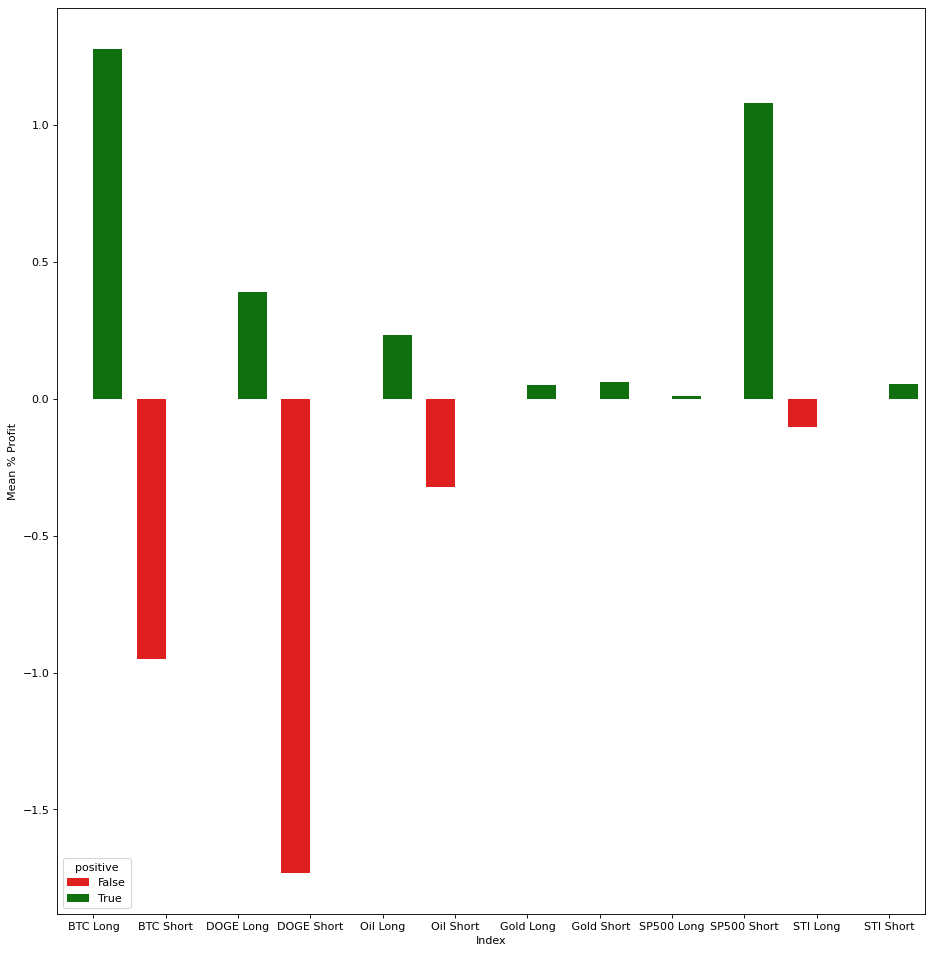

In [477]:
fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(sum(rsi_basic_profit["Mean % Profit"]/len(rsi_basic_profit["Mean % Profit"])))

In [446]:
btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['RSI Condition'] == 1) & (btc_regression_data['Trend'] == 1)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1 & (btc_regression_data['Trend'] == -1)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == 1)  & (doge_df_regression_data['Trend'] == 1)].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == -1) & (doge_df_regression_data['Trend'] == -1)].mean()*100
oil_long_mean = oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == 1) & (oil_regression_data['Trend'] == 1)].mean()*100
oil_short_mean = -oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == -1) & (oil_regression_data['Trend'] == -1)].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['RSI Condition'] == 1) & (gold_regression_data['Trend'] == 1)].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['RSI Condition'] == -1) & (gold_regression_data['Trend'] == -1)].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['RSI Condition'] == 1) & (sp500_regression_data['Trend'] == 1)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['RSI Condition'] == -1) & (sp500_regression_data['Trend'] == -1)].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['RSI Condition'] == 1) & (sti_regression_data['Trend'] == 1)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['RSI Condition'] == -1) & (sti_regression_data['Trend'] == -1)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == -1].std()

In [447]:
d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

0.15690525179599085


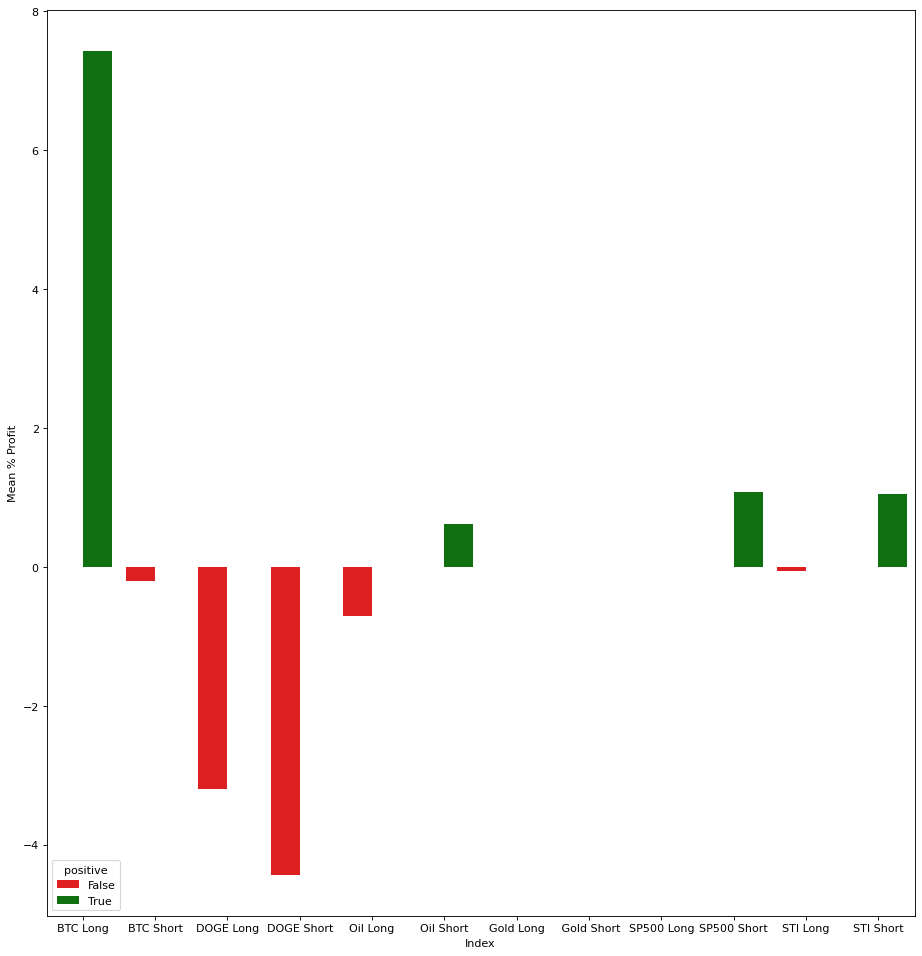

In [448]:
fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

btc long trades: 3
doge long trades: 2
2.5307981438548532


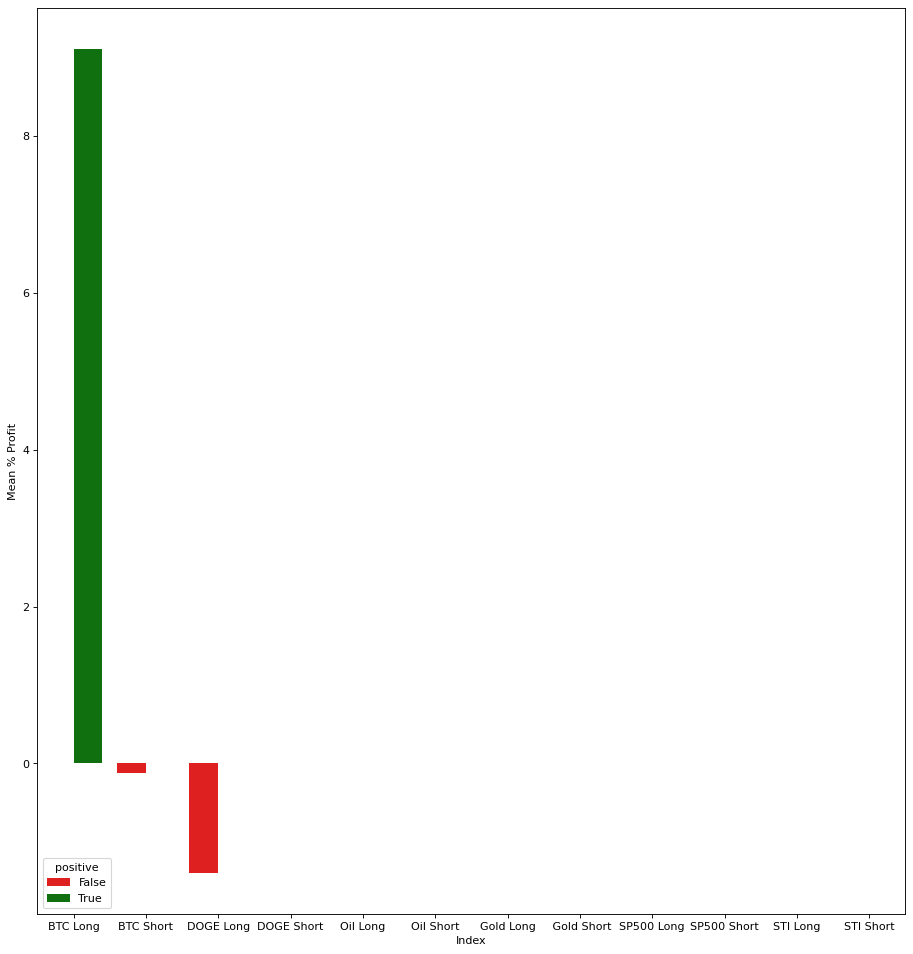

In [466]:
diff = 0.1

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['RSI Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
oil_long_mean = oil_regression_data[200:]['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)].mean()*100
oil_short_mean = -oil_regression_data[200:]['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['RSI Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)  ].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['RSI Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['RSI Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > diff)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['RSI Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['RSI Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > diff)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['RSI Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['RSI Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('doge long trades:',len(doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

btc long trades: 3
doge long trades: 2
4.492782652002879


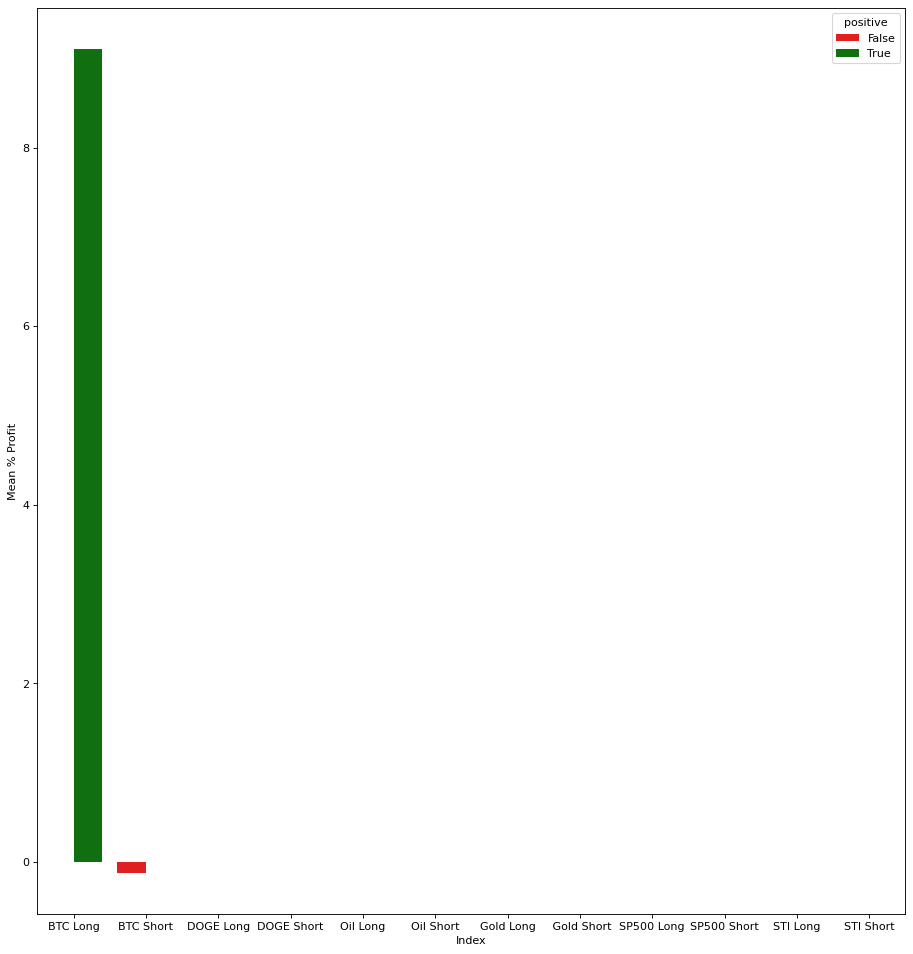

In [471]:
diff = 0.1
volatility = 10

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['RSI Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
oil_long_mean = oil_regression_data[200:]['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >diff) & (oil_regression_data['Price Relative ATR'] < volatility)].mean()*100
oil_short_mean = -oil_regression_data[200:]['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (oil_regression_data['Price Relative ATR'] < volatility)].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['RSI Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)  & (gold_regression_data['Price Relative ATR'] < volatility)].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['RSI Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (gold_regression_data['Price Relative ATR'] < volatility)].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['RSI Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (sp500_regression_data['Price Relative ATR'] < volatility)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['RSI Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (sp500_regression_data['Price Relative ATR'] < volatility)].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['RSI Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (sti_regression_data['Price Relative ATR'] < volatility)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['RSI Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (sti_regression_data['Price Relative ATR'] < volatility)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['RSI Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['RSI Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['RSI Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['RSI Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['RSI Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['RSI Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['RSI Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('doge long trades:',len(doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['RSI Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [461]:
oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['RSI Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'])]

199     0.003041
200    -0.009475
201     0.016453
212    -0.013826
213    -0.046265
          ...   
1019   -0.005849
1020    0.030432
1039   -0.012274
1040    0.033909
1046    0.010444
Name: future_price1 % P/L, Length: 86, dtype: float64

## MACD

1.776548834429258


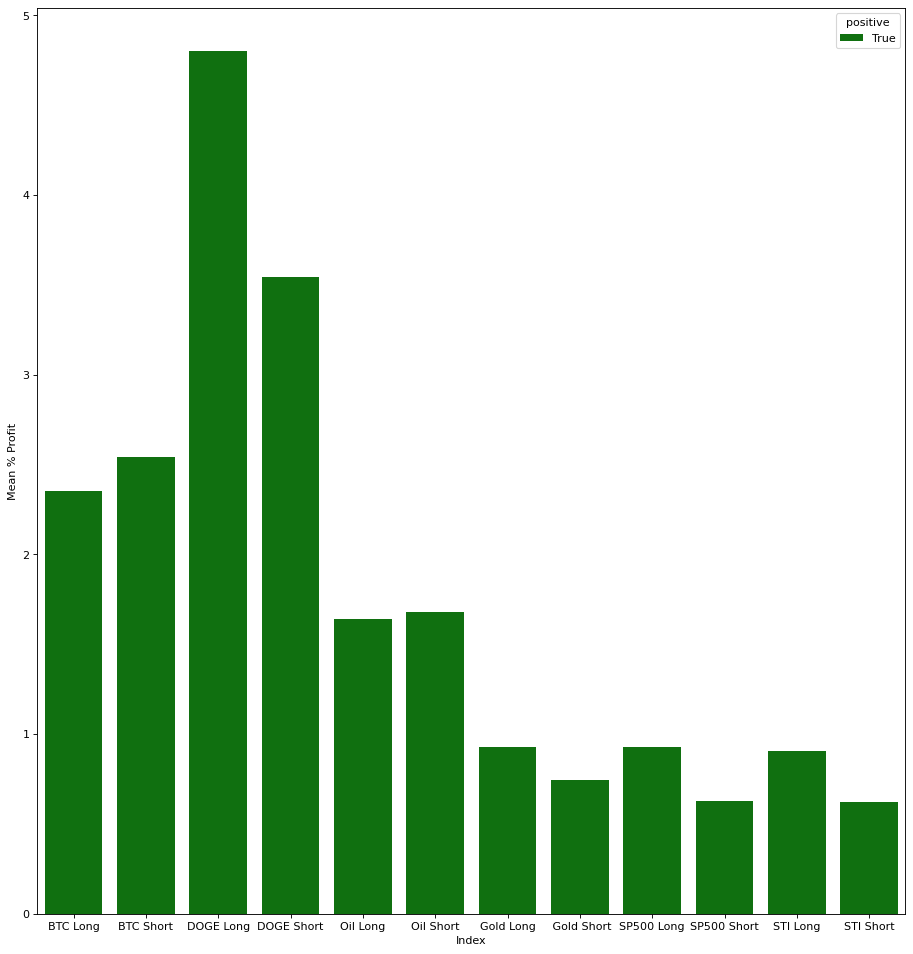

In [371]:
btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].mean()*100
oil_long_mean = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].mean()*100
oil_short_mean = -oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

2.013012634113972


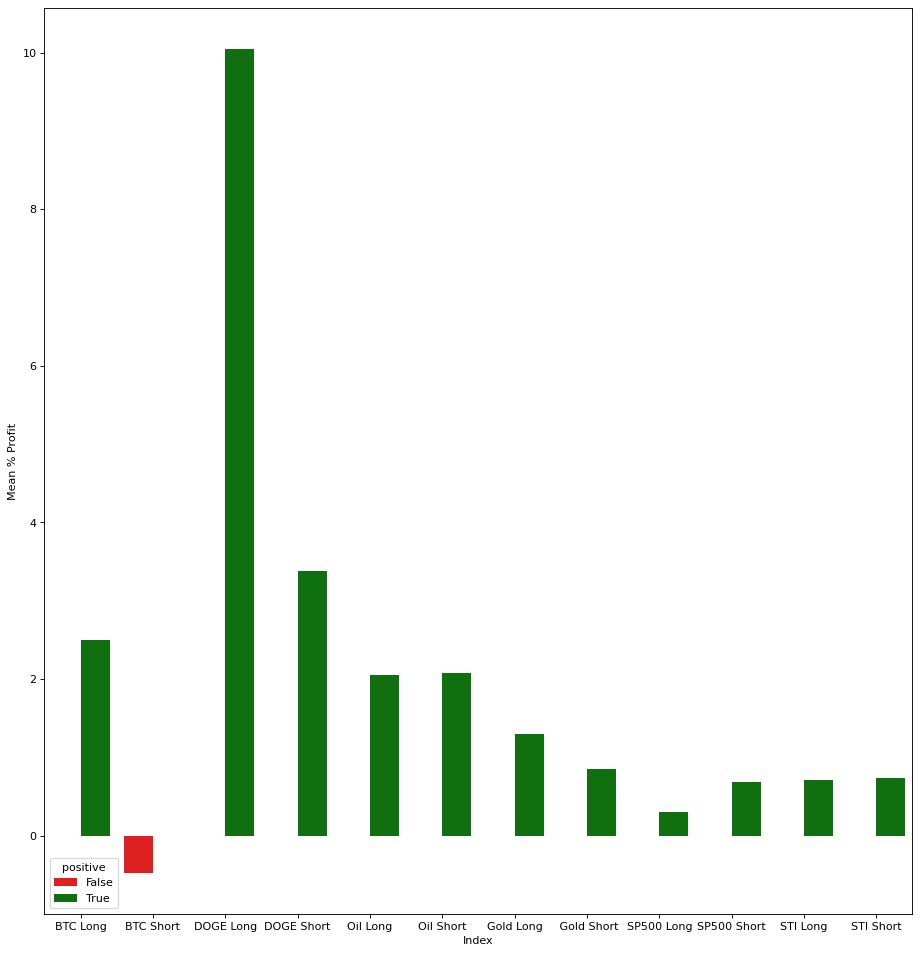

In [454]:
btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Trend'] == 1)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Trend'] == -1)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Trend'] == 1)].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Trend'] == -1)].mean()*100
oil_long_mean = oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Trend'] == 1)].mean()*100
oil_short_mean = -oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Trend'] == -1)].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Trend'] == 1)].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Trend'] == -1)].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Trend'] == 1)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Trend'] == -1)].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Trend'] == 1)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Trend'] == -1)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [ ]:
# THis enhanced strategy assumes trend only holds when certain distance from EMA, afterwhich its actually deviating too much from EMA and expecting a reversal

1.8902093463025842


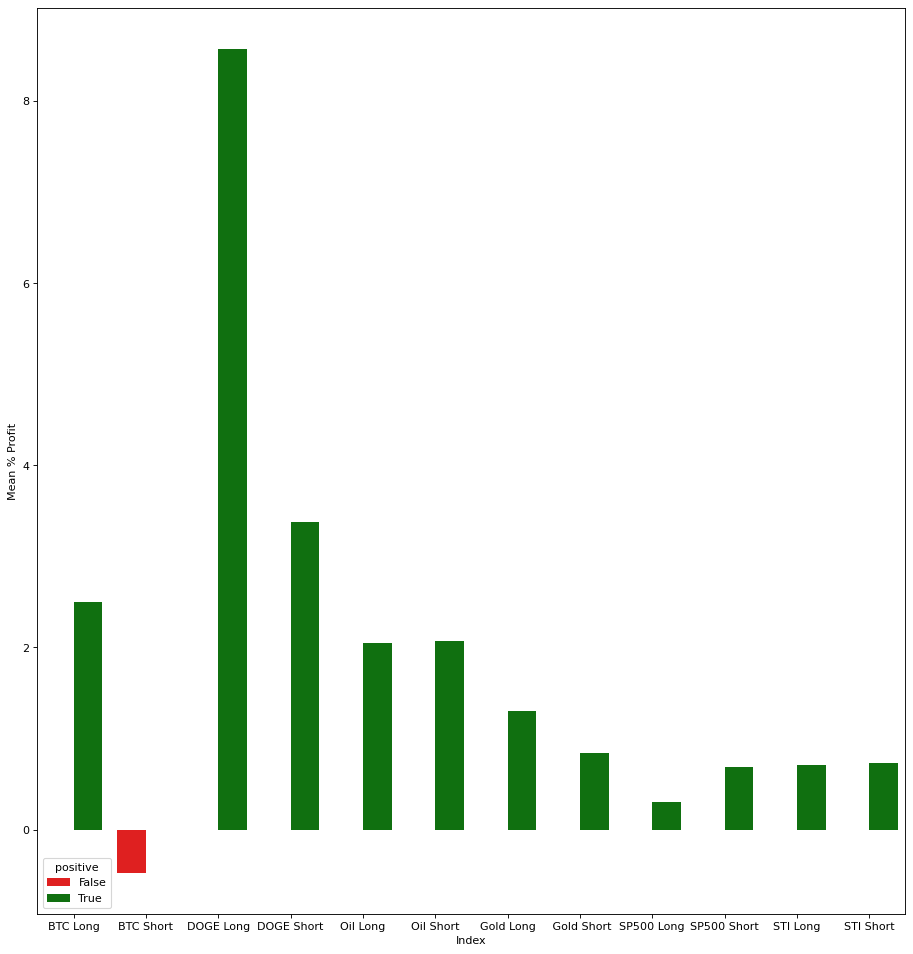

In [455]:
diff = 0.8

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

btc long trades: 25
doge long trades: 7
2.7405125062948277


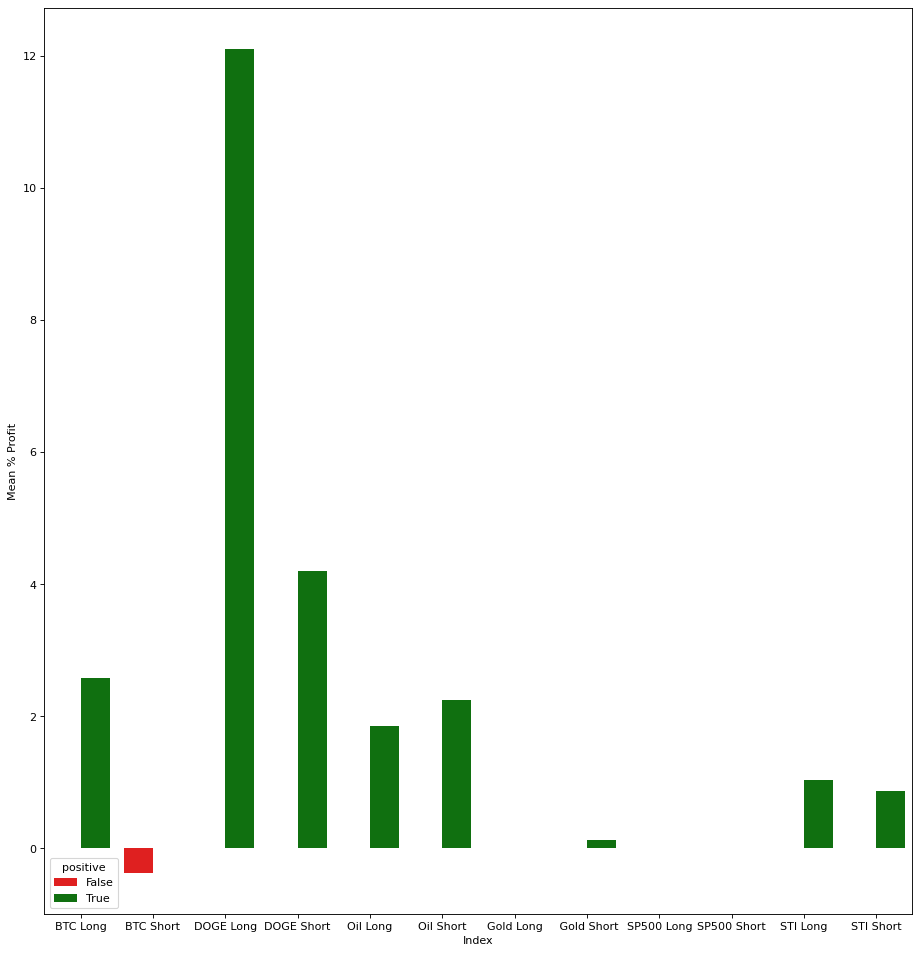

In [479]:
diff = 0.1

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
oil_long_mean = oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)].mean()*100
oil_short_mean = -oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)  ].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > diff)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) ].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > diff)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('doge long trades:',len(doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

btc long trades: 1
doge long trades: 2
6.709323200083046


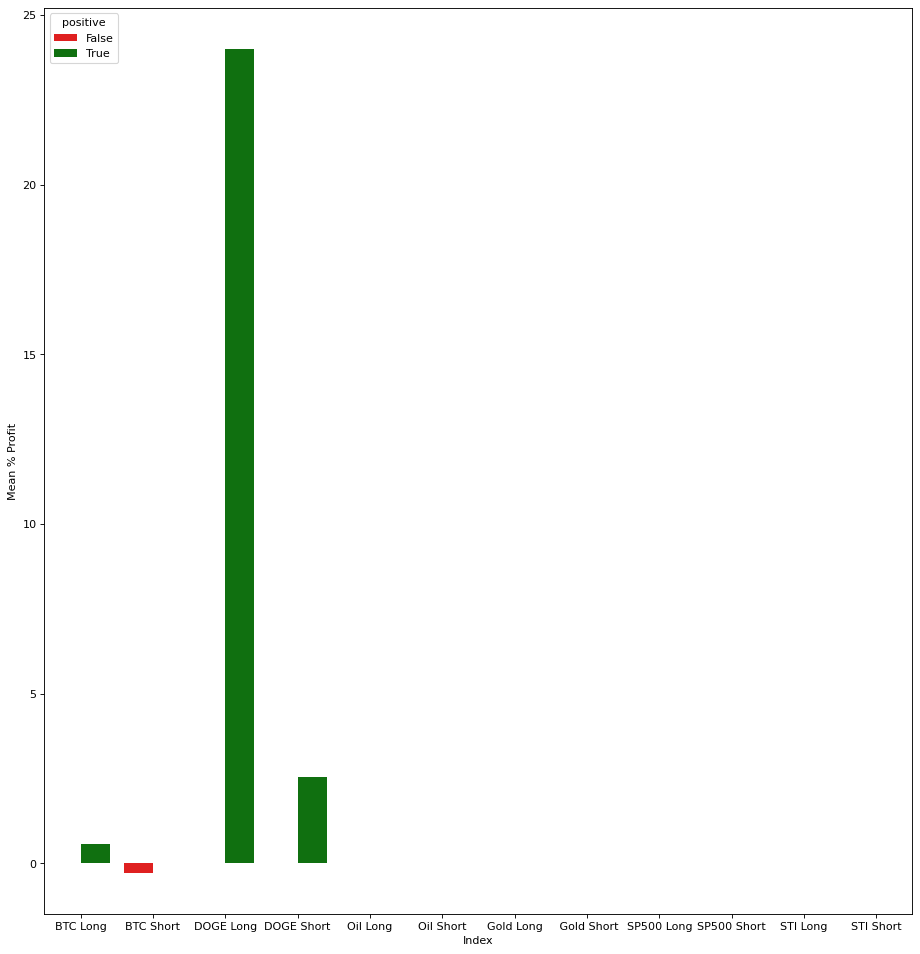

In [494]:
diff = 0.5
volatility = 30

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
oil_long_mean = oil_regression_data[200:]['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >diff) & (oil_regression_data['Price Relative ATR'] < volatility)].mean()*100
oil_short_mean = -oil_regression_data[200:]['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (oil_regression_data['Price Relative ATR'] < volatility)].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)  & (gold_regression_data['Price Relative ATR'] < volatility)].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (gold_regression_data['Price Relative ATR'] < volatility)].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (sp500_regression_data['Price Relative ATR'] < volatility)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (sp500_regression_data['Price Relative ATR'] < volatility)].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (sti_regression_data['Price Relative ATR'] < volatility)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (sti_regression_data['Price Relative ATR'] < volatility)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('doge long trades:',len(doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [397]:
btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]

436    -0.001846
885    -0.006212
988     0.033503
1036    0.239361
1079    0.040103
1104   -0.008589
1139    0.055113
1156   -0.020669
1206    0.005594
1229   -0.041565
1711    0.077078
1731    0.016626
1779    0.011395
Name: future_price1 % P/L, dtype: float64

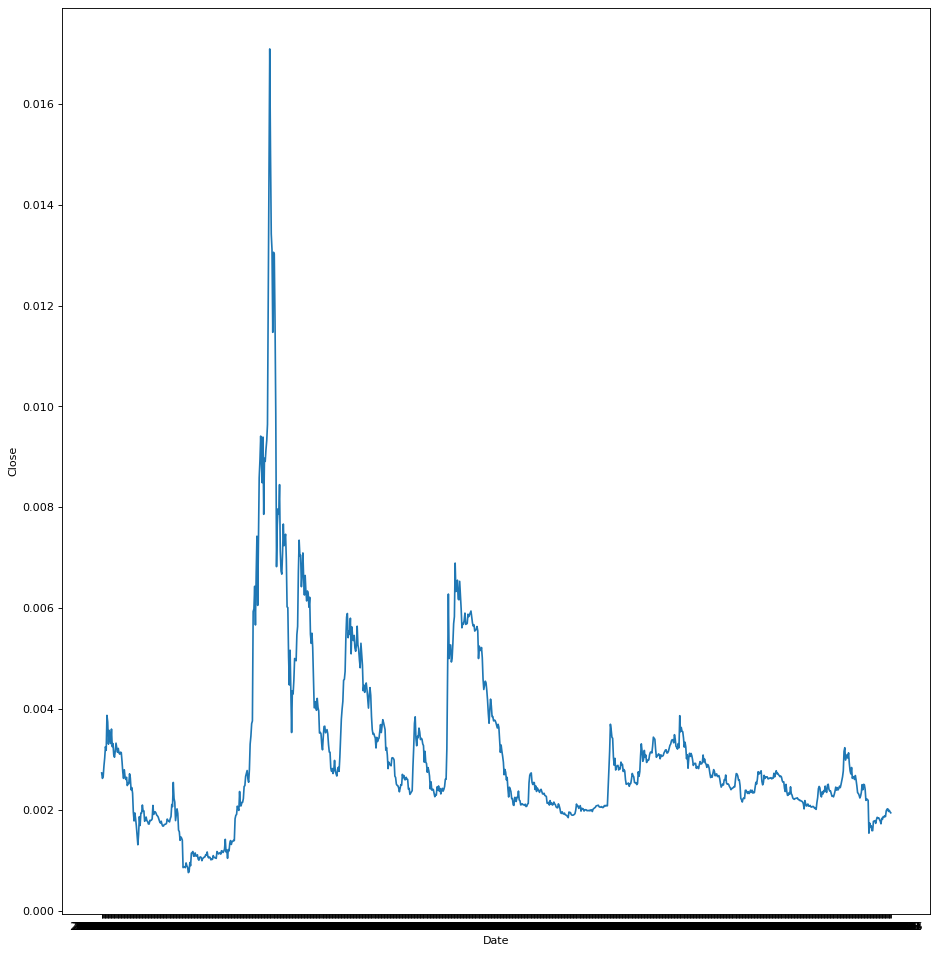

In [392]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

color_dict = dict({1:'green',
                  -1: 'red'})

markers = dict({1:'^',
                -1: 'v'})

p0 = sns.lineplot(data=doge_df_regression_data, x="Date", y="Close", ax=ax)
# sti_macd_df[" MACD"] = sti_macd_df[" MACD"]*30
# sti_macd_df[" MACD_SIG"] = sti_macd_df[" MACD_SIG"] *30
# p1 = sns.lineplot(data=sti_macd_df, x="Date", y=" MACD", label='MACD', ax=ax)
# p2 = sns.lineplot(data=sti_macd_df, x="Date", y=" MACD_SIG", label='MACD_SIGNAL', ax=ax)
# p3 = sns.scatterplot(data=sti_macd_orders_df, x= "Date", y=' Close', s=100, hue ='MACD Condition', palette=color_dict, style='MACD Condition', markers=markers, ax=ax)


In [504]:
btc_hourly_regression

,Date,Close,Volume,RSI,RSI Condition,MACD Condition,EMA Condition,Close-EMA200 Price Diff,BB Condition,ATR,...,future_price3 P/L,future_price3 % P/L,future_price5 P/L,future_price5 % P/L,future_price10 P/L,future_price10 % P/L,future_price15 P/L,future_price15 % P/L,future_price30 P/L,future_price30 % P/L
199,19/7/2015,3683,1091997,44.534893,0.0,0,-1,-548.695000,0,1003.391727,...,-511.0,-0.138746,-501.0,-0.136030,-114.0,-0.030953,293.0,0.079555,-8.0,-0.002172
200,20/7/2015,3824,1092024,46.766872,0.0,0,-1,-403.638333,0,961.006604,...,-49.0,-0.012814,-264.0,-0.069038,-524.0,-0.137029,184.0,0.048117,-337.0,-0.088128
201,21/7/2015,3568,1092051,43.355566,0.0,0,-1,-653.074768,0,1049.648990,...,-386.0,-0.108184,-334.0,-0.093610,148.0,0.041480,218.0,0.061099,673.0,0.188621
202,22/7/2015,3172,1092072,38.658108,0.0,0,-1,-1038.636213,0,1051.388347,...,388.0,0.122320,461.0,0.145334,365.0,0.115069,486.0,0.153216,643.0,0.202711
203,23/7/2015,3775,1092113,47.912689,0.0,0,0,-431.301524,0,1068.646323,...,-541.0,-0.143311,-182.0,-0.048212,534.0,0.141457,-91.0,-0.024106,-192.0,-0.050861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,11/7/2022,2424,1183685,44.525912,0.0,0,-1,-766.140365,0,1266.920532,...,1209.0,0.498762,689.0,0.284241,727.0,0.299917,734.0,0.302805,189.0,0.077970
2749,12/7/2022,2281,1183716,43.403383,0.0,0,-1,-900.094192,0,1298.569065,...,975.0,0.427444,173.0,0.075844,1021.0,0.447611,1551.0,0.679965,320.0,0.140289
2750,13/7/2022,2572,1183750,46.366588,0.0,0,-1,-603.033553,0,1317.099846,...,541.0,0.210342,14.0,0.005443,753.0,0.292768,7.0,0.002722,125.0,0.048600
2751,14/7/2022,3633,1183771,55.512316,0.0,1,1,453.409567,0,1311.949857,...,-1179.0,-0.324525,-1069.0,-0.294247,386.0,0.106248,-122.0,-0.033581,-163.0,-0.044867


btc long trades: 25
btc hourly long trades: 15
3.4821988916533417


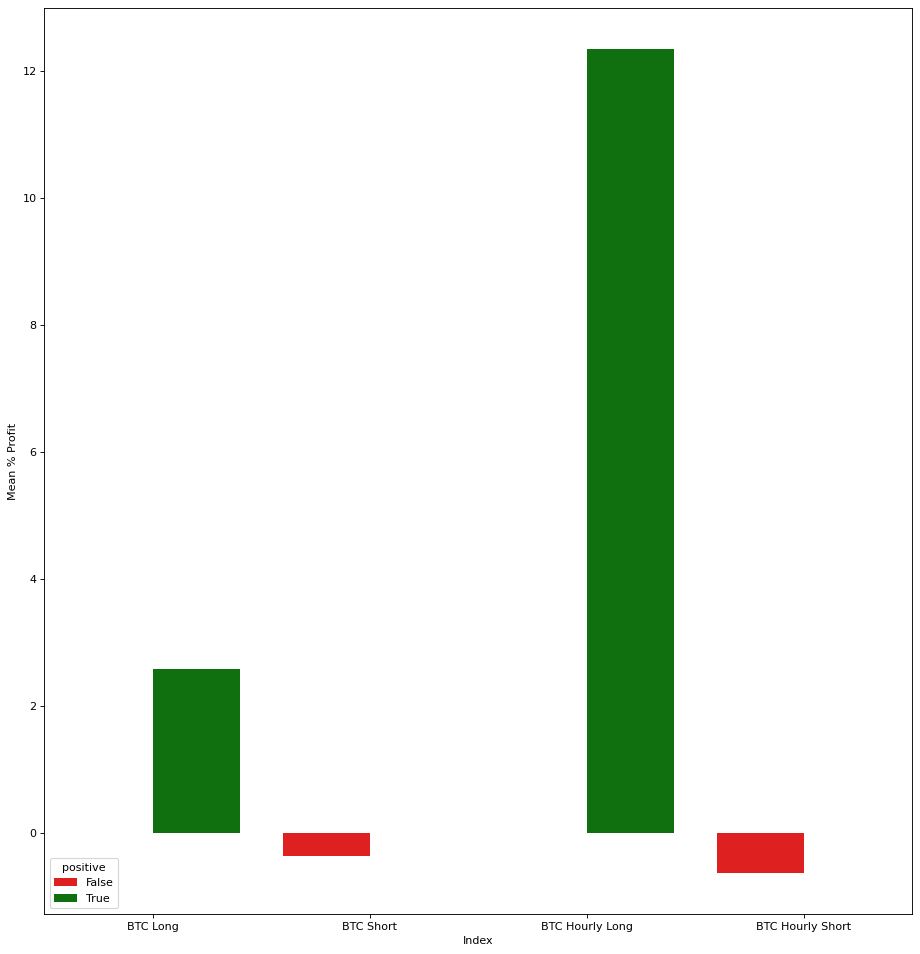

In [510]:
diff = 0.1
volatility = 30

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
btc_hourly_long_mean = btc_hourly_regression['future_price1 % P/L'].loc[(btc_hourly_regression['MACD Condition'] == 1) & (btc_hourly_regression['Price Relative Close-EMA200 Price Diff'] > diff) & (btc_hourly_regression['Price Relative ATR'] < volatility)].mean()*100
btc_hourly_short_mean = -btc_hourly_regression['future_price1 % P/L'].loc[btc_hourly_regression['MACD Condition'] == -1 & (btc_hourly_regression['Price Relative Close-EMA200 Price Diff'] < -diff) & (btc_hourly_regression['Price Relative ATR'] < volatility)].mean()*100

d = {'Index':['BTC Long', 'BTC Short', 'BTC Hourly Long', 'BTC Hourly Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,btc_hourly_long_mean,btc_hourly_short_mean]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('btc short trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('btc hourly long trades:',len(btc_hourly_regression['future_price1 % P/L'].loc[(btc_hourly_regression['MACD Condition'] == 1)  & (btc_hourly_regression['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [511]:
rsi_basic_profit

,Index,Mean % Profit,positive
0,BTC Long,2.580380,True
1,BTC Short,-0.367261,False
2,BTC Hourly Long,12.344631,True
3,BTC Hourly Short,-0.628955,False


In [513]:
btc_regression_data.columns

Index(['Date', 'Close', 'Volume', ' RSI', 'RSI Condition', 'MACD Condition',
       'EMA Condition', 'Close-EMA200 Price Diff', 'BB Condition', ' ATR',
       'Trend', 'Forecasted', 'Slope', 'Acceleration',
       'Price Relative Close-EMA200 Price Diff', 'Price Relative ATR',
       'future_price1', 'future_price3', 'future_price5', 'future_price10',
       'future_price15', 'future_price30', 'future_price1 P/L',
       'future_price1 % P/L', 'future_price3 P/L', 'future_price3 % P/L',
       'future_price5 P/L', 'future_price5 % P/L', 'future_price10 P/L',
       'future_price10 % P/L', 'future_price15 P/L', 'future_price15 % P/L',
       'future_price30 P/L', 'future_price30 % P/L'],
      dtype='object')

1.6819833383226024


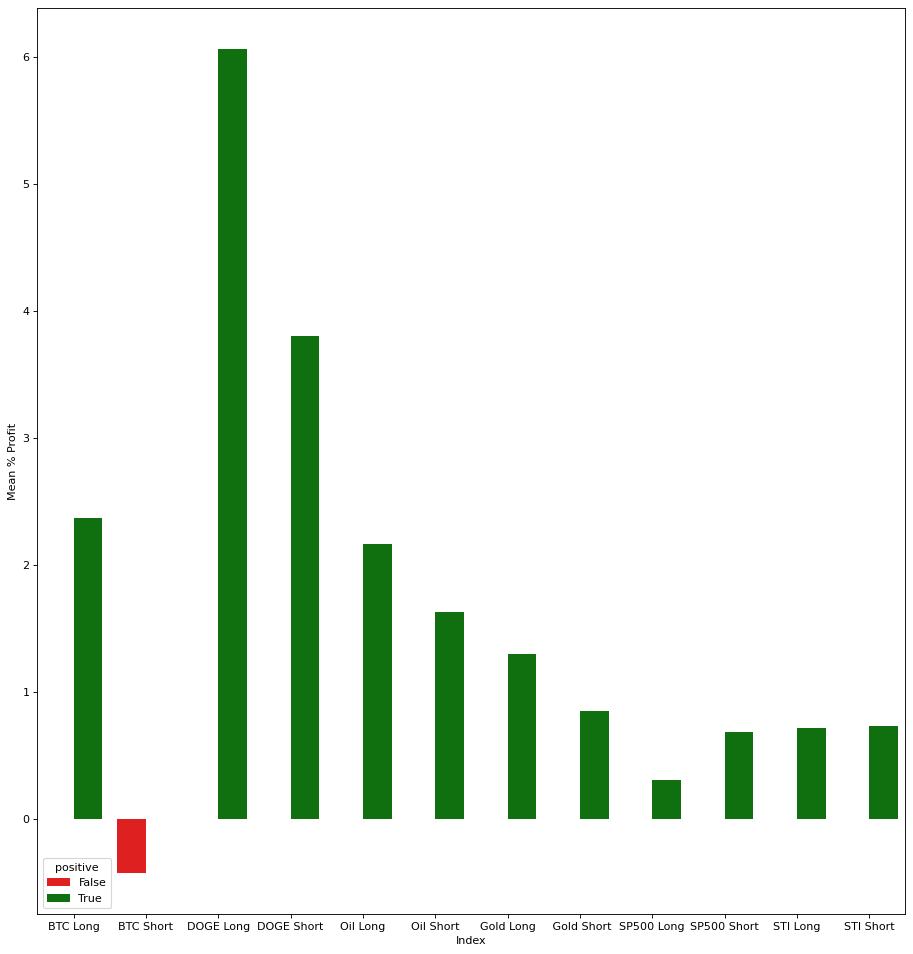

In [522]:
diff = 0.3

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price1 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price1 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price1 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price1 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price1 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price1 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price1 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price1 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price1 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))


In [524]:
rsi_basic_profit.round(2)

,Index,Mean % Profit,Std % Profit,positive
0,BTC Long,2.37,0.04,True
1,BTC Short,-0.42,0.04,False
2,DOGE Long,6.06,0.08,True
3,DOGE Short,3.80,0.05,True
4,Oil Long,2.16,0.02,True
5,Oil Short,1.63,0.02,True
6,Gold Long,1.30,0.01,True
7,Gold Short,0.85,0.01,True
8,SP500 Long,0.30,0.01,True
9,SP500 Short,0.68,0.01,True


1.8419876598880374


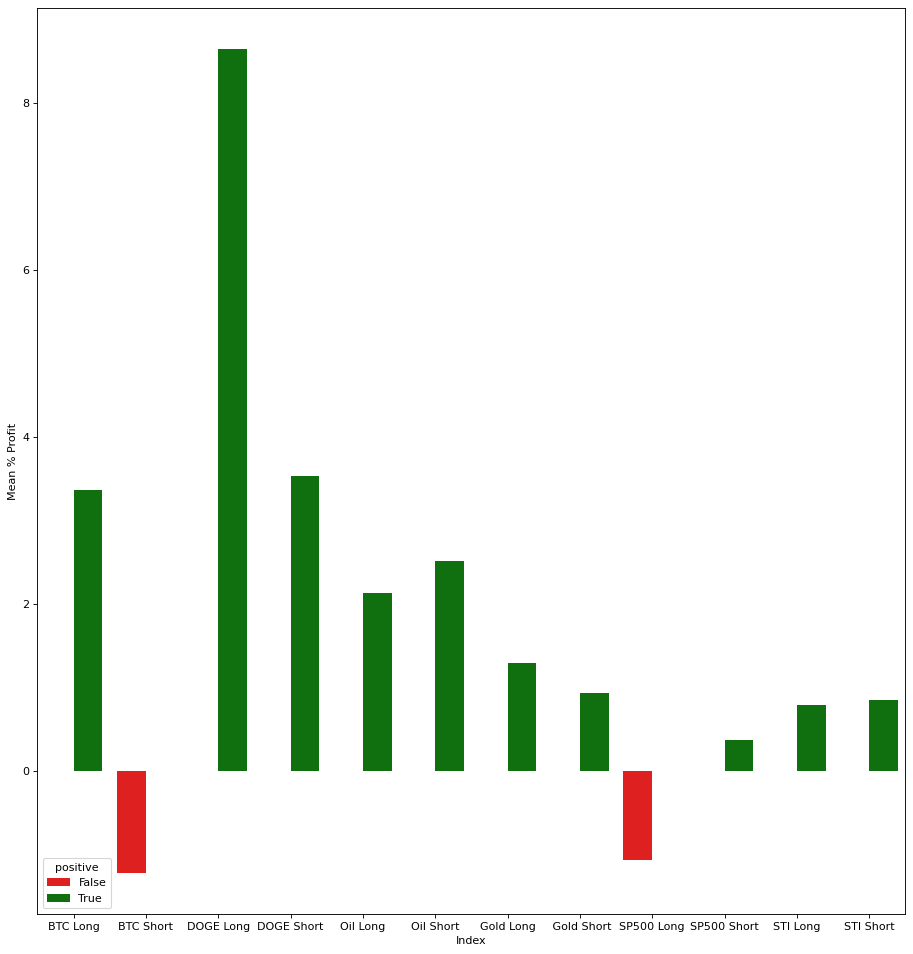

In [526]:
diff = 0.3

btc_long_mean = btc_regression_data['future_price3 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price3 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price3 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price3 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price3 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price3 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price3 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price3 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price3 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price3 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price3 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price3 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price3 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price3 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price3 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price3 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price3 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price3 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price3 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price3 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price3 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price3 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price3 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price3 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [527]:
rsi_basic_profit.round(2)

,Index,Mean % Profit,Std % Profit,positive
0,BTC Long,3.36,0.07,True
1,BTC Short,-1.22,0.07,False
2,DOGE Long,8.64,0.15,True
3,DOGE Short,3.53,0.07,True
4,Oil Long,2.13,0.05,True
5,Oil Short,2.51,0.03,True
6,Gold Long,1.29,0.02,True
7,Gold Short,0.93,0.01,True
8,SP500 Long,-1.07,0.03,False
9,SP500 Short,0.37,0.01,True


2.178472484716973


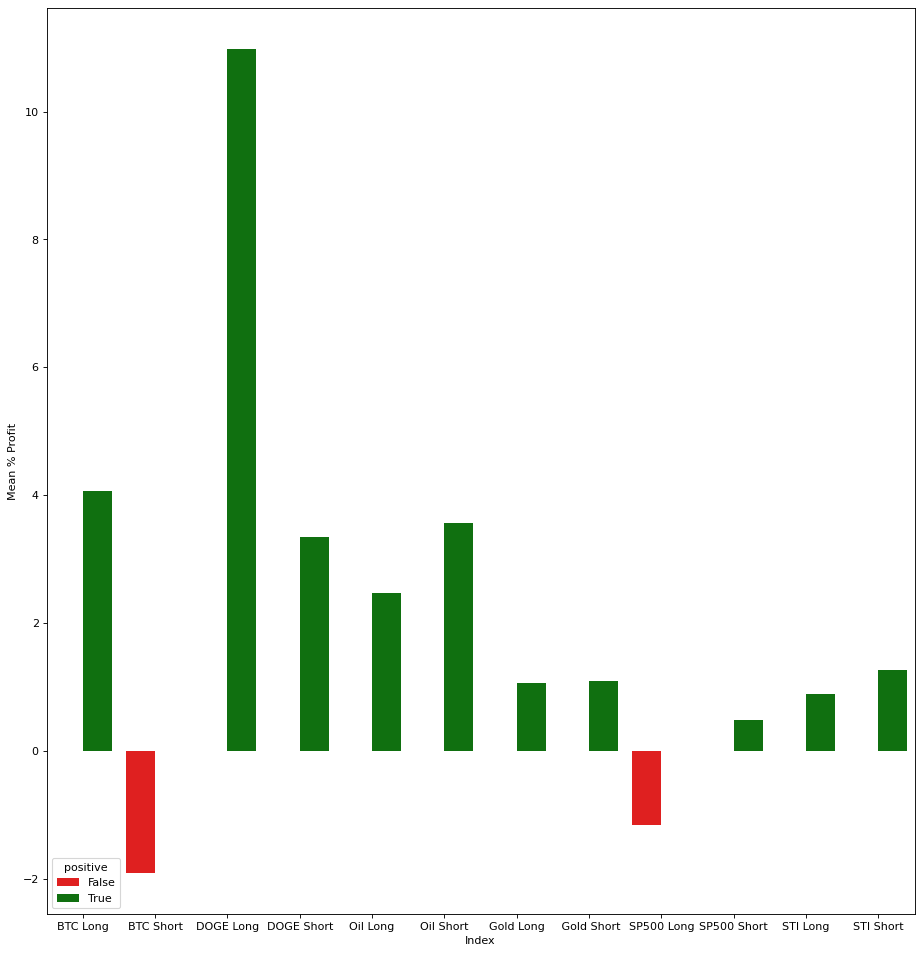

In [532]:
diff = 0.3

btc_long_mean = btc_regression_data['future_price5 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price5 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price5 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price5 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price5 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price5 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price5 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price5 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price5 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price5 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price5 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price5 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price5 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price5 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price5 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price5 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price5 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price5 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price5 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price5 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price5 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price5 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price5 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price5 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [533]:
rsi_basic_profit.round(2)

,Index,Mean % Profit,Std % Profit,positive
0,BTC Long,4.07,0.09,True
1,BTC Short,-1.91,0.08,False
2,DOGE Long,10.98,0.12,True
3,DOGE Short,3.34,0.17,True
4,Oil Long,2.47,0.06,True
5,Oil Short,3.57,0.05,True
6,Gold Long,1.06,0.02,True
7,Gold Short,1.09,0.02,True
8,SP500 Long,-1.16,0.03,False
9,SP500 Short,0.48,0.02,True


2.0174055771674912


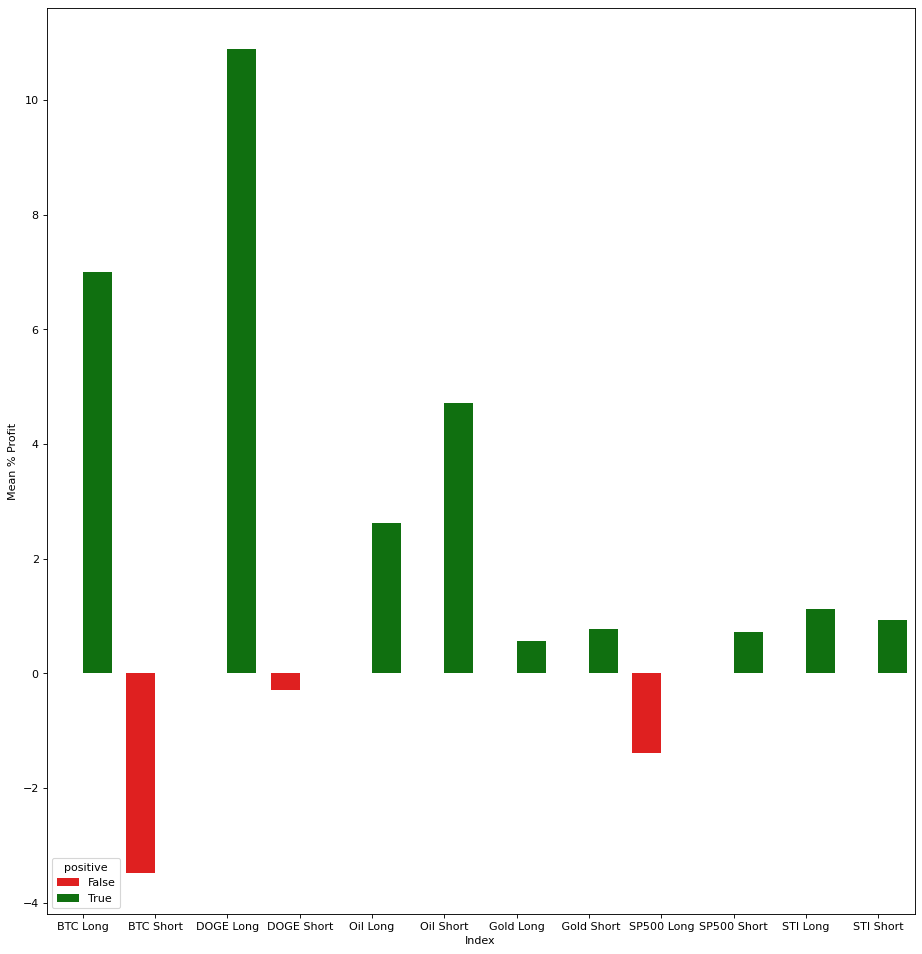

In [534]:
diff = 0.3

btc_long_mean = btc_regression_data['future_price10 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price10 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price10 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price10 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price10 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price10 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price10 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price10 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price10 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price10 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price10 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price10 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price10 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price10 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price10 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price10 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price10 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price10 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price10 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price10 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price10 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price10 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price10 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price10 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [535]:
rsi_basic_profit.round(2)

,Index,Mean % Profit,Std % Profit,positive
0,BTC Long,7.00,0.14,True
1,BTC Short,-3.47,0.13,False
2,DOGE Long,10.89,0.22,True
3,DOGE Short,-0.29,0.20,False
4,Oil Long,2.63,0.07,True
5,Oil Short,4.72,0.06,True
6,Gold Long,0.57,0.02,True
7,Gold Short,0.77,0.03,True
8,SP500 Long,-1.38,0.06,False
9,SP500 Short,0.72,0.03,True


1.3554341313370308


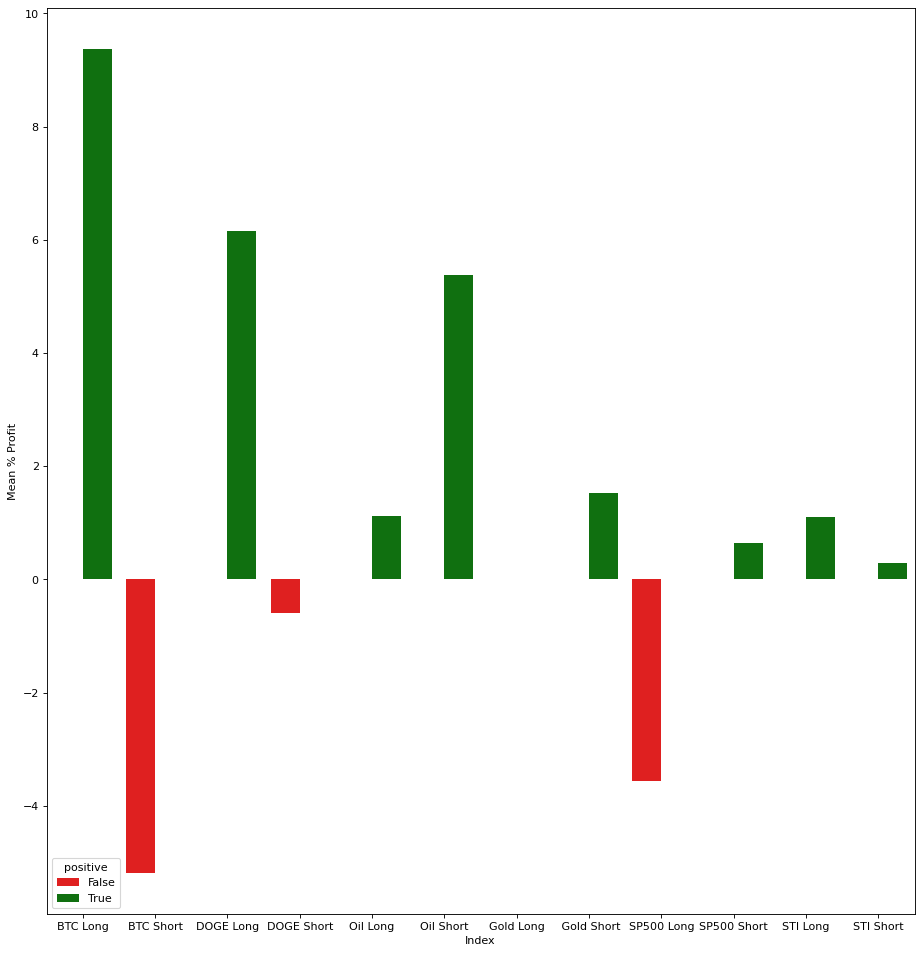

In [536]:
diff = 0.3

btc_long_mean = btc_regression_data['future_price15 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price15 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price15 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price15 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price15 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price15 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price15 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price15 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price15 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price15 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price15 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price15 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price15 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price15 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price15 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price15 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price15 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price15 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price15 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price15 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price15 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price15 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price15 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price15 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [537]:
rsi_basic_profit.round(2)

,Index,Mean % Profit,Std % Profit,positive
0,BTC Long,9.37,0.16,True
1,BTC Short,-5.18,0.15,False
2,DOGE Long,6.15,0.28,True
3,DOGE Short,-0.59,0.24,False
4,Oil Long,1.12,0.08,True
5,Oil Short,5.39,0.07,True
6,Gold Long,0.00,0.03,True
7,Gold Short,1.52,0.03,True
8,SP500 Long,-3.55,0.06,False
9,SP500 Short,0.65,0.03,True


-0.018360344090962804


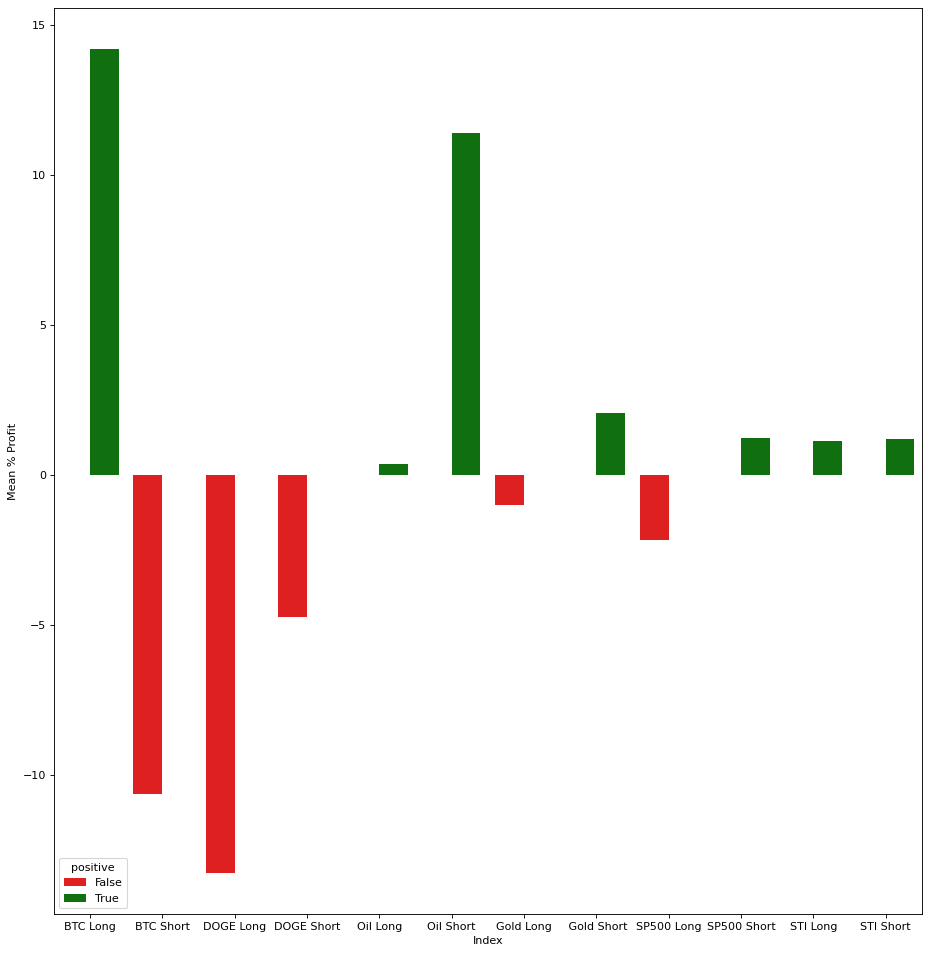

In [538]:
diff = 0.3

btc_long_mean = btc_regression_data['future_price30 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
btc_short_mean = -btc_regression_data['future_price30 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
doge_long_mean = doge_df_regression_data['future_price30 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
doge_short_mean = -doge_df_regression_data['future_price30 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
oil_long_mean = oil_regression_data['future_price30 % P/L'].loc[(oil_regression_data['MACD Condition'] == 1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
oil_short_mean = -oil_regression_data['future_price30 % P/L'].loc[(oil_regression_data['MACD Condition'] == -1) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (oil_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
gold_long_mean = gold_regression_data['future_price30 % P/L'].loc[(gold_regression_data['MACD Condition'] == 1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] >0) ].mean()*100
gold_short_mean = -gold_regression_data['future_price30 % P/L'].loc[(gold_regression_data['MACD Condition'] == -1) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (gold_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sp500_long_mean = sp500_regression_data['future_price30 % P/L'].loc[(sp500_regression_data['MACD Condition'] == 1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sp500_short_mean = -sp500_regression_data['future_price30 % P/L'].loc[(sp500_regression_data['MACD Condition'] == -1) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sp500_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100
sti_long_mean = sti_regression_data['future_price30 % P/L'].loc[(sti_regression_data['MACD Condition'] == 1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] < diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] >0)].mean()*100
sti_short_mean = -sti_regression_data['future_price30 % P/L'].loc[(sti_regression_data['MACD Condition'] == -1) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] > -diff) & (sti_regression_data['Price Relative Close-EMA200 Price Diff'] <0)].mean()*100

btc_long_std = btc_regression_data['future_price30 % P/L'].loc[btc_regression_data['MACD Condition'] == 1].std()
btc_short_std = btc_regression_data['future_price30 % P/L'].loc[btc_regression_data['MACD Condition'] == -1].std()
doge_long_std = doge_df_regression_data['future_price30 % P/L'].loc[doge_df_regression_data['MACD Condition'] == 1].std()
doge_short_std = doge_df_regression_data['future_price30 % P/L'].loc[doge_df_regression_data['MACD Condition'] == -1].std()
oil_long_std = oil_regression_data['future_price30 % P/L'].loc[oil_regression_data['MACD Condition'] == 1].std()
oil_short_std = oil_regression_data['future_price30 % P/L'].loc[oil_regression_data['MACD Condition'] == -1].std()
gold_long_std = gold_regression_data['future_price30 % P/L'].loc[gold_regression_data['MACD Condition'] == 1].std()
gold_short_std = gold_regression_data['future_price30 % P/L'].loc[gold_regression_data['MACD Condition'] == -1].std()
sp500_long_std = sp500_regression_data['future_price30 % P/L'].loc[sp500_regression_data['MACD Condition'] == 1].std()
sp500_short_std = sp500_regression_data['future_price30 % P/L'].loc[sp500_regression_data['MACD Condition'] == -1].std()
sti_long_std = sti_regression_data['future_price30 % P/L'].loc[sti_regression_data['MACD Condition'] == 1].std()
sti_short_std = sti_regression_data['future_price30 % P/L'].loc[sti_regression_data['MACD Condition'] == -1].std()

d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'Oil Long', 'Oil Short', 'Gold Long', ' Gold Short', 
             'SP500 Long', 'SP500 Short', 'STI Long', 'STI Short'], 'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,oil_long_mean,oil_short_mean,gold_long_mean,gold_short_mean,sp500_long_mean,sp500_short_mean,sti_long_mean,sti_short_mean], 'Std % Profit': [btc_long_std,btc_short_std,doge_long_std,doge_short_std,oil_long_std,oil_short_std,gold_long_std,gold_short_std,sp500_long_std,sp500_short_std,sti_long_std,sti_short_std]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, ci='Std % Profit', hue='positive',palette = color_dict)

print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [539]:
rsi_basic_profit.round(2)

,Index,Mean % Profit,Std % Profit,positive
0,BTC Long,14.21,0.29,True
1,BTC Short,-10.64,0.26,False
2,DOGE Long,-13.26,0.50,False
3,DOGE Short,-4.73,0.35,False
4,Oil Long,0.36,0.27,True
5,Oil Short,11.40,0.15,True
6,Gold Long,-1.01,0.04,False
7,Gold Short,2.06,0.04,True
8,SP500 Long,-2.18,0.08,False
9,SP500 Short,1.23,0.04,True


In [ ]:
bnb_df_regression_data = generate_regression_data(bnb_df)
doge_df_regression_data = generate_regression_data(doge_df)
sol_df_regression_data = generate_regression_data(sol_df)
ada_df_regression_data = generate_regression_data(ada_df)
xrp_df_regression_data = generate_regression_data(xrp_df)
eth_df_regression_data = generate_regression_data(eth_df)

btc long trades: 13
doge long trades: 2
8.33881363605231


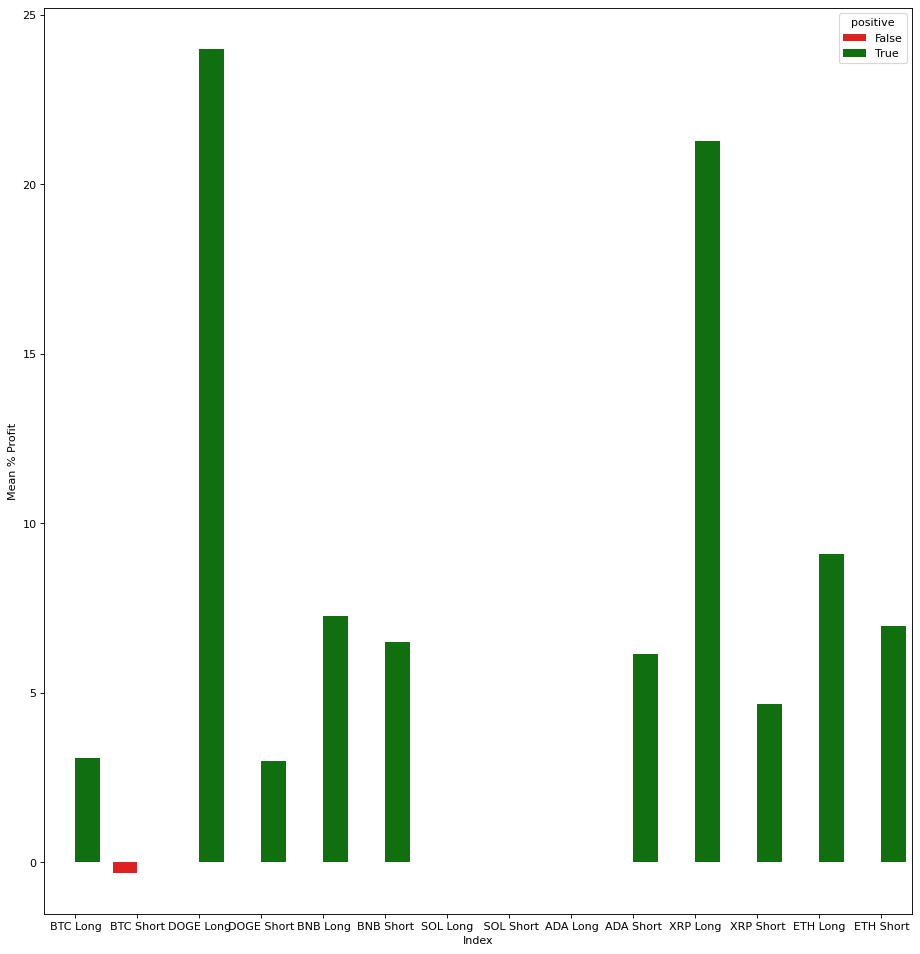

In [568]:
diff = 0.2
volatility = 30

btc_long_mean = btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
btc_short_mean = -btc_regression_data['future_price1 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_long_mean = doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_short_mean = -doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
bnb_long_mean = bnb_df_regression_data[200:]['future_price1 % P/L'].loc[(bnb_df_regression_data['MACD Condition'] == 1) & (bnb_df_regression_data['Price Relative Close-EMA200 Price Diff'] >diff) & (bnb_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
bnb_short_mean = -bnb_df_regression_data[200:]['future_price1 % P/L'].loc[(bnb_df_regression_data['MACD Condition'] == -1) & (bnb_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (bnb_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
sol_long_mean = sol_df_regression_data['future_price1 % P/L'].loc[(sol_df_regression_data['MACD Condition'] == 1) & (sol_df_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)  & (sol_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
sol_short_mean = -sol_df_regression_data['future_price1 % P/L'].loc[(sol_df_regression_data['MACD Condition'] == -1) & (sol_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (sol_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
ada_long_mean = ada_df_regression_data['future_price1 % P/L'].loc[(ada_df_regression_data['MACD Condition'] == 1) & (ada_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (ada_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
ada_short_mean = -ada_df_regression_data['future_price1 % P/L'].loc[(ada_df_regression_data['MACD Condition'] == -1) & (ada_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (ada_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
xrp_long_mean = xrp_df_regression_data['future_price1 % P/L'].loc[(xrp_df_regression_data['MACD Condition'] == 1) & (xrp_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (xrp_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
xrp_short_mean = -xrp_df_regression_data['future_price1 % P/L'].loc[(xrp_df_regression_data['MACD Condition'] == -1) & (xrp_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (xrp_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
eth_long_mean = eth_df_regression_data['future_price1 % P/L'].loc[(eth_df_regression_data['MACD Condition'] == 1) & (eth_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (eth_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
eth_short_mean = -eth_df_regression_data['future_price1 % P/L'].loc[(eth_df_regression_data['MACD Condition'] == -1) & (eth_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (eth_df_regression_data['Price Relative ATR'] < volatility)].mean()*100


d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'BNB Long', 'BNB Short', 'SOL Long', ' SOL Short', 
             'ADA Long', 'ADA Short', 'XRP Long', 'XRP Short','ETH Long', 'ETH Short'], 
     'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,bnb_long_mean,bnb_short_mean,
                       sol_long_mean,sol_short_mean,ada_long_mean,ada_short_mean,xrp_long_mean,xrp_short_mean,
                      eth_long_mean,eth_short_mean]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price1 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('doge long trades:',len(doge_df_regression_data['future_price1 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

btc long trades: 13
doge long trades: 2
15.940449637246287


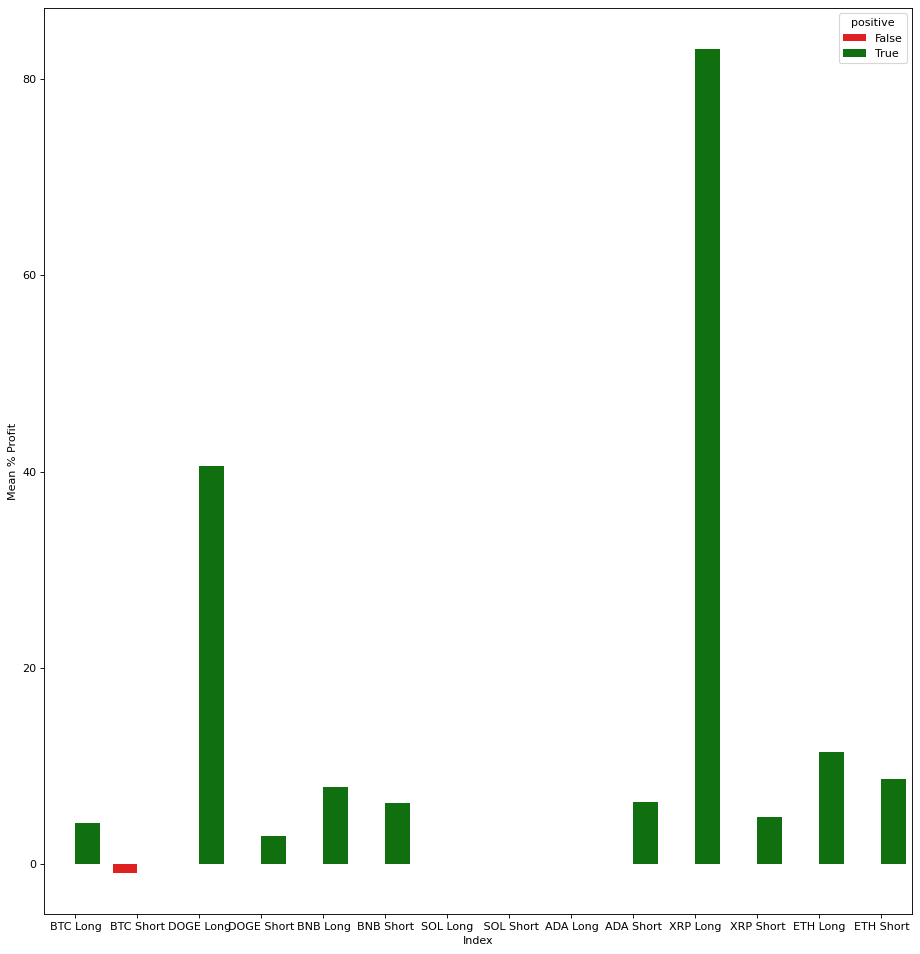

In [569]:
diff = 0.2
volatility = 30

btc_long_mean = btc_regression_data['future_price3 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
btc_short_mean = -btc_regression_data['future_price3 % P/L'].loc[btc_regression_data['MACD Condition'] == -1 & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (btc_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_long_mean = doge_df_regression_data['future_price3 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
doge_short_mean = -doge_df_regression_data['future_price3 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == -1) & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (doge_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
bnb_long_mean = bnb_df_regression_data[200:]['future_price3 % P/L'].loc[(bnb_df_regression_data['MACD Condition'] == 1) & (bnb_df_regression_data['Price Relative Close-EMA200 Price Diff'] >diff) & (bnb_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
bnb_short_mean = -bnb_df_regression_data[200:]['future_price3 % P/L'].loc[(bnb_df_regression_data['MACD Condition'] == -1) & (bnb_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (bnb_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
sol_long_mean = sol_df_regression_data['future_price3 % P/L'].loc[(sol_df_regression_data['MACD Condition'] == 1) & (sol_df_regression_data['Price Relative Close-EMA200 Price Diff'] >diff)  & (sol_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
sol_short_mean = -sol_df_regression_data['future_price3 % P/L'].loc[(sol_df_regression_data['MACD Condition'] == -1) & (sol_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (sol_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
ada_long_mean = ada_df_regression_data['future_price3 % P/L'].loc[(ada_df_regression_data['MACD Condition'] == 1) & (ada_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (ada_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
ada_short_mean = -ada_df_regression_data['future_price3 % P/L'].loc[(ada_df_regression_data['MACD Condition'] == -1) & (ada_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (ada_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
xrp_long_mean = xrp_df_regression_data['future_price3 % P/L'].loc[(xrp_df_regression_data['MACD Condition'] == 1) & (xrp_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (xrp_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
xrp_short_mean = -xrp_df_regression_data['future_price3 % P/L'].loc[(xrp_df_regression_data['MACD Condition'] == -1) & (xrp_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (xrp_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
eth_long_mean = eth_df_regression_data['future_price3 % P/L'].loc[(eth_df_regression_data['MACD Condition'] == 1) & (eth_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) & (eth_df_regression_data['Price Relative ATR'] < volatility)].mean()*100
eth_short_mean = -eth_df_regression_data['future_price3 % P/L'].loc[(eth_df_regression_data['MACD Condition'] == -1) & (eth_df_regression_data['Price Relative Close-EMA200 Price Diff'] < -diff) & (eth_df_regression_data['Price Relative ATR'] < volatility)].mean()*100


d = {'Index':['BTC Long', 'BTC Short', 'DOGE Long', 'DOGE Short', 'BNB Long', 'BNB Short', 'SOL Long', ' SOL Short', 
             'ADA Long', 'ADA Short', 'XRP Long', 'XRP Short','ETH Long', 'ETH Short'], 
     'Mean % Profit': [btc_long_mean,btc_short_mean,doge_long_mean,doge_short_mean,bnb_long_mean,bnb_short_mean,
                       sol_long_mean,sol_short_mean,ada_long_mean,ada_short_mean,xrp_long_mean,xrp_short_mean,
                      eth_long_mean,eth_short_mean]}

rsi_basic_profit = pd.DataFrame(data=d)

rsi_basic_profit['positive'] = rsi_basic_profit["Mean % Profit"] > 0

color_dict = dict({True:'green',
                  False: 'red'})

fig, ax = plt.subplots(figsize=(14, 15), dpi=80)

ax = sns.barplot(x="Index", y="Mean % Profit", data=rsi_basic_profit, hue='positive',palette = color_dict)

print('btc long trades:', len(btc_regression_data['future_price3 % P/L'].loc[(btc_regression_data['MACD Condition'] == 1) & (btc_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print('doge long trades:',len(doge_df_regression_data['future_price3 % P/L'].loc[(doge_df_regression_data['MACD Condition'] == 1)  & (doge_df_regression_data['Price Relative Close-EMA200 Price Diff'] > diff) ]))
print(np.nanmean(rsi_basic_profit["Mean % Profit"]))

In [570]:
rsi_basic_profit

,Index,Mean % Profit,positive
0,BTC Long,4.242246,True
1,BTC Short,-0.851036,False
2,DOGE Long,40.528515,True
3,DOGE Short,2.893697,True
4,BNB Long,7.867299,True
5,BNB Short,6.216732,True
6,SOL Long,NaN,False
7,SOL Short,NaN,False
8,ADA Long,NaN,False
9,ADA Short,6.389868,True
